## **1. Importing Packages** <a id="importing"></a>  

In [57]:


# Loading the data
import shap
# import the required packages
import pandas as pd
import numpy as np
import re
import inflect
import pickle

# sklearn preprocess
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from imblearn.over_sampling import ADASYN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score

# feature engine
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.outliers import Winsorizer
from feature_engine.imputation import MeanMedianImputer
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer
from feature_engine.transformation import ReciprocalTransformer

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from wordcloud import WordCloud
import plotly.express as px
import folium
from folium.plugins import HeatMap
from geopy.distance import geodesic
from scipy.spatial import cKDTree
from collections import Counter

#Analysing words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#Machine Learning - classification
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier, VotingClassifier


#Machine Learning - regression
from sklearn.linear_model import HuberRegressor,Ridge, Lasso ,PassiveAggressiveRegressor, GammaRegressor, OrthogonalMatchingPursuitCV
from sklearn.linear_model import PoissonRegressor, Lars, LassoLarsIC,BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR, LinearSVR

# Define models
from sklearn.linear_model import (
    LassoLarsCV, Lars, RidgeCV, Ridge, LassoCV, LinearRegression, BayesianRidge, 
    Lasso, LassoLars, LassoLarsIC, LarsCV
)

from bayes_opt import BayesianOptimization





In [58]:
import joblib

# Load model metadata
model_path = "Central_listings_model.pkl"  # Change to your actual file path
model_metadata = joblib.load(model_path)

# Check scikit-learn version
print(model_metadata.__getstate__()['_sklearn_version'])

1.4.0


## **Airbnb Pricing Prediction** <a id="airbnb"></a>  

### **Load and Sample the Data** <a id="airbnb-load"></a>

In [59]:
Airbnb_data = pd.read_csv('Listings_new.csv')
Airbnb_data.head()

aljuni      amaz     apart       apt      area     bahru    balconi  \
0 -0.118886 -0.179397 -0.336039  3.097859 -0.159136 -0.123134  -0.107194   
1 -0.118886 -0.179397 -0.336039 -0.295729 -0.159136 -0.123134  -0.107194   
2 -0.118886 -0.179397 -0.336039 -0.295729 -0.159136 -0.123134  11.484538   
3 -0.118886 -0.179397 -0.336039 -0.295729 -0.159136 -0.123134  -0.107194   
4 -0.118886 -0.179397 -0.336039 -0.295729 -0.159136 -0.123134  -0.107194   

   bathroom       bay    beauti  ...  neighbourhood_group_Central Region  \
0 -0.147567 -0.111126 -0.140186  ...                            0.501816   
1 -0.147567 -0.111126 -0.140186  ...                            0.501816   
2 -0.147567 -0.111126 -0.140186  ...                            0.501816   
3 -0.147567 -0.111126 -0.140186  ...                            0.501816   
4 -0.147567 -0.111126 -0.140186  ...                            0.501816   

   neighbourhood_group_East Region  neighbourhood_group_North Region  \
0                        -0.262968                         -0.157429   
1                        -0.262968                         -0.157429   
2                        -0.262968                         -0.157429   
3                        -0.262968                         -0.157429   
4                        -0.262968                         -0.157429   

   neighbourhood_group_North-East Region  neighbourhood_group_West Region  \
0                              -0.209857                        -0.274596   
1                              -0.209857                        -0.274596   
2                              -0.209857                        -0.274596   
3                              -0.209857                        -0.274596   
4                              -0.209857                        -0.274596   

   room_type_Entire home/apt  room_type_Private room  room_type_Shared room  \
0                  -1.049203                1.160020              -0.228645   
1                  -1.049203               -0.862054               4.373591   
2                   0.953104               -0.862054              -0.228645   
3                   0.953104               -0.862054              -0.228645   
4                  -1.049203                1.160020              -0.228645   

   neighbourhood_encoded  price  
0              -0.083739    381  
1              -0.137432     35  
2               0.206060    308  
3               0.098015    187  
4               0.206060     99  

[5 rows x 120 columns]

In [60]:
Airbnb_data.shape

(7621, 120)

In [61]:
X_air_train, X_air_test, y_air_train, y_air_test = train_test_split(Airbnb_data.drop(columns=["price"], axis=1),
                                                    Airbnb_data[["price"]],
                                                    test_size=0.3, random_state=45)

In [62]:
# finding out the distribution of target variable

def price_distribution(airbnb_data):
    plt.figure(figsize=(10, 5))  # Width = 10, Height = 5
    
    # Create a box plot for the target variable
    sns.boxplot(x=airbnb_data['price'])
    
    # Calculate key statistics
    Q1 = airbnb_data['price'].quantile(0.25)  # First quartile (25th percentile)
    Q3 = airbnb_data['price'].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                             # Interquartile range
    lower_whisker = max(airbnb_data['price'].min(), Q1 - 1.5 * IQR)  # Lower bound
    upper_whisker = min(airbnb_data['price'].max(), Q3 + 1.5 * IQR)  # Upper bound
    
    # Calculate skewness
    price_skewness = skew(airbnb_data['price'].dropna())  # Drop NaN to avoid errors
    
    # Add labels at the bottom-right corner
    plt.text(2100, 0.5, f'Upper Boundary: {upper_whisker}', ha='right', color='red', fontsize=10)
    plt.text(1700, -0.5, f'Lower Boundary: {lower_whisker}', ha='right', color='blue', fontsize=10)
    
    # Adjust plot limits to make room for labels
    plt.ylim(-1, 1)

    # Add labels and title
    plt.xlabel('Price')
    plt.title(f'Box Plot of Airbnb Prices (skewness: {price_skewness:.2f})')

    # Show the plot
    plt.show()

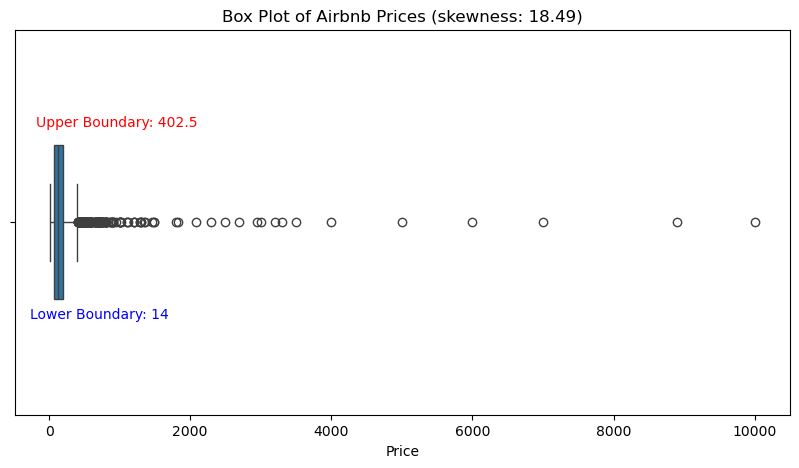

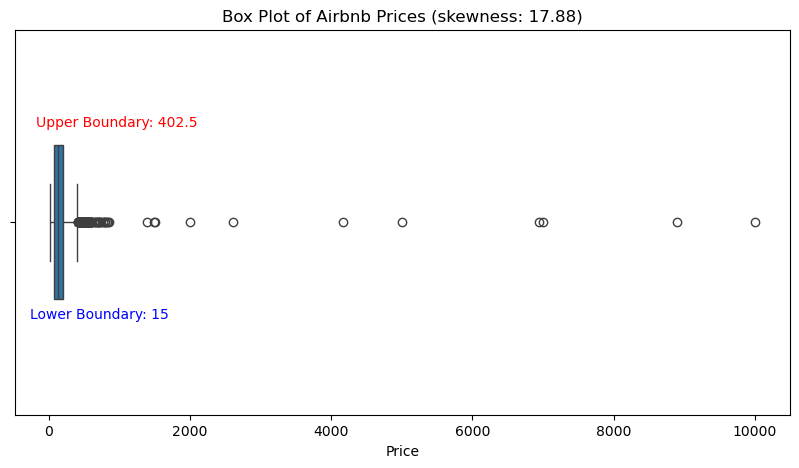

In [63]:
price_distribution(y_air_train)
price_distribution(y_air_test)

 **Preparing data to train the model to without TFIDF conducted**

In [64]:
Airbnb_data_wo_tfidf = pd.read_csv('listings.csv')  
Airbnb_data_wo_tfidf.head()

id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1               365  
2                               2               365  
3                               9               353  
4                               9               355

In [65]:
Airbnb_data_wo_tfidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [66]:
# Replace missing values in 'reviews_per_month' with 0
Airbnb_data_wo_tfidf['reviews_per_month'] = Airbnb_data_wo_tfidf['reviews_per_month'].fillna(0)

Airbnb_data_wo_tfidf = Airbnb_data_wo_tfidf.drop(columns=[ 'last_review','id'])

# Check the updated DataFrame
print(Airbnb_data_wo_tfidf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            7905 non-null   object 
 1   host_id                         7907 non-null   int64  
 2   host_name                       7907 non-null   object 
 3   neighbourhood_group             7907 non-null   object 
 4   neighbourhood                   7907 non-null   object 
 5   latitude                        7907 non-null   float64
 6   longitude                       7907 non-null   float64
 7   room_type                       7907 non-null   object 
 8   price                           7907 non-null   int64  
 9   minimum_nights                  7907 non-null   int64  
 10  number_of_reviews               7907 non-null   int64  
 11  reviews_per_month               7907 non-null   float64
 12  calculated_host_listings_count  79

In [67]:
# Remove row where 'name' column is 'testing'
Airbnb_data_wo_tfidf = Airbnb_data_wo_tfidf[Airbnb_data_wo_tfidf['name'] != 'Testing']
# Remove record where price = 0 
Airbnb_data_wo_tfidf = Airbnb_data_wo_tfidf[Airbnb_data_wo_tfidf['price'] != 0]


In [68]:
#remove rows where the name is null 
Airbnb_data_wo_tfidf = Airbnb_data_wo_tfidf.dropna(subset=['name'])


In [69]:
Airbnb_data_wo_tfidf

name    host_id  host_name  \
0                     COZICOMFORT LONG TERM STAY ROOM 2     266763  Francesca   
1                       Pleasant Room along Bukit Timah     227796    Sujatha   
2                                           COZICOMFORT     266763  Francesca   
3                   Ensuite Room (Room 1 & 2) near EXPO     367042    Belinda   
4                       B&B  Room 1 near Airport & EXPO     367042    Belinda   
...                                                 ...        ...        ...   
7902  Loft 2 pax near Haw Par / Pasir Panjang. Free ...  278109833      Belle   
7903                         3bedroom luxury at Orchard  238891646       Neha   
7904    [ Farrer Park ] New City Fringe CBD Mins to MRT  281448565      Mindy   
7905          Cheap Master Room in Central of Singapore  243835202      Huang   
7906  Amazing room with private bathroom walk to Orc...   28788520    Terence   

     neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0           North Region     Woodlands   1.44255  103.79580     Private room   
1         Central Region   Bukit Timah   1.33235  103.78521     Private room   
2           North Region     Woodlands   1.44246  103.79667     Private room   
3            East Region      Tampines   1.34541  103.95712     Private room   
4            East Region      Tampines   1.34567  103.95963     Private room   
...                  ...           ...       ...        ...              ...   
7902      Central Region    Queenstown   1.27973  103.78751  Entire home/apt   
7903      Central Region       Tanglin   1.29269  103.82623  Entire home/apt   
7904      Central Region       Kallang   1.31286  103.85996     Private room   
7905      Central Region  River Valley   1.29543  103.83801     Private room   
7906      Central Region  River Valley   1.29672  103.83325     Private room   

      price  minimum_nights  number_of_reviews  reviews_per_month  \
0        83             180                  1               0.01   
1        81              90                 18               0.28   
2        69               6                 20               0.20   
3       206               1                 14               0.15   
4        94               1                 22               0.22   
...     ...             ...                ...                ...   
7902    100               3                  0               0.00   
7903    550               6                  0               0.00   
7904     58              30                  0               0.00   
7905     56              14                  0               0.00   
7906     65              90                  0               0.00   

      calculated_host_listings_count  availability_365  
0                                  2               365  
1                                  1               365  
2                                  2               365  
3                                  9               353  
4                                  9               355  
...                              ...               ...  
7902                              31                61  
7903                              34               365  
7904                               3               173  
7905                               2                30  
7906                               7               365  

[7903 rows x 14 columns]

### Outlier Trimming

In [70]:
# conducting trimming to remove outliers for minimum_nights and number_of_reviews

def find_upper_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary

# # minimum nights upper boundary
# upper_limit = find_upper_boundaries(airbnb_data, 'minimum_nights', 10)
# upper_limit

# number of reviews upper boundary
upper_limit = find_upper_boundaries(Airbnb_data_wo_tfidf, 'number_of_reviews', 7)
upper_limit

# outliers=np.where(airbnb_data['minimum_nights'] > upper_limit, True, False)
outliers =np.where(Airbnb_data_wo_tfidf['number_of_reviews'] > upper_limit, True, False)

# let's trim the dataset by removing only outliers

Airbnb_data_wo_tfidf_t = Airbnb_data_wo_tfidf.loc[~outliers ]
Airbnb_data_wo_tfidf.shape, Airbnb_data_wo_tfidf_t.shape

((7903, 14), (7619, 14))

In [71]:
# conducing winsorization to minimum_nights and number_of_reviews

variables_folds = {
    'minimum_nights': 0.15,  
    # 'number_of_reviews': 0.15,
    # 'reviews_per_month': 0.10,
    # 'calculated_host_listings_count': 0.10,
}

# Apply winsorization separately for each variable
for var, fold in variables_folds.items():
    windsorizer = Winsorizer(capping_method='quantiles', tail='right', fold=fold, variables=[var])
    Airbnb_data_wo_tfidf_t.loc[:, var] = windsorizer.fit_transform(Airbnb_data_wo_tfidf_t[[var]])


### Cluster Based Binning

In [72]:
airbnb_data_t2 = Airbnb_data_wo_tfidf_t.copy()

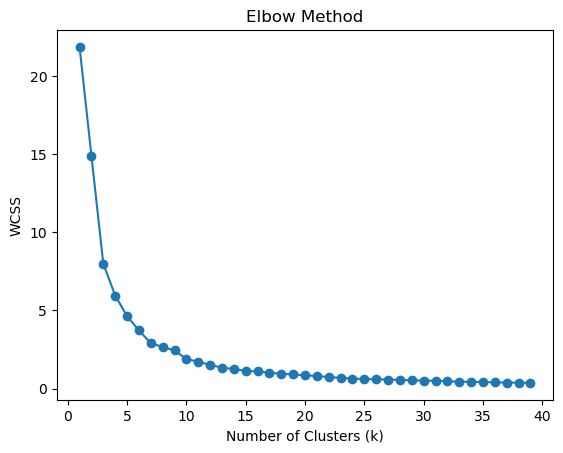

In [73]:
# determining the number of clusters 
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(airbnb_data_t2[['latitude', 'longitude']])
    wcss.append(kmeans.inertia_)  # Inertia is equivalent to WCSS

# Plot the Elbow Method graph
plt.plot(range(1, 40), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

   latitude  longitude  location_cluster
0   1.44255  103.79580                 5
1   1.33235  103.78521                 4
2   1.44246  103.79667                 5
3   1.34541  103.95712                 1
4   1.34567  103.95963                 1


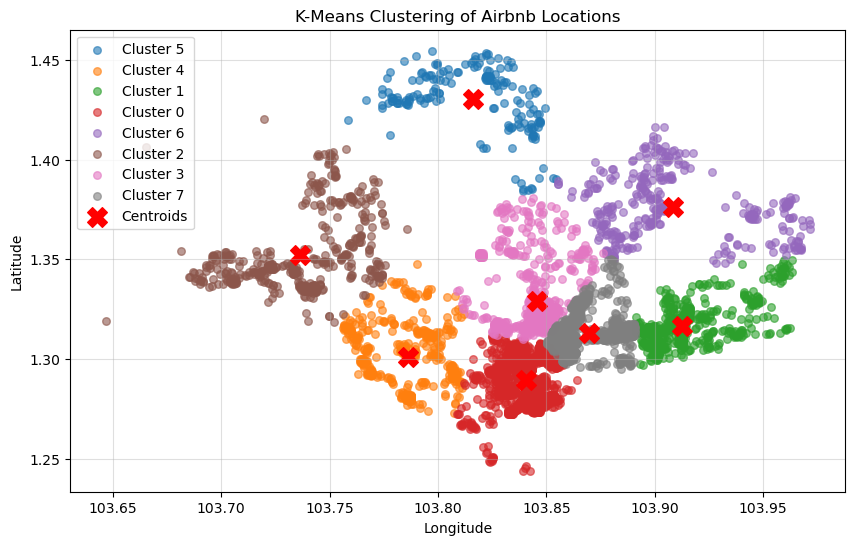

In [74]:
from sklearn.cluster import KMeans

# Fit K-Means clustering on latitude and longitude
kmeans = KMeans(n_clusters=8, random_state=42)
airbnb_data_t2.loc[:, 'location_cluster'] = kmeans.fit_predict(airbnb_data_t2[['latitude', 'longitude']])

# Check results
print(airbnb_data_t2[['latitude', 'longitude', 'location_cluster']].head())

# Scatter plot of latitude and longitude with clusters
plt.figure(figsize=(10, 6))

# Plot each cluster with a unique color
for cluster in airbnb_data_t2['location_cluster'].unique():
    cluster_data = airbnb_data_t2[airbnb_data_t2['location_cluster'] == cluster]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster}', s=30, alpha=0.6)

# Plot cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 0], s=200, c='red', label='Centroids', marker='X')

# Add plot labels and legend
plt.title('K-Means Clustering of Airbnb Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(alpha=0.4)
plt.show()


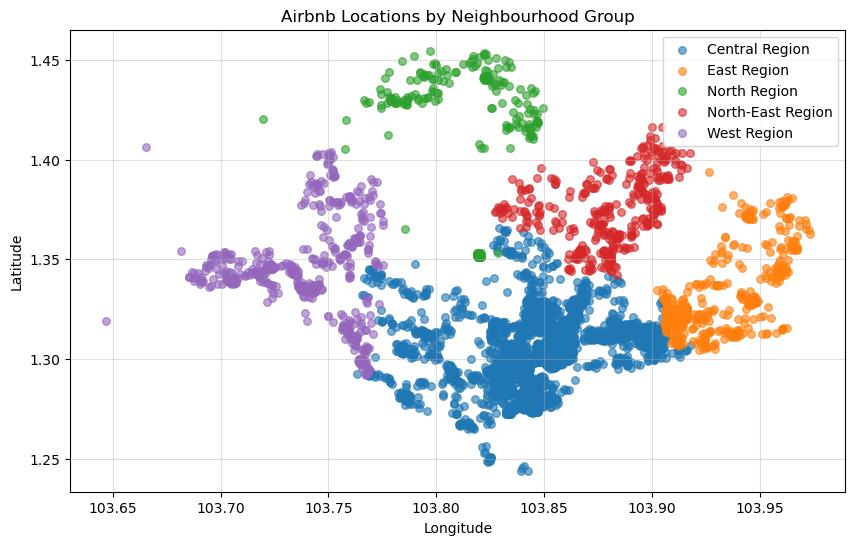

In [75]:

# Assuming 'neighbourhood_group' exists as a column in the dataframe
plt.figure(figsize=(10, 6))

# Scatter plot with color coding for different neighbourhood groups
for neighbourhood_group, group_data in Airbnb_data_wo_tfidf.groupby('neighbourhood_group'):
    plt.scatter(group_data['longitude'], group_data['latitude'], label=neighbourhood_group, s=30, alpha=0.6)

# Add plot labels and legend
plt.title('Airbnb Locations by Neighbourhood Group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(alpha=0.4)
plt.show()


In [76]:
# find categorical variables
Cat_cols = [c for c in airbnb_data_t2.columns if airbnb_data_t2[c].dtypes =='O']

#Check the total sum of null values for categorical data
airbnb_data_t2[Cat_cols].isnull().sum().sort_values()

name                   0
host_name              0
neighbourhood_group    0
neighbourhood          0
room_type              0
dtype: int64

In [77]:
#creating a copy of the dataframe to conduct BERT
airbnb_data_t2_name = airbnb_data_t2.copy()

### Conducting  BERT

In [78]:
airbnb_data_t2_name.head()

name  host_id  host_name  \
0    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1      Pleasant Room along Bukit Timah   227796    Sujatha   
2                          COZICOMFORT   266763  Francesca   
3  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews  reviews_per_month  \
0              30                  1               0.01   
1              30                 18               0.28   
2               6                 20               0.20   
3               1                 14               0.15   
4               1                 22               0.22   

   calculated_host_listings_count  availability_365  location_cluster  
0                               2               365                 5  
1                               1               365                 4  
2                               2               365                 5  
3                               9               353                 1  
4                               9               355                 1

In [79]:
from sentence_transformers import SentenceTransformer

# Load pre-trained BERT model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Extract the "name" column from the dataframe
sentences = airbnb_data_t2_name["name"].astype(str).tolist()  # Convert to a list of strings
embeddings = model.encode(sentences)

print(embeddings)  # Returns numerical sentence vectors ( high-dimensional numerical representations of text, where sentences are converted to meaningful vectors)

#Each row is a numerical representation of a sentence, where similar sentences have closer vector values.
#A larger magnitude (higher norm) might indicate that the sentence contains more distinctive or informative content.
# A smaller magnitude (lower norm) might suggest that the sentence is generic or less informative.
# headers eg. embedding_381 represents hidden features in a deep learning model, encoding their meaning or captures  context relationships. 


[[ 0.06109063  0.03380344 -0.02779629 ... -0.01254491 -0.06146963
   0.01348789]
 [ 0.01996359  0.03127982  0.0092046  ...  0.06166391 -0.11322889
   0.0055532 ]
 [ 0.04760755  0.10475596 -0.08567025 ...  0.01227562  0.05542136
  -0.01617027]
 ...
 [ 0.09799664  0.01457801  0.0108553  ...  0.07142776 -0.03777068
   0.00115617]
 [ 0.06340574  0.01886631  0.05042337 ...  0.01945559 -0.14970599
   0.04557736]
 [ 0.07138047 -0.03674477 -0.00731704 ...  0.06544805 -0.12443452
   0.00447613]]


a. **Merging the embeddings with the data and test the model**

In [80]:

#merging the embeddings with the dataset:

# Convert embeddings to a DataFrame
embeddings_df = pd.DataFrame(embeddings, columns=[f"embedding_{i}" for i in range(embeddings.shape[1])])

# Merge with original dataset
airbnb_data_t2_BERT_merge = pd.concat([airbnb_data_t2_name.reset_index(drop=True), embeddings_df], axis=1)
airbnb_data_t2_BERT_merge.head()

name  host_id  host_name  \
0    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1      Pleasant Room along Bukit Timah   227796    Sujatha   
2                          COZICOMFORT   266763  Francesca   
3  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  ...  embedding_374  embedding_375  embedding_376  \
0              30  ...       0.008592       0.049882      -0.030906   
1              30  ...      -0.002953      -0.011324      -0.061620   
2               6  ...       0.038845       0.006663      -0.011008   
3               1  ...      -0.024447       0.003927      -0.040472   
4               1  ...      -0.023716       0.001977      -0.058772   

   embedding_377  embedding_378  embedding_379  embedding_380  embedding_381  \
0       0.065016      -0.107968      -0.048585      -0.040329      -0.012545   
1      -0.002641      -0.023770       0.042839       0.062850       0.061664   
2       0.001046      -0.083351      -0.066717      -0.007566       0.012276   
3       0.015246      -0.006648       0.085953       0.010256       0.055809   
4       0.030070       0.019515       0.081837       0.041689       0.063242   

   embedding_382  embedding_383  
0      -0.061470       0.013488  
1      -0.113229       0.005553  
2       0.055421      -0.016170  
3      -0.139104       0.031109  
4      -0.151836       0.001773  

[5 rows x 399 columns]

In [81]:
airbnb_data_t2_BERT_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7619 entries, 0 to 7618
Columns: 399 entries, name to embedding_383
dtypes: float32(384), float64(3), int32(1), int64(6), object(5)
memory usage: 12.0+ MB


b. **Use K-means clusterings to group similar listings together (through the embeddings)**

In [82]:
airbnb_data_t2_BERT_K_means = airbnb_data_t2_name.copy()

In [83]:
from sklearn.cluster import KMeans

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
airbnb_data_t2_BERT_K_means["naming_cluster"] = kmeans.fit_predict(embeddings)

airbnb_data_t2_BERT_K_means.head()

name  host_id  host_name  \
0    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1      Pleasant Room along Bukit Timah   227796    Sujatha   
2                          COZICOMFORT   266763  Francesca   
3  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews  reviews_per_month  \
0              30                  1               0.01   
1              30                 18               0.28   
2               6                 20               0.20   
3               1                 14               0.15   
4               1                 22               0.22   

   calculated_host_listings_count  availability_365  location_cluster  \
0                               2               365                 5   
1                               1               365                 4   
2                               2               365                 5   
3                               9               353                 1   
4                               9               355                 1   

   naming_cluster  
0               4  
1               2  
2               0  
3               4  
4               4

In [84]:
airbnb_data_t2_BERT_K_means.to_csv("listing_bert.csv",index = False)

In [85]:
airbnb_data_t2_BERT_K_means_PCA = airbnb_data_t2_BERT_K_means.copy()

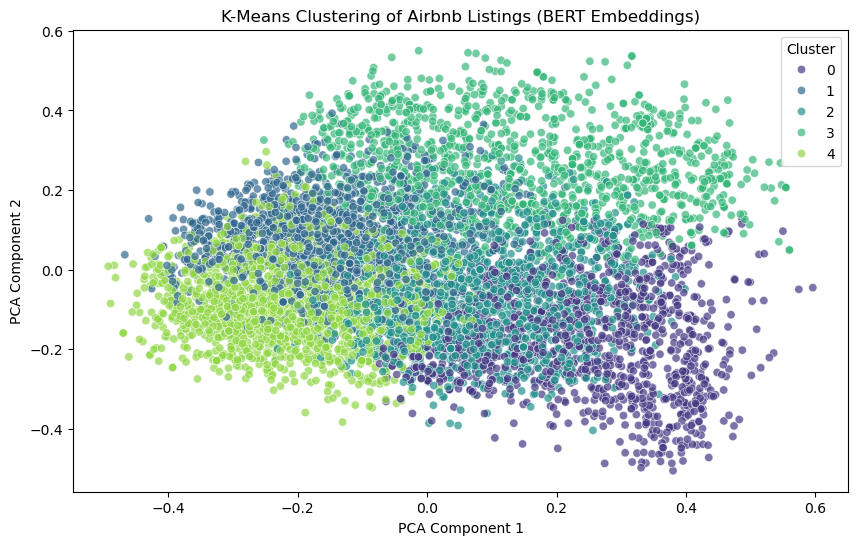

In [86]:
# Perform PCA to reduce embeddings to 2D for visualization
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Add PCA components to DataFrame
airbnb_data_t2_BERT_K_means_PCA['PCA1'] = embeddings_2d[:, 0]
airbnb_data_t2_BERT_K_means_PCA['PCA2'] = embeddings_2d[:, 1]

# Define a color palette for consistency across both plots
unique_clusters = airbnb_data_t2_BERT_K_means_PCA["naming_cluster"].unique()
cluster_palette = sns.color_palette("viridis", len(unique_clusters))
cluster_color_map = {cluster: cluster_palette[i] for i, cluster in enumerate(sorted(unique_clusters))}

# Plot the clusters in PCA space using the same color scheme
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='naming_cluster', palette=cluster_color_map,
    data=airbnb_data_t2_BERT_K_means_PCA, alpha=0.7
)
plt.title('K-Means Clustering of Airbnb Listings (BERT Embeddings)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


C:\Users\xhhhh\AppData\Local\Temp\ipykernel_28272\3776463752.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="naming_cluster", y="price", data=cluster_price_means, palette="viridis")


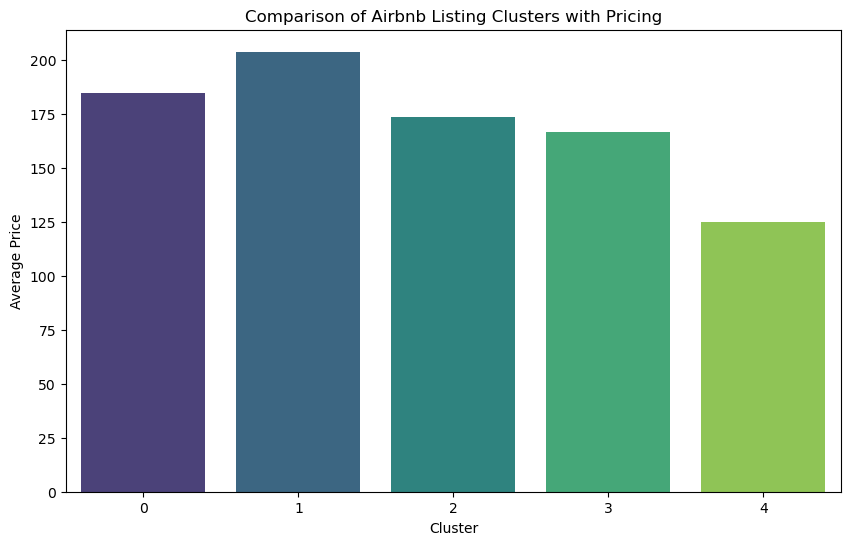

In [87]:
cluster_price_means = airbnb_data_t2_BERT_K_means_PCA.groupby("naming_cluster")["price"].mean().reset_index()

# Plot cluster-wise average pricing
plt.figure(figsize=(10, 6))
sns.barplot(x="naming_cluster", y="price", data=cluster_price_means, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Average Price")
plt.title("Comparison of Airbnb Listing Clusters with Pricing")
plt.show()



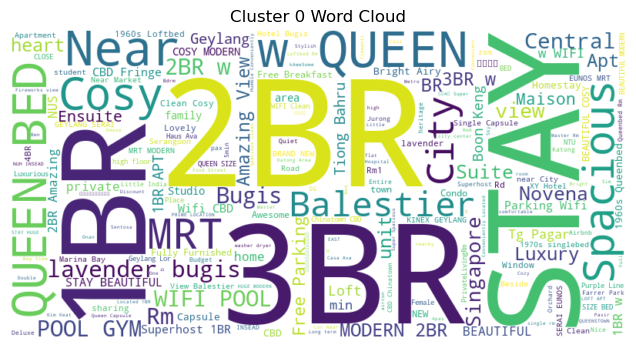

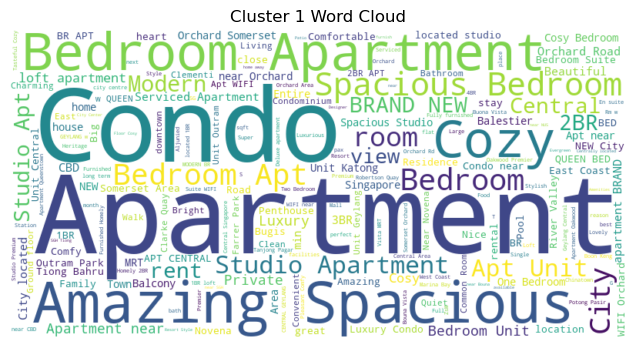

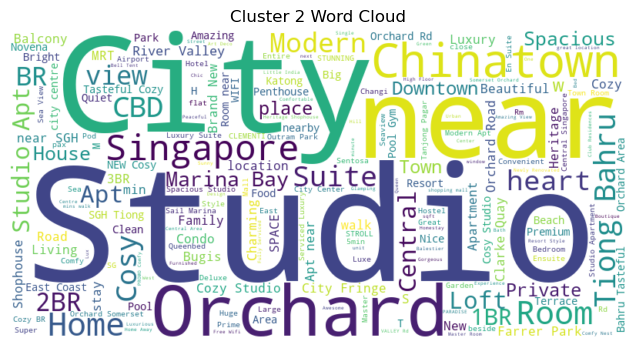

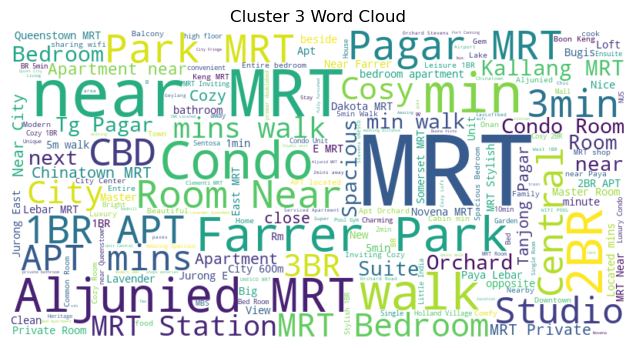

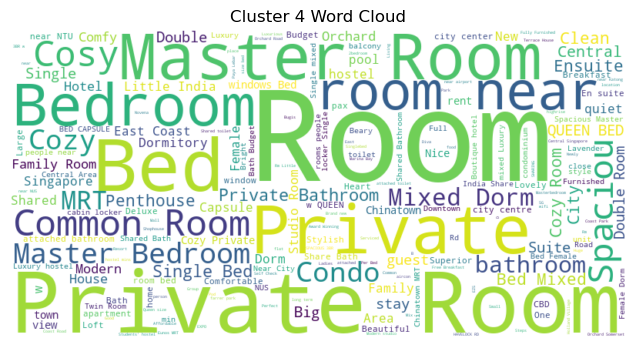

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate and plot word cloud for each cluster
for cluster in range(num_clusters):
    cluster_text = " ".join(airbnb_data_t2_BERT_K_means_PCA[airbnb_data_t2_BERT_K_means_PCA["naming_cluster"] == cluster]["name"])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Cluster {cluster} Word Cloud")
    plt.show()


### Encoding categorical data

In [89]:

# airbnb_data_t2_BERT = airbnb_data_t2_BERT_K_merge.copy()
airbnb_data_t2_BERT = airbnb_data_t2_BERT_K_means.copy()

In [90]:
# 1a. One-Hot Encoding for 'neighbourhood_group' and 'room_type'
airbnb_data_t2 = pd.get_dummies(airbnb_data_t2, columns=['neighbourhood_group', 'room_type'], drop_first=False)
airbnb_data_t2_name = pd.get_dummies(airbnb_data_t2_name, columns=['neighbourhood_group', 'room_type'], drop_first=False)
airbnb_data_t2_BERT =pd.get_dummies(airbnb_data_t2_BERT, columns=['neighbourhood_group', 'room_type'], drop_first=False)

In [91]:
# 2a. Drop 'name', 'host_name' columns
airbnb_data_t2 = airbnb_data_t2.drop(columns=['name','host_name'])
airbnb_data_t2_BERT = airbnb_data_t2_BERT.drop(columns=['name','host_name'])


### Splitting the data by regions

In [92]:
airbnb_data_t2_BERT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7619 entries, 0 to 7906
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   host_id                                7619 non-null   int64  
 1   neighbourhood                          7619 non-null   object 
 2   latitude                               7619 non-null   float64
 3   longitude                              7619 non-null   float64
 4   price                                  7619 non-null   int64  
 5   minimum_nights                         7619 non-null   int64  
 6   number_of_reviews                      7619 non-null   int64  
 7   reviews_per_month                      7619 non-null   float64
 8   calculated_host_listings_count         7619 non-null   int64  
 9   availability_365                       7619 non-null   int64  
 10  location_cluster                       7619 non-null   int32  
 11  naming_cl

Central Region

In [93]:
# Filter the DataFrame to keep only rows where 'neighbourhood_group_Central Region' is True
Central_listing_data = airbnb_data_t2_BERT[airbnb_data_t2_BERT['neighbourhood_group_Central Region'] == True]

# Display the first few rows of the filtered data
Central_listing_data.head()


host_id neighbourhood  latitude  longitude  price  minimum_nights  \
1    227796   Bukit Timah   1.33235  103.78521     81              30   
10  1439258   Bukit Merah   1.28875  103.80814     44              15   
11  1439258   Bukit Merah   1.28837  103.81099     40              30   
14  1439258   Bukit Merah   1.28976  103.80896     44              30   
15  1439258   Bukit Merah   1.28677  103.81244     40              30   

    number_of_reviews  reviews_per_month  calculated_host_listings_count  \
1                  18               0.28                               1   
10                 18               0.23                              32   
11                 10               0.11                              32   
14                 13               0.15                              32   
15                 10               0.14                              32   

    availability_365  location_cluster  naming_cluster  \
1                365                 4               2   
10               331                 4               4   
11               276                 4               3   
14               340                 4               0   
15               331                 0               0   

    neighbourhood_group_Central Region  neighbourhood_group_East Region  \
1                                 True                            False   
10                                True                            False   
11                                True                            False   
14                                True                            False   
15                                True                            False   

    neighbourhood_group_North Region  neighbourhood_group_North-East Region  \
1                              False                                  False   
10                             False                                  False   
11                             False                                  False   
14                             False                                  False   
15                             False                                  False   

    neighbourhood_group_West Region  room_type_Entire home/apt  \
1                             False                      False   
10                            False                      False   
11                            False                      False   
14                            False                      False   
15                            False                      False   

    room_type_Private room  room_type_Shared room  
1                     True                  False  
10                    True                  False  
11                    True                  False  
14                    True                  False  
15                    True                  False

East Region

In [94]:
# Filter the DataFrame to keep only rows where 'neighbourhood_group_East Region' is True
East_listing_data = airbnb_data_t2_BERT[airbnb_data_t2_BERT['neighbourhood_group_East Region'] == True]

# Display the first few rows of the filtered data
East_listing_data.head()

host_id neighbourhood  latitude  longitude  price  minimum_nights  \
3    367042      Tampines   1.34541  103.95712    206               1   
4    367042      Tampines   1.34567  103.95963     94               1   
5    367042      Tampines   1.34702  103.96103    104               1   
6    367042      Tampines   1.34348  103.96337    208               1   
12   367042      Tampines   1.34561  103.95984    417               2   

    number_of_reviews  reviews_per_month  calculated_host_listings_count  \
3                  14               0.15                               9   
4                  22               0.22                               9   
5                  39               0.38                               9   
6                  25               0.25                               9   
12                 12               0.14                               9   

    availability_365  location_cluster  naming_cluster  \
3                353                 1               4   
4                355                 1               4   
5                346                 1               4   
6                172                 1               4   
12               239                 1               1   

    neighbourhood_group_Central Region  neighbourhood_group_East Region  \
3                                False                             True   
4                                False                             True   
5                                False                             True   
6                                False                             True   
12                               False                             True   

    neighbourhood_group_North Region  neighbourhood_group_North-East Region  \
3                              False                                  False   
4                              False                                  False   
5                              False                                  False   
6                              False                                  False   
12                             False                                  False   

    neighbourhood_group_West Region  room_type_Entire home/apt  \
3                             False                      False   
4                             False                      False   
5                             False                      False   
6                             False                      False   
12                            False                      False   

    room_type_Private room  room_type_Shared room  
3                     True                  False  
4                     True                  False  
5                     True                  False  
6                     True                  False  
12                    True                  False

North Region

In [95]:
# Filter the DataFrame to keep only rows where 'neighbourhood_group_North Region' is True
North_listing_data = airbnb_data_t2_BERT[airbnb_data_t2_BERT['neighbourhood_group_North Region'] == True]

# Display the first few rows of the filtered data
North_listing_data.head()

host_id            neighbourhood  latitude  longitude  price  \
0      266763                Woodlands   1.44255  103.79580     83   
2      266763                Woodlands   1.44246  103.79667     69   
100   9238497                Sembawang   1.44843  103.81538    550   
138  11851304                Woodlands   1.44076  103.77626     31   
151  12134297  Central Water Catchment   1.35176  103.81967    500   

     minimum_nights  number_of_reviews  reviews_per_month  \
0                30                  1               0.01   
2                 6                 20               0.20   
100              30                  1               0.01   
138              30                  5               0.07   
151               1                  0               0.00   

     calculated_host_listings_count  availability_365  location_cluster  \
0                                 2               365                 5   
2                                 2               365                 5   
100                               1               365                 5   
138                               1               365                 5   
151                               1               365                 3   

     naming_cluster  neighbourhood_group_Central Region  \
0                 4                               False   
2                 0                               False   
100               4                               False   
138               4                               False   
151               4                               False   

     neighbourhood_group_East Region  neighbourhood_group_North Region  \
0                              False                              True   
2                              False                              True   
100                            False                              True   
138                            False                              True   
151                            False                              True   

     neighbourhood_group_North-East Region  neighbourhood_group_West Region  \
0                                    False                            False   
2                                    False                            False   
100                                  False                            False   
138                                  False                            False   
151                                  False                            False   

     room_type_Entire home/apt  room_type_Private room  room_type_Shared room  
0                        False                    True                  False  
2                        False                    True                  False  
100                      False                    True                  False  
138                      False                    True                  False  
151                      False                    True                  False

West Region

In [96]:
# Filter the DataFrame to keep only rows where 'neighbourhood_group_South Region' is True
West_listing_data = airbnb_data_t2_BERT[airbnb_data_t2_BERT['neighbourhood_group_West Region'] == True]

# Display the first few rows of the filtered data
West_listing_data.head()

host_id  neighbourhood  latitude  longitude  price  minimum_nights  \
24   1030128    Jurong West   1.34135  103.71139     53               2   
58   5748910  Bukit Panjang   1.38123  103.76874     49               3   
89   8739736    Bukit Batok   1.34126  103.75992     82              14   
105  9497281  Choa Chu Kang   1.38717  103.74256     60              30   
122  9497281  Choa Chu Kang   1.38768  103.74476    118              10   

     number_of_reviews  reviews_per_month  calculated_host_listings_count  \
24                  23               0.27                               3   
58                  15               0.20                               2   
89                   0               0.00                               1   
105                  0               0.00                               2   
122                  0               0.00                               2   

     availability_365  location_cluster  naming_cluster  \
24                345                 2               3   
58                131                 2               1   
89                365                 2               4   
105               365                 2               0   
122               294                 2               3   

     neighbourhood_group_Central Region  neighbourhood_group_East Region  \
24                                False                            False   
58                                False                            False   
89                                False                            False   
105                               False                            False   
122                               False                            False   

     neighbourhood_group_North Region  neighbourhood_group_North-East Region  \
24                              False                                  False   
58                              False                                  False   
89                              False                                  False   
105                             False                                  False   
122                             False                                  False   

     neighbourhood_group_West Region  room_type_Entire home/apt  \
24                              True                      False   
58                              True                      False   
89                              True                      False   
105                             True                      False   
122                             True                       True   

     room_type_Private room  room_type_Shared room  
24                     True                  False  
58                     True                  False  
89                     True                  False  
105                    True                  False  
122                   False                  False

In [97]:
len(West_listing_data['minimum_nights'])

538

North East Region

In [98]:
# Filter the DataFrame to keep only rows where 'neighbourhood_group_South Region' is True
North_East_listing_data = airbnb_data_t2_BERT[airbnb_data_t2_BERT['neighbourhood_group_North-East Region'] == True]

# Display the first few rows of the filtered data
North_East_listing_data.head()

host_id neighbourhood  latitude  longitude  price  minimum_nights  \
29  3824517     Serangoon   1.36743  103.87288     26              30   
32  3981231     Serangoon   1.35001  103.87161     44               1   
36  4053150       Punggol   1.39963  103.90640    167               1   
45  4602014       Hougang   1.37037  103.90052     42              30   
48  4602014       Hougang   1.36775  103.89855     40              30   

    number_of_reviews  reviews_per_month  calculated_host_listings_count  \
29                  0               0.00                               1   
32                 36               0.44                               1   
36                  0               0.00                               1   
45                 20               0.25                               3   
48                 10               0.12                               3   

    availability_365  location_cluster  naming_cluster  \
29               365                 6               0   
32                 0                 3               4   
36               365                 6               4   
45               361                 6               4   
48               268                 6               4   

    neighbourhood_group_Central Region  neighbourhood_group_East Region  \
29                               False                            False   
32                               False                            False   
36                               False                            False   
45                               False                            False   
48                               False                            False   

    neighbourhood_group_North Region  neighbourhood_group_North-East Region  \
29                             False                                   True   
32                             False                                   True   
36                             False                                   True   
45                             False                                   True   
48                             False                                   True   

    neighbourhood_group_West Region  room_type_Entire home/apt  \
29                            False                      False   
32                            False                      False   
36                            False                      False   
45                            False                      False   
48                            False                      False   

    room_type_Private room  room_type_Shared room  
29                    True                  False  
32                    True                  False  
36                    True                  False  
45                    True                  False  
48                    True                  False

In [99]:
# List of columns to drop
columns_to_drop = [
    'neighbourhood_group_Central Region',
    'neighbourhood_group_East Region',
    'neighbourhood_group_North Region',
    'neighbourhood_group_North-East Region',
    'neighbourhood_group_West Region'
]

# Drop the columns
Central_data = Central_listing_data.drop(columns=columns_to_drop)
East_data = East_listing_data.drop(columns=columns_to_drop)
North_data = North_listing_data.drop(columns=columns_to_drop)
North_East_data = North_East_listing_data.drop(columns=columns_to_drop)
West_data = West_listing_data.drop(columns=columns_to_drop)

# Display the updated DataFrame structure
Central_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6067 entries, 1 to 7906
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         6067 non-null   int64  
 1   neighbourhood                   6067 non-null   object 
 2   latitude                        6067 non-null   float64
 3   longitude                       6067 non-null   float64
 4   price                           6067 non-null   int64  
 5   minimum_nights                  6067 non-null   int64  
 6   number_of_reviews               6067 non-null   int64  
 7   reviews_per_month               6067 non-null   float64
 8   calculated_host_listings_count  6067 non-null   int64  
 9   availability_365                6067 non-null   int64  
 10  location_cluster                6067 non-null   int32  
 11  naming_cluster                  6067 non-null   int32  
 12  room_type_Entire home/apt       6067 no

In [100]:
East_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 3 to 7886
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         481 non-null    int64  
 1   neighbourhood                   481 non-null    object 
 2   latitude                        481 non-null    float64
 3   longitude                       481 non-null    float64
 4   price                           481 non-null    int64  
 5   minimum_nights                  481 non-null    int64  
 6   number_of_reviews               481 non-null    int64  
 7   reviews_per_month               481 non-null    float64
 8   calculated_host_listings_count  481 non-null    int64  
 9   availability_365                481 non-null    int64  
 10  location_cluster                481 non-null    int32  
 11  naming_cluster                  481 non-null    int32  
 12  room_type_Entire home/apt       481 non-

In [101]:
North_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 7877
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         199 non-null    int64  
 1   neighbourhood                   199 non-null    object 
 2   latitude                        199 non-null    float64
 3   longitude                       199 non-null    float64
 4   price                           199 non-null    int64  
 5   minimum_nights                  199 non-null    int64  
 6   number_of_reviews               199 non-null    int64  
 7   reviews_per_month               199 non-null    float64
 8   calculated_host_listings_count  199 non-null    int64  
 9   availability_365                199 non-null    int64  
 10  location_cluster                199 non-null    int32  
 11  naming_cluster                  199 non-null    int32  
 12  room_type_Entire home/apt       199 non-

In [102]:
North_East_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 29 to 7888
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         334 non-null    int64  
 1   neighbourhood                   334 non-null    object 
 2   latitude                        334 non-null    float64
 3   longitude                       334 non-null    float64
 4   price                           334 non-null    int64  
 5   minimum_nights                  334 non-null    int64  
 6   number_of_reviews               334 non-null    int64  
 7   reviews_per_month               334 non-null    float64
 8   calculated_host_listings_count  334 non-null    int64  
 9   availability_365                334 non-null    int64  
 10  location_cluster                334 non-null    int32  
 11  naming_cluster                  334 non-null    int32  
 12  room_type_Entire home/apt       334 non

In [103]:
West_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 24 to 7900
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         538 non-null    int64  
 1   neighbourhood                   538 non-null    object 
 2   latitude                        538 non-null    float64
 3   longitude                       538 non-null    float64
 4   price                           538 non-null    int64  
 5   minimum_nights                  538 non-null    int64  
 6   number_of_reviews               538 non-null    int64  
 7   reviews_per_month               538 non-null    float64
 8   calculated_host_listings_count  538 non-null    int64  
 9   availability_365                538 non-null    int64  
 10  location_cluster                538 non-null    int32  
 11  naming_cluster                  538 non-null    int32  
 12  room_type_Entire home/apt       538 non

### Train Test Split

In [104]:


X_air_train_wo_tfidf, X_air_test_wo_tfidf, y_air_train_wo_tfidf, y_air_test_wo_tfidf, = train_test_split(airbnb_data_t2,

                                                    airbnb_data_t2[["price"]],
                                                    test_size=0.3, random_state=0)

# price_distribution(y_air_train_wo_tfidf)
# price_distribution(y_air_test_wo_tfidf)

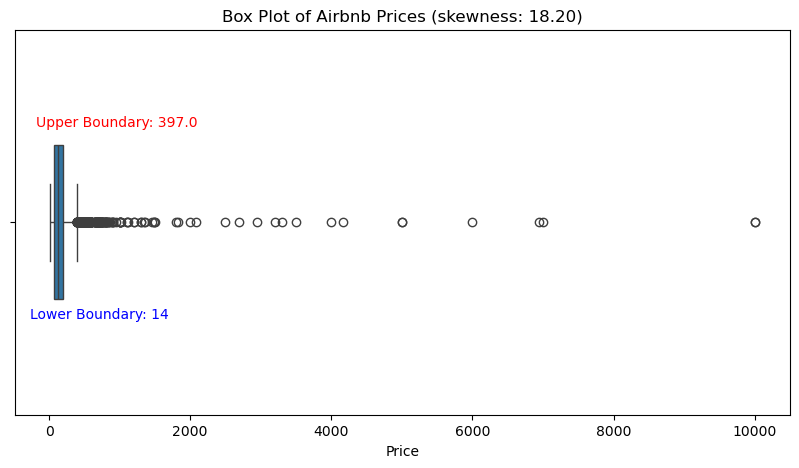

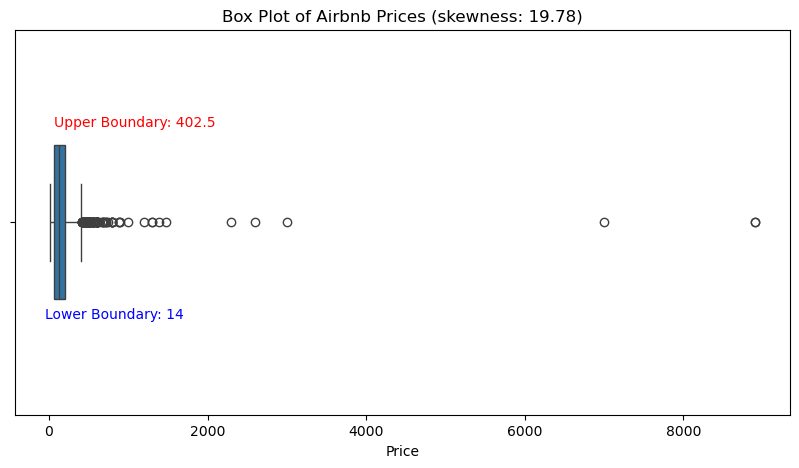

In [105]:
# for BERT model
X_air_train_BERT, X_air_test_BERT, y_air_train_BERT, y_air_test_BERT, = train_test_split(airbnb_data_t2_BERT,
                                                    airbnb_data_t2_BERT[["price"]],
                                                    test_size=0.3, random_state=0)


price_distribution(y_air_train_BERT)
price_distribution(y_air_test_BERT)

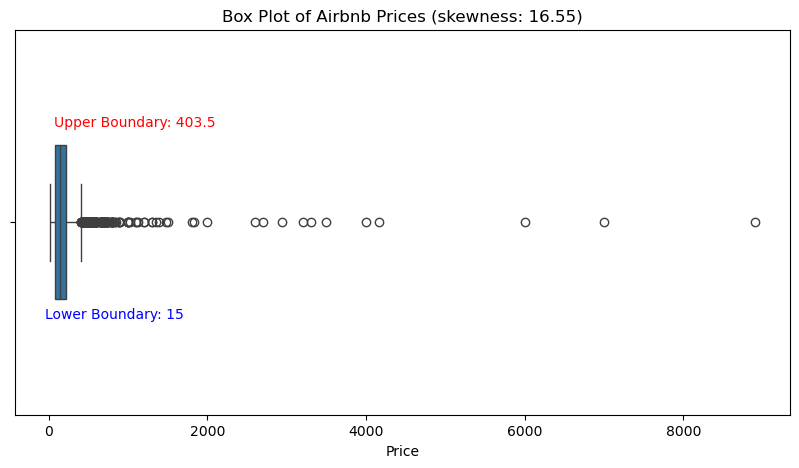

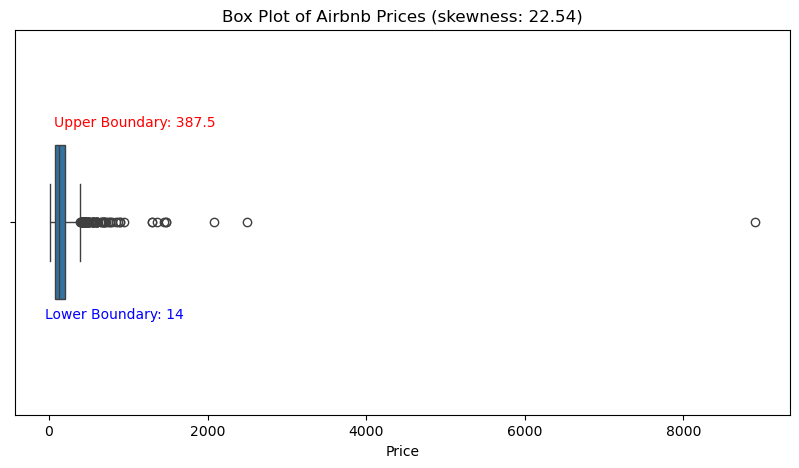

In [106]:
# for Central Data
X_central_train, X_central_test, y_central_train, y_central_test, = train_test_split(Central_data,
                                                    Central_data[["price"]],
                                                    test_size=0.3, random_state=0)


price_distribution(y_central_train)
price_distribution(y_central_test)

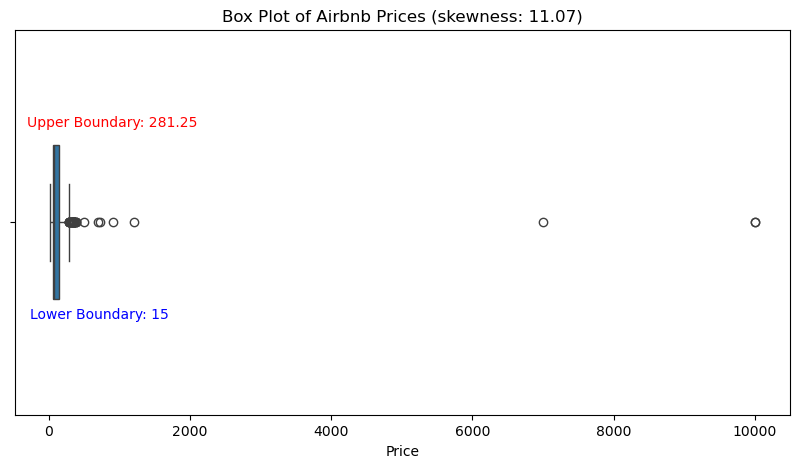

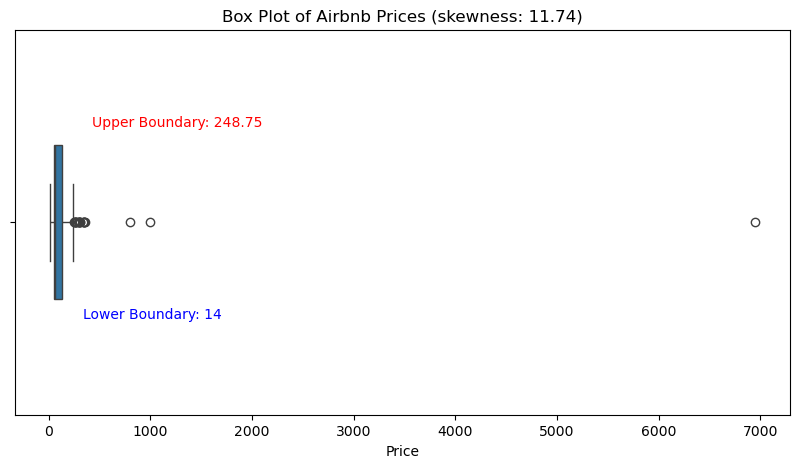

In [107]:
# for West data
X_west_train, X_west_test, y_west_train, y_west_test, = train_test_split(West_data,
                                                    West_data[["price"]],
                                                    test_size=0.3, random_state=7)


price_distribution(y_west_train)
price_distribution(y_west_test)

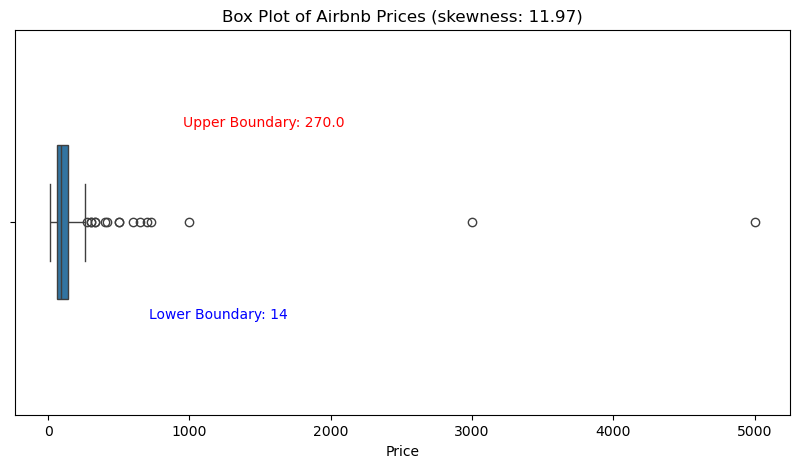

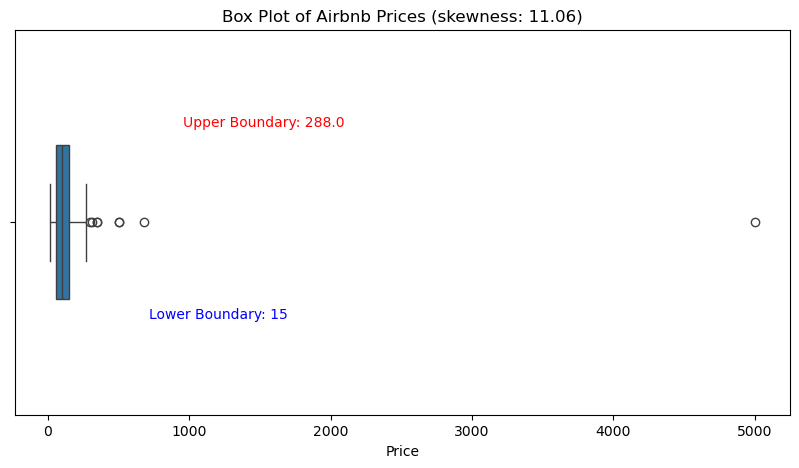

In [108]:
# for East data
X_east_train, X_east_test, y_east_train, y_east_test, = train_test_split(East_data,
                                                    East_data[["price"]],
                                                    test_size=0.3, random_state=4)


price_distribution(y_east_train)
price_distribution(y_east_test)

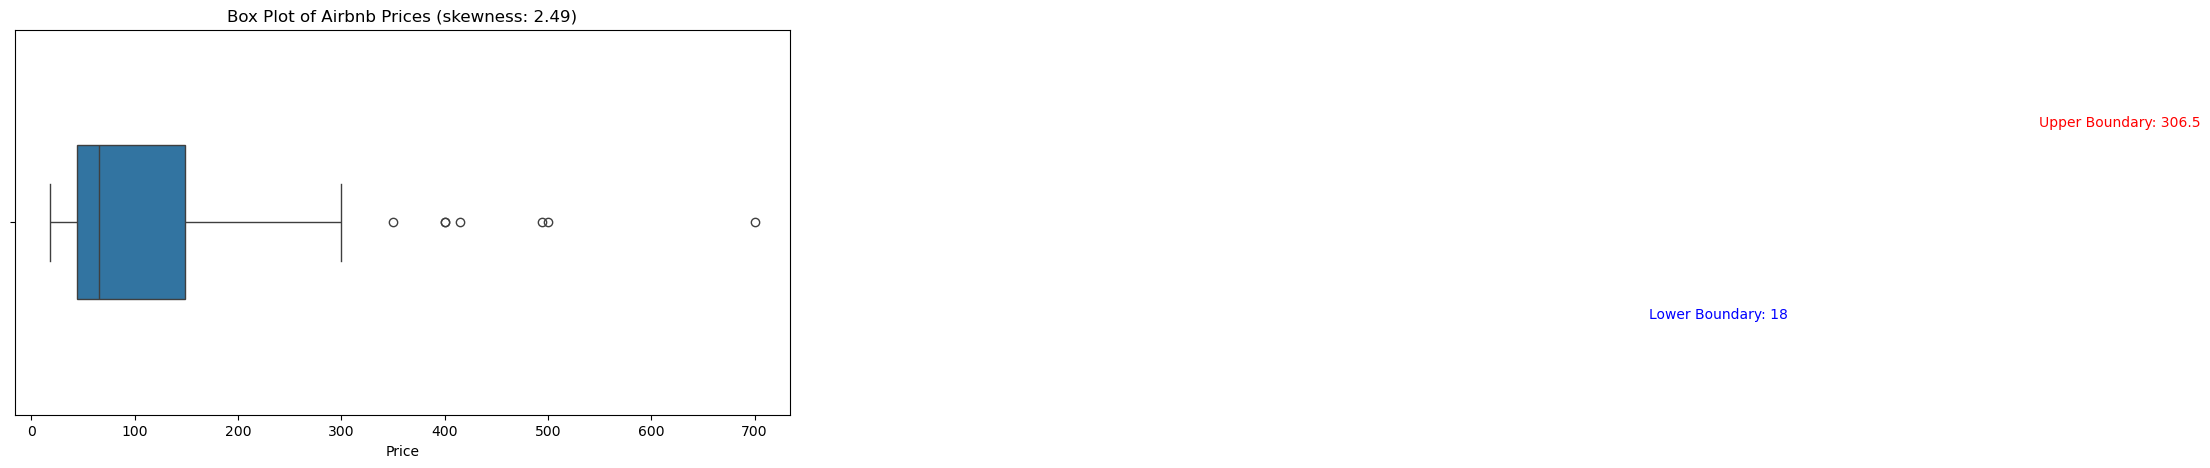

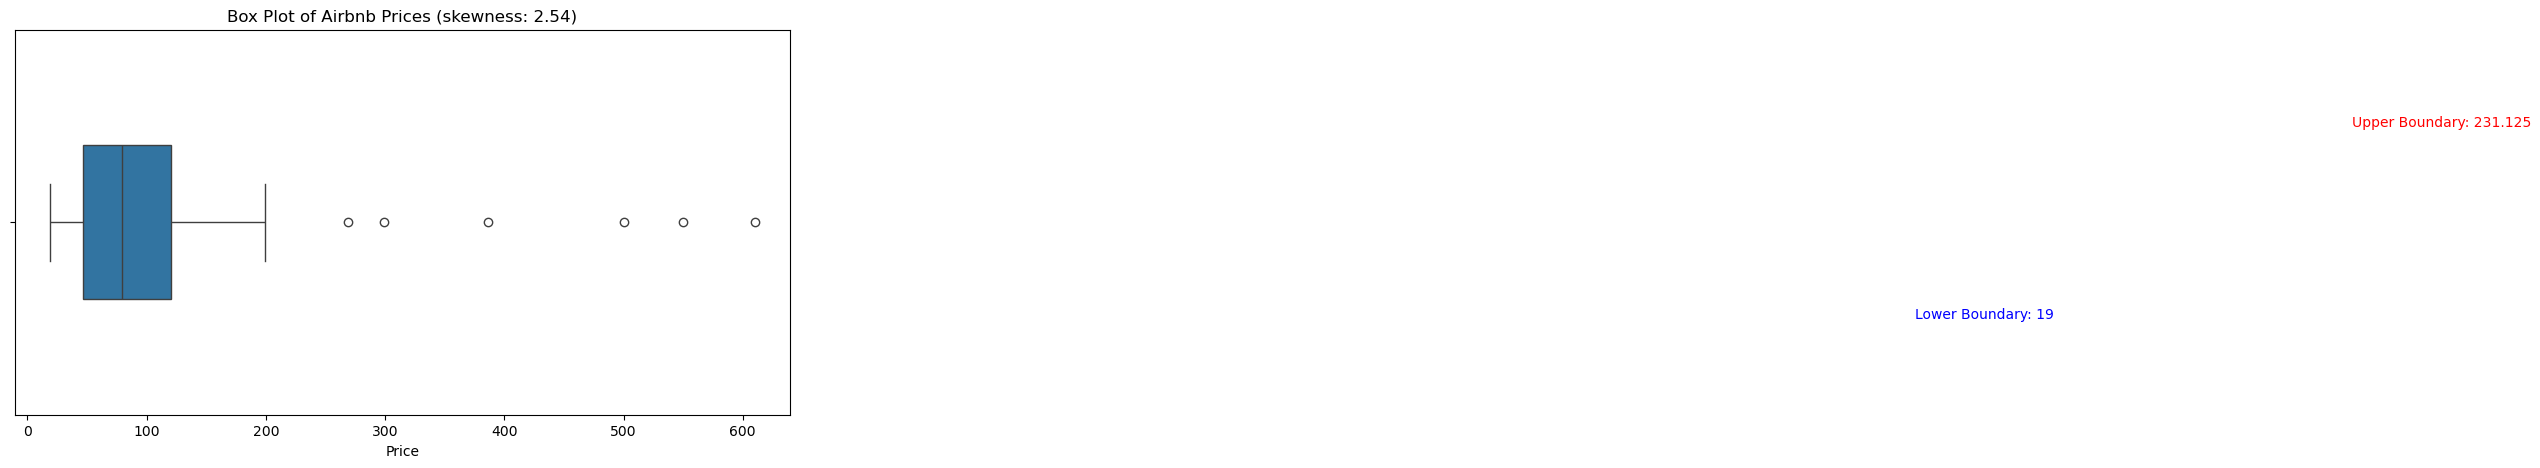

In [109]:
# for North data
X_north_train, X_north_test, y_north_train, y_north_test, = train_test_split(North_data,
                                                    North_data[["price"]],
                                                    test_size=0.3, random_state=2)


price_distribution(y_north_train)
price_distribution(y_north_test)

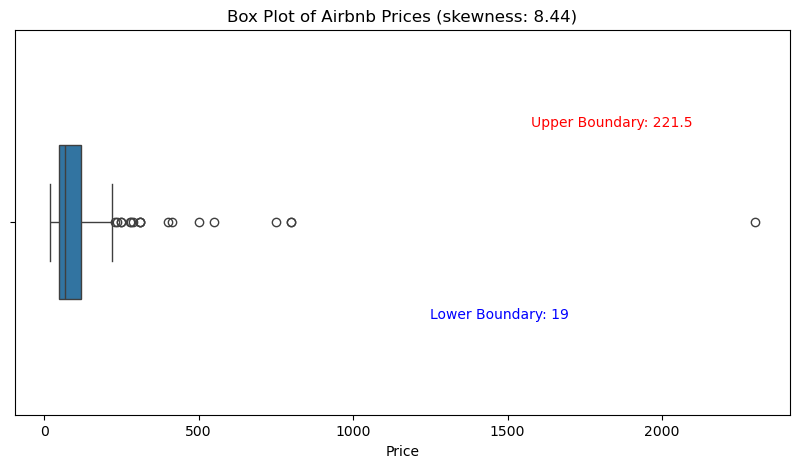

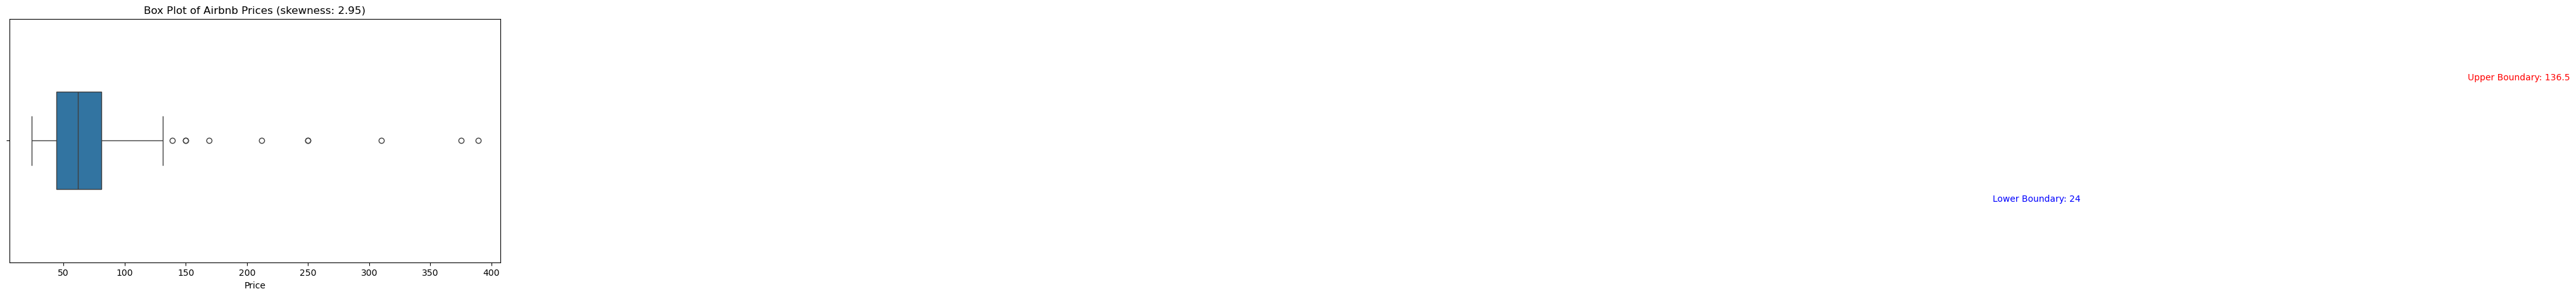

In [110]:
# for North east data
X_north_east_train, X_north_east_test, y_north_east_train, y_north_east_test, = train_test_split(North_East_data,
                                                    North_East_data[["price"]],
                                                    test_size=0.3, random_state=10)


price_distribution(y_north_east_train)
price_distribution(y_north_east_test)

**Mean encoding on neighbourhood group**

In [111]:
# make a function for conducting target mean encoding 
def target_mean_encoding(train_df, test_df, categorical_feature, target_feature):
    """
    Perform Target Mean Encoding for a categorical feature.

    Parameters:
    - train_df (pd.DataFrame): Training dataset
    - test_df (pd.DataFrame): Test dataset
    - categorical_feature (str): Name of the categorical feature to encode
    - target_feature (str): Name of the target variable (used for encoding)

    Returns:
    - train_df (pd.DataFrame): Updated training dataset with encoded feature
    - test_df (pd.DataFrame): Updated test dataset with encoded feature
    """

    # Compute target mean for the categorical feature in training set
    target_means = train_df.groupby(categorical_feature)[target_feature].mean()

    # Apply target mean encoding to the training set
    train_df[f"{categorical_feature}_encoded"] = train_df[categorical_feature].map(target_means)

    # Apply target mean encoding to the test set using training means
    test_df[f"{categorical_feature}_encoded"] = test_df[categorical_feature].map(target_means)

    # Compute global median of the target in the training set
    global_median = train_df[target_feature].median()

    # Fill NaN values in the test set with the global median
    test_df[f"{categorical_feature}_encoded"] = test_df[f"{categorical_feature}_encoded"].fillna(global_median)

    # Drop the original categorical feature
    train_df.drop(columns=[categorical_feature], inplace=True)
    test_df.drop(columns=[categorical_feature], inplace=True)

    # Drop the target variable from the features dataset
    train_df = train_df.drop(columns=target_feature, errors='ignore')
    test_df = test_df.drop(columns=target_feature, errors='ignore')

    return train_df, test_df

In [112]:
X_air_train_wo_tfidf, X_air_test_wo_tfidf = target_mean_encoding( X_air_train_wo_tfidf, X_air_test_wo_tfidf, categorical_feature="neighbourhood", target_feature="price")

In [113]:
X_air_test_wo_tfidf.isnull().sum()

host_id                                  0
latitude                                 0
longitude                                0
minimum_nights                           0
number_of_reviews                        0
reviews_per_month                        0
calculated_host_listings_count           0
availability_365                         0
location_cluster                         0
neighbourhood_group_Central Region       0
neighbourhood_group_East Region          0
neighbourhood_group_North Region         0
neighbourhood_group_North-East Region    0
neighbourhood_group_West Region          0
room_type_Entire home/apt                0
room_type_Private room                   0
room_type_Shared room                    0
neighbourhood_encoded                    0
dtype: int64

In [114]:
# X_air_train_BERT, X_air_test_BERT = target_mean_encoding( X_air_train_BERT, X_air_test_BERT, categorical_feature="neighbourhood", target_feature="price")

In [115]:
# do the same to 

categorical_feature = "neighbourhood"
target_feature = "price"

# Compute target mean for the categorical feature in training set
target_means = X_air_train_BERT.groupby(categorical_feature)[target_feature].mean()

# Apply target mean encoding to the training set
X_air_train_BERT[f"{categorical_feature}_encoded"] = X_air_train_BERT[categorical_feature].map(target_means)

# Apply target mean encoding to the test set using training means
X_air_test_BERT[f"{categorical_feature}_encoded"] = X_air_test_BERT[categorical_feature].map(target_means)

# Compute global median of the target in training set 
global_median = y_air_train_BERT[target_feature].median()

# Fill NaN values for test set with median price (try 1)
X_air_test_BERT[f"{categorical_feature}_encoded"] = X_air_test_BERT[f"{categorical_feature}_encoded"].fillna(global_median)

# Drop the original categorical column from training and test sets
X_air_train_BERT.drop(columns=[categorical_feature], inplace=True)
X_air_test_BERT.drop(columns=[categorical_feature], inplace=True)

# Drop the target variable from training and test sets
X_air_train_BERT = X_air_train_BERT.drop(columns='price')
X_air_test_BERT = X_air_test_BERT.drop(columns='price')



In [116]:
X_central_train, X_central_test = target_mean_encoding( X_central_train, X_central_test, categorical_feature="neighbourhood", target_feature="price")

In [117]:
X_west_train, X_west_test = target_mean_encoding( X_west_train, X_west_test, categorical_feature="neighbourhood", target_feature="price")

In [118]:
# X_west_train, X_west_test = target_mean_encoding( X_west_train, X_west_test, categorical_feature="neighbourhood", target_feature="price")
X_north_train, X_north_test = target_mean_encoding( X_north_train, X_north_test, categorical_feature="neighbourhood", target_feature="price")
X_east_train, X_east_test = target_mean_encoding( X_east_train, X_east_test, categorical_feature="neighbourhood", target_feature="price")
X_north_east_train, X_north_east_test = target_mean_encoding( X_north_east_train, X_north_east_test, categorical_feature="neighbourhood", target_feature="price")


### Numerical Data transformation

In [119]:
pipe = Pipeline([
    ('power1', PowerTransformer(variables = [ 'number_of_reviews','reviews_per_month'], exp=0.3)),    
    ('power2', PowerTransformer(variables = ['calculated_host_listings_count','minimum_nights'], exp=0.1))])

pipe.fit(X_air_train_wo_tfidf)


c:\Users\xhhhh\anaconda35\Lib\site-packages\feature_engine\transformation\power.py:147: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.6206566  0.         1.71176986 ... 1.23114441 1.         1.23114441]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, self.variables_] = np.power(X.loc[:, self.variables_], self.exp)


Pipeline(steps=[('power1',
                 PowerTransformer(exp=0.3,
                                  variables=['number_of_reviews',
                                             'reviews_per_month'])),
                ('power2',
                 PowerTransformer(exp=0.1,
                                  variables=['calculated_host_listings_count',
                                             'minimum_nights']))])

In [120]:
Vars = ['number_of_reviews','reviews_per_month','calculated_host_listings_count','minimum_nights']

# Explicitly cast variables to float before transformations
X_air_train_wo_tfidf[Vars] = X_air_train_wo_tfidf[Vars].astype(float)
X_air_test_wo_tfidf[Vars] = X_air_test_wo_tfidf[Vars].astype(float)

X_train = pipe.transform(X_air_train_wo_tfidf)
X_test = pipe.transform(X_air_test_wo_tfidf)

In [121]:
X_train.head()

host_id  latitude  longitude  minimum_nights  number_of_reviews  \
665    37629739   1.31553  103.89090        1.000000           1.620657   
7600  138649185   1.29375  103.82666        1.071773           0.000000   
546     3751978   1.28985  103.84782        1.071773           1.711770   
5318   66406177   1.27423  103.84576        1.405116           1.000000   
4560  201775246   1.30972  103.86207        1.335141           1.000000   

      reviews_per_month  calculated_host_listings_count  availability_365  \
665            0.501187                        1.116123                 0   
7600           0.000000                        1.541989               364   
546            0.529364                        1.000000                 0   
5318           0.587672                        1.752972               305   
4560           0.501187                        1.472733               336   

      location_cluster  neighbourhood_group_Central Region  \
665                  7                                True   
7600                 0                                True   
546                  0                                True   
5318                 0                                True   
4560                 7                                True   

      neighbourhood_group_East Region  neighbourhood_group_North Region  \
665                             False                             False   
7600                            False                             False   
546                             False                             False   
5318                            False                             False   
4560                            False                             False   

      neighbourhood_group_North-East Region  neighbourhood_group_West Region  \
665                                   False                            False   
7600                                  False                            False   
546                                   False                            False   
5318                                  False                            False   
4560                                  False                            False   

      room_type_Entire home/apt  room_type_Private room  \
665                       False                    True   
7600                       True                   False   
546                       False                    True   
5318                       True                   False   
4560                      False                    True   

      room_type_Shared room  neighbourhood_encoded  
665                   False             168.591900  
7600                  False             193.707143  
546                   False             185.691057  
5318                  False             201.494949  
4560                  False             158.651989

In [122]:
null_columns = X_air_test_BERT.columns[X_air_test_BERT.isnull().any()]
print("Columns with null values:", null_columns.tolist())


Columns with null values: []


In [123]:
#doing the same to BERT data
pipe = Pipeline([
    ('power1', PowerTransformer(variables = [ 'number_of_reviews','reviews_per_month'], exp=0.3)),    
    ('power2', PowerTransformer(variables = ['calculated_host_listings_count','minimum_nights'], exp=0.1))])

pipe.fit(X_air_train_BERT)

Vars = ['number_of_reviews','reviews_per_month','calculated_host_listings_count','minimum_nights']

# Explicitly cast variables to float before transformations
X_air_train_BERT[Vars] = X_air_train_BERT[Vars].astype(float)
X_air_test_BERT[Vars] = X_air_test_BERT[Vars].astype(float)

X_train_BERT = pipe.transform(X_air_train_BERT)
X_test_BERT = pipe.transform(X_air_test_BERT)

X_train_BERT.head()

c:\Users\xhhhh\anaconda35\Lib\site-packages\feature_engine\transformation\power.py:147: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.6206566  0.         1.71176986 ... 1.23114441 1.         1.23114441]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, self.variables_] = np.power(X.loc[:, self.variables_], self.exp)


host_id  latitude  longitude  minimum_nights  number_of_reviews  \
665    37629739   1.31553  103.89090        1.000000           1.620657   
7600  138649185   1.29375  103.82666        1.071773           0.000000   
546     3751978   1.28985  103.84782        1.071773           1.711770   
5318   66406177   1.27423  103.84576        1.405116           1.000000   
4560  201775246   1.30972  103.86207        1.335141           1.000000   

      reviews_per_month  calculated_host_listings_count  availability_365  \
665            0.501187                        1.116123                 0   
7600           0.000000                        1.541989               364   
546            0.529364                        1.000000                 0   
5318           0.587672                        1.752972               305   
4560           0.501187                        1.472733               336   

      location_cluster  naming_cluster  neighbourhood_group_Central Region  \
665                  7               4                                True   
7600                 0               2                                True   
546                  0               2                                True   
5318                 0               3                                True   
4560                 7               4                                True   

      neighbourhood_group_East Region  neighbourhood_group_North Region  \
665                             False                             False   
7600                            False                             False   
546                             False                             False   
5318                            False                             False   
4560                            False                             False   

      neighbourhood_group_North-East Region  neighbourhood_group_West Region  \
665                                   False                            False   
7600                                  False                            False   
546                                   False                            False   
5318                                  False                            False   
4560                                  False                            False   

      room_type_Entire home/apt  room_type_Private room  \
665                       False                    True   
7600                       True                   False   
546                       False                    True   
5318                       True                   False   
4560                      False                    True   

      room_type_Shared room  neighbourhood_encoded  
665                   False             168.591900  
7600                  False             193.707143  
546                   False             185.691057  
5318                  False             201.494949  
4560                  False             158.651989

In [124]:
def diagnostic_plots(dataset, variable):
    # define figure size
    plt.figure(figsize=(16, 5))

    skewness_value = skew(dataset[variable].dropna()) 

    # Adjust the vertical spacing between subplots
    plt.subplots_adjust(top=0.8)
    plt.suptitle(f"Histogram, Q-Q plot, and Boxplot for {variable}", fontsize=16)
    
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(dataset[variable], bins=30)
    plt.title(f'Histogram(Skewness: {skewness_value:.2f})')
    
    # Bi-variate Analysis
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(dataset[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=dataset[variable])
    plt.title('Boxplot')

    # Show the boxplots
    plt.show()

### Scaling

In [125]:
# # # # standardization: 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled_wo_tfidf = scaler.transform(X_train)
X_test_scaled_wo_tfidf = scaler.transform(X_test)


In [126]:
# Retain the original indices while creating scaled DataFrames
X_train_scaled_wo_tfidf_df = pd.DataFrame(X_train_scaled_wo_tfidf, columns=X_train.columns, index=X_train.index)
X_test_scaled_wo_tfidf = pd.DataFrame(X_test_scaled_wo_tfidf, columns=X_test.columns, index=X_test.index)

# Display the scaled DataFrame
X_train_scaled_wo_tfidf_df.head()

host_id  latitude  longitude  minimum_nights  number_of_reviews  \
665  -0.667826  0.033411   0.961843       -1.087104           0.454078   
7600  0.550293 -0.664254  -0.482662       -0.595701          -1.082334   
546  -1.076334 -0.789180  -0.006857       -0.595701           0.540455   
5318 -0.320832 -1.289526  -0.053178        1.686557          -0.134316   
4560  1.311484 -0.152697   0.313570        1.207471          -0.134316   

      reviews_per_month  calculated_host_listings_count  availability_365  \
665           -0.058981                       -0.673768         -1.416687   
7600          -1.113481                        1.086918          1.057415   
546            0.000303                       -1.153863         -1.416687   
5318           0.122982                        1.959199          0.656393   
4560          -0.058981                        0.800589          0.867099   

      location_cluster  neighbourhood_group_Central Region  \
665           1.402513                            0.513852   
7600         -1.051540                            0.513852   
546          -1.051540                            0.513852   
5318         -1.051540                            0.513852   
4560          1.402513                            0.513852   

      neighbourhood_group_East Region  neighbourhood_group_North Region  \
665                         -0.265026                         -0.165394   
7600                        -0.265026                         -0.165394   
546                         -0.265026                         -0.165394   
5318                        -0.265026                         -0.165394   
4560                        -0.265026                         -0.165394   

      neighbourhood_group_North-East Region  neighbourhood_group_West Region  \
665                               -0.214701                        -0.279723   
7600                              -0.214701                        -0.279723   
546                               -0.214701                        -0.279723   
5318                              -0.214701                        -0.279723   
4560                              -0.214701                        -0.279723   

      room_type_Entire home/apt  room_type_Private room  \
665                   -1.046652                1.153628   
7600                   0.955427               -0.866831   
546                   -1.046652                1.153628   
5318                   0.955427               -0.866831   
4560                  -1.046652                1.153628   

      room_type_Shared room  neighbourhood_encoded  
665               -0.225012              -0.009317  
7600              -0.225012               0.161670  
546               -0.225012               0.107096  
5318              -0.225012               0.214690  
4560              -0.225012              -0.076989

In [127]:
#Doing the same to BERT data
scaler = StandardScaler()
scaler.fit(X_train_BERT)
X_train_scaled_BERT = scaler.transform(X_train_BERT)
X_test_scaled_BERT  = scaler.transform(X_test_BERT)

# Retain the original indices while creating scaled DataFrames
X_train_scaled_BERT = pd.DataFrame(X_train_scaled_BERT , columns=X_train_BERT.columns, index=X_train_BERT.index)
X_test_scaled_BERT  = pd.DataFrame(X_test_scaled_BERT , columns=X_test_BERT.columns, index=X_test_BERT.index)

# Display the scaled DataFrame
X_test_scaled_BERT

host_id  latitude  longitude  minimum_nights  number_of_reviews  \
901  -0.723688  0.013551  -0.952171       -0.595701           0.354593   
7579  2.231947 -0.928201  -0.317389       -0.292056          -1.082334   
6821  0.894613 -0.453161  -0.139075       -0.292056           0.084813   
7286  1.161373 -0.448997   0.010008        0.383639           0.454078   
5376 -0.742168 -0.642472  -0.231043       -0.292056           0.084813   
...        ...       ...        ...             ...                ...   
7720  0.764454 -0.695966  -0.157963       -0.595701          -1.082334   
3756  0.190042 -0.195621   1.428654       -1.087104          -0.134316   
3153 -0.840184 -1.071706   0.016079        0.383639           1.010116   
6643  1.525819  0.234894   0.349772        0.383639          -1.082334   
1801 -0.022283  0.017715   1.322295        0.256410           0.454078   

      reviews_per_month  calculated_host_listings_count  availability_365  \
901           -0.091791                       -1.153863         -1.416687   
7579          -1.113481                        0.540113         -0.906914   
6821           1.476851                       -1.153863         -0.906914   
7286           2.087499                       -0.083371          0.180604   
5376           0.291073                        1.350720         -0.940898   
...                 ...                             ...               ...   
7720          -1.113481                        1.103499          1.050618   
3756           0.000303                        1.321011          1.016633   
3153           0.718195                        0.690582          0.819520   
6643          -1.113481                        1.344873          1.064211   
1801           0.122982                       -0.083371          0.846708   

      location_cluster  naming_cluster  neighbourhood_group_Central Region  \
901           0.350776       -0.774299                            0.513852   
7579         -1.051540       -0.060622                            0.513852   
6821         -1.051540       -0.060622                            0.513852   
7286         -1.051540        0.653055                            0.513852   
5376         -1.051540       -0.060622                            0.513852   
...                ...             ...                                 ...   
7720         -1.051540       -0.060622                            0.513852   
3756         -0.700961        1.366732                           -1.946087   
3153         -1.051540       -0.774299                            0.513852   
6643          1.402513        1.366732                            0.513852   
1801         -0.700961        1.366732                           -1.946087   

      neighbourhood_group_East Region  neighbourhood_group_North Region  \
901                         -0.265026                         -0.165394   
7579                        -0.265026                         -0.165394   
6821                        -0.265026                         -0.165394   
7286                        -0.265026                         -0.165394   
5376                        -0.265026                         -0.165394   
...                               ...                               ...   
7720                        -0.265026                         -0.165394   
3756                         3.773214                         -0.165394   
3153                        -0.265026                         -0.165394   
6643                        -0.265026                         -0.165394   
1801                         3.773214                         -0.165394   

      neighbourhood_group_North-East Region  neighbourhood_group_West Region  \
901                               -0.214701                        -0.279723   
7579                              -0.214701                        -0.279723   
6821                              -0.214701                        -0.279723   
7286                              -

In [129]:
X_central_train.to_csv("X_central_train.csv",index = False)
X_east_train.to_csv("X_east_train.csv",index = False)
X_north_east_train.to_csv("X_north_east_train.csv",index = False)
X_north_train.to_csv("X_north_train.csv",index = False)
X_west_train.to_csv("X_west_train.csv",index = False)

In [83]:
#centrl data
scaler.fit(X_central_train)
X_central_train_scaled = scaler.transform(X_central_train)
X_central_test_scaled  = scaler.transform(X_central_test)

# Retain the original indices while creating scaled DataFrames
X_central_train_scaled_df = pd.DataFrame(X_central_train_scaled , columns=X_central_train.columns, index=X_central_train.index)
X_central_test_scaled_df  = pd.DataFrame(X_central_test_scaled , columns=X_central_test.columns, index=X_central_test.index)

# Display the scaled DataFrame
X_central_train_scaled_df

host_id  latitude  longitude  minimum_nights  number_of_reviews  \
7807 -1.023453  0.554729   1.436506       -0.540698          -0.547612   
6665  0.749070 -0.754629  -3.156435        0.117125          -0.547612   
5862 -0.337948 -1.680585  -0.220148        1.996621          -0.547612   
6381  1.474750  0.448630   0.242342       -0.164799          -0.547612   
6417  1.255590  1.557847   0.579423        0.493024          -0.547612   
...        ...       ...        ...             ...                ...   
6565  1.745605  0.142390   0.063816       -0.728647          -0.547612   
4681 -0.337948 -1.659485  -0.218950        1.996621          -0.547612   
2546 -0.731123  0.151432   1.976476       -0.634673           3.988839   
3888 -0.743016 -0.219915  -0.029241       -0.258774          -0.284629   
4041  0.689698  0.721714   0.178440       -0.634673          -0.416121   

      reviews_per_month  calculated_host_listings_count  availability_365  \
7807          -0.584185                        2.214872          1.025193   
6665          -0.584185                       -0.695308          0.303680   
5862          -0.584185                        3.237757         -0.750838   
6381          -0.584185                        0.918257          1.018255   
6417          -0.584185                        0.255543          1.025193   
...                 ...                             ...               ...   
6565          -0.584185                       -0.695308          1.025193   
4681          -0.584185                        3.237757         -0.265205   
2546           1.950402                       -0.378357         -1.167096   
3888          -0.326766                        0.255543          0.948879   
4041          -0.435674                       -0.680901         -1.507039   

      location_cluster  naming_cluster  room_type_Entire home/apt  \
7807          1.316652        0.720644                   0.822358   
6665          0.332755        0.720644                  -1.216015   
5862         -0.979108        0.720644                   0.822358   
6381          1.316652       -1.469138                   0.822358   
6417          1.316652       -0.739210                   0.822358   
...                ...             ...                        ...   
6565          1.316652        1.450571                  -1.216015   
4681         -0.979108        0.720644                   0.822358   
2546         -0.651142       -1.469138                   0.822358   
3888         -0.979108       -0.739210                   0.822358   
4041          1.316652        0.720644                   0.822358   

      room_type_Private room  room_type_Shared room  neighbourhood_encoded  
7807               -0.730725              -0.242051              -0.126268  
6665                1.368503              -0.242051              -0.441858  
5862               -0.730725              -0.242051               0.236104  
6381               -0.730725              -0.242051              -0.191660  
6417               -0.730725              -0.242051              -0.161619  
...                      ...                    ...                    ...  
6565               -0.730725               4.131354               0.243521  
4681               -0.730725              -0.242051               0.236104  
2546               -0.730725              -0.242051              -0.366617  
3888               -0.730725              -0.242051               0.243521  
4041               -0.730725              -0.242051              -0.191660  

[4246 rows x 14 columns]

In [84]:
# West data
scaler.fit(X_west_train)
X_west_train_scaled = scaler.transform(X_west_train)
X_west_test_scaled  = scaler.transform(X_west_test)

# Retain the original indices while creating scaled DataFrames
X_west_train_scaled_df = pd.DataFrame(X_west_train_scaled, columns=X_west_train.columns, index=X_west_train.index)
X_west_test_scaled_df  = pd.DataFrame(X_west_test_scaled, columns=X_west_test.columns, index=X_west_test.index)

# Display the scaled DataFrame
X_west_train_scaled_df


host_id  latitude  longitude  minimum_nights  number_of_reviews  \
2727  0.166165  1.515607   0.822335       -0.738716           0.885006   
606  -0.762324  0.626762   0.397350       -0.738716          -0.503818   
3284  0.974781  0.302078  -1.656164       -0.561632          -0.411230   
2889  0.763189  0.098544  -0.820477       -0.384547           0.144300   
2942  0.690135 -1.188484   0.815843        0.500876          -0.411230   
...        ...       ...        ...             ...                ...   
4083  0.261855  0.397383  -1.077978       -0.650174          -0.133465   
2689 -0.316376 -1.185658   0.675191        1.829011           1.810889   
7210 -0.607262 -1.784952   1.006696       -0.738716          -0.411230   
2523 -0.316376 -1.133563   0.684712        0.058165           2.181242   
2358  0.443773 -0.261679  -2.187178       -0.561632           1.810889   

      reviews_per_month  calculated_host_listings_count  availability_365  \
2727           0.622781                       -0.281023         -0.413101   
606           -0.571215                       -0.354076          1.166681   
3284          -0.482111                       -0.339466         -1.170883   
2889          -0.036590                       -0.178748          1.108884   
2942          -0.482111                        0.741726          1.108884   
...                 ...                             ...               ...   
4083          -0.054410                       -0.354076          1.166681   
2689           1.246511                        3.634646          0.556603   
7210           0.765348                       -0.339466         -1.170883   
2523           1.335615                        3.634646         -1.170883   
2358           1.139586                       -0.354076          0.505228   

      location_cluster  naming_cluster  room_type_Entire home/apt  \
2727         -0.482480        1.171754                   1.606534   
606          -0.482480        1.171754                  -0.622458   
3284         -0.482480        1.171754                  -0.622458   
2889         -0.482480        0.474634                   1.606534   
2942          2.072625       -0.222485                  -0.622458   
...                ...             ...                        ...   
4083         -0.482480       -0.222485                  -0.622458   
2689          2.072625       -0.919604                   1.606534   
7210          2.072625       -0.919604                   1.606534   
2523          2.072625       -0.919604                   1.606534   
2358         -0.482480       -1.616723                  -0.622458   

      room_type_Private room  room_type_Shared room  neighbourhood_encoded  
2727               -1.506508              -0.165295              -0.175114  
606                 0.663787              -0.165295              -0.170692  
3284                0.663787              -0.165295              -0.181641  
2889               -1.506508              -0.165295              -0.181641  
2942                0.663787              -0.165295              -0.036310  
...                      ...                    ...                    ...  
4083                0.663787              -0.165295              -0.181641  
2689               -1.506508              -0.165295              -0.036310  
7210               -1.506508              -0.165295              -0.036310  
2523               -1.506508              -0.165295              -0.036310  
2358                0.663787              -0.165295              -0.181641  

[376 rows x 14 columns]

In [85]:
# North data
scaler.fit(X_north_train)
X_north_train_scaled = scaler.transform(X_north_train)
X_north_test_scaled  = scaler.transform(X_north_test)

# Retain the original indices while creating scaled DataFrames
X_north_train_scaled_df = pd.DataFrame(X_north_train_scaled, columns=X_north_train.columns, index=X_north_train.index)
X_north_test_scaled_df  = pd.DataFrame(X_north_test_scaled, columns=X_north_test.columns, index=X_north_test.index)

# Display the scaled DataFrame
X_north_train_scaled_df



host_id  latitude  longitude  minimum_nights  number_of_reviews  \
1044 -0.539550  0.205725   0.526609        1.967291           1.410877   
6727 -0.592514 -0.062855   0.804040        0.144268          -0.148824   
3374 -0.637516 -0.216510   1.300380       -0.676092          -0.477182   
1463 -0.916769  0.309630  -1.260649       -0.584941          -0.477182   
7877 -1.090036  0.672041  -0.690183       -0.676092          -0.477182   
...        ...       ...        ...             ...                ...   
1484 -0.257621  0.557430   0.876432       -0.676092          -0.477182   
793  -0.610433 -0.089619   1.402249       -0.584941           0.754161   
2264 -0.541531  0.374178  -1.504701       -0.676092           4.366102   
592  -0.707289  0.704157   0.440779       -0.129185          -0.395093   
7127 -1.090175  0.470212  -0.645100       -0.584941          -0.148824   

      reviews_per_month  calculated_host_listings_count  availability_365  \
1044          -0.013742                       -0.286952          0.931475   
6727           0.801136                       -0.049425         -0.509639   
3374          -0.469373                       -0.213867          0.873573   
1463          -0.469373                       -0.305223         -1.378167   
7877          -0.469373                       -0.250409          0.892874   
...                 ...                             ...               ...   
1484          -0.469373                       -0.305223         -1.378167   
793           -0.188985                       -0.305223          0.970077   
2264           1.239243                       -0.305223         -0.136493   
592           -0.451849                       -0.286952          0.963643   
7127           1.151622                       -0.305223         -1.378167   

      location_cluster  naming_cluster  room_type_Entire home/apt  \
1044           0.46351        1.136044                  -0.613382   
6727           0.46351        0.496732                   1.630305   
3374           0.46351       -0.142580                  -0.613382   
1463           0.46351       -1.421204                   1.630305   
7877           0.46351        0.496732                  -0.613382   
...                ...             ...                        ...   
1484           0.46351        1.136044                  -0.613382   
793            0.46351        1.136044                  -0.613382   
2264           0.46351       -0.781892                   1.630305   
592            0.46351        1.136044                  -0.613382   
7127           0.46351        1.136044                  -0.613382   

      room_type_Private room  room_type_Shared room  neighbourhood_encoded  
1044                0.714751              -0.263117              -1.638316  
6727               -1.399088              -0.263117               0.218356  
3374                0.714751              -0.263117               0.218356  
1463               -1.399088              -0.263117              -0.596525  
7877                0.714751              -0.263117              -0.596525  
...                      ...                    ...                    ...  
1484                0.714751              -0.263117               0.218356  
793                 0.714751              -0.263117               0.218356  
2264               -1.399088              -0.263117              -0.596525  
592                -1.399088               3.800585              -0.813616  
7127                0.714751              -0.263117              -0.596525  

[139 rows x 14 columns]

In [86]:
# North-East data
scaler.fit(X_north_east_train)
X_north_east_train_scaled = scaler.transform(X_north_east_train)
X_north_east_test_scaled  = scaler.transform(X_north_east_test)

# Retain the original indices while creating scaled DataFrames
X_north_east_train_scaled_df = pd.DataFrame(X_north_east_train_scaled, columns=X_north_east_train.columns, index=X_north_east_train.index)
X_north_east_test_scaled_df  = pd.DataFrame(X_north_east_test_scaled, columns=X_north_east_test.columns, index=X_north_east_test.index)

# Display the scaled DataFrame
X_north_east_train_scaled_df


host_id  latitude  longitude  minimum_nights  number_of_reviews  \
241  -0.766567 -0.065297   1.036533        1.570081          -0.195902   
4759 -0.183046  0.070932  -2.403407       -0.291850          -0.528108   
7311  2.193015  1.712131   1.632274       -0.696617          -0.528108   
3303 -0.836411  1.265278   1.001714       -0.615664           3.657689   
5348 -0.265004  1.493695   1.470103       -0.696617          -0.395225   
...        ...       ...        ...             ...                ...   
2045 -0.368936  1.264691  -1.488093        1.570081          -0.528108   
7590 -0.721245  0.208922  -2.310874        1.570081          -0.528108   
203  -0.805842  0.137871  -1.307320       -0.777571          -0.528108   
2066 -0.475572  1.853056   0.758457       -0.291850          -0.195902   
5812 -0.385735 -0.007165   1.169609        1.570081          -0.461667   

      reviews_per_month  calculated_host_listings_count  availability_365  \
241           -0.413774                       -0.162362          1.270969   
4759          -0.487019                       -0.088905         -0.586333   
7311          -0.487019                       -0.162362         -1.129443   
3303           2.259684                       -0.015448          0.794910   
5348           0.053166                       -0.088905          1.224034   
...                 ...                             ...               ...   
2045          -0.487019                        0.131466          1.277674   
7590          -0.487019                       -0.015448          0.265210   
203           -0.487019                       -0.162362         -1.162969   
2066          -0.322217                       -0.088905          1.230739   
5812          -0.276439                        0.131466          0.868665   

      location_cluster  naming_cluster  room_type_Entire home/apt  \
241           0.529841       -0.255668                  -0.509372   
4759         -1.799460       -0.255668                  -0.509372   
7311          0.529841       -0.255668                  -0.509372   
3303          0.529841        1.025422                  -0.509372   
5348          0.529841        1.025422                  -0.509372   
...                ...             ...                        ...   
2045         -0.246593        1.025422                  -0.509372   
7590         -1.799460        1.025422                  -0.509372   
203          -1.799460        1.025422                  -0.509372   
2066          0.529841       -0.896213                  -0.509372   
5812          0.529841       -0.896213                   1.963203   

      room_type_Private room  room_type_Shared room  neighbourhood_encoded  
241                 -1.77784               5.303301               1.262064  
4759                 0.56248              -0.188562               0.293017  
7311                 0.56248              -0.188562              -0.930444  
3303                 0.56248              -0.188562              -1.102993  
5348                 0.56248              -0.188562              -0.930444  
...                      ...                    ...                    ...  
2045                 0.56248              -0.188562               0.293017  
7590                 0.56248              -0.188562               0.293017  
203                  0.56248              -0.188562               0.293017  
2066                 0.56248              -0.188562              -0.930444  
5812                -1.77784              -0.188562               1.262064  

[233 rows x 14 columns]

In [87]:
# East data
scaler.fit(X_east_train)
X_east_train_scaled = scaler.transform(X_east_train)
X_east_test_scaled  = scaler.transform(X_east_test)

# Retain the original indices while creating scaled DataFrames
X_east_train_scaled_df = pd.DataFrame(X_east_train_scaled, columns=X_east_train.columns, index=X_east_train.index)
X_east_test_scaled_df  = pd.DataFrame(X_east_test_scaled, columns=X_east_test.columns, index=X_east_test.index)

# Display the scaled DataFrame
X_east_train_scaled_df


host_id  latitude  longitude  minimum_nights  number_of_reviews  \
2605  0.367549  0.660479   1.229892        1.868809          -0.564243   
2008 -1.110104  0.642631   1.515548       -0.389271          -0.069080   
5356 -0.541117  1.184991   0.118950       -0.649818          -0.564243   
1114 -0.595719 -0.466380  -1.106458       -0.562969           4.139811   
4    -1.171203  0.771033   1.492041       -0.649818           0.797457   
...        ...       ...        ...             ...                ...   
4767  0.355339 -0.536282  -0.888256       -0.215572          -0.254766   
2263  0.430057 -0.593790   0.638650       -0.562969          -0.440452   
6474  2.419333 -0.722688   1.558473       -0.649818          -0.316662   
1953 -0.766157 -0.901161   0.296272       -0.562969          -0.564243   
1355 -0.300465 -0.124307  -0.952132       -0.562969          -0.564243   

      reviews_per_month  calculated_host_listings_count  availability_365  \
2605          -0.563410                       -0.423470          1.254340   
2008          -0.296500                       -0.019917         -0.698652   
5356          -0.563410                       -0.389841          1.247765   
1114           1.327200                       -0.389841          1.201735   
4             -0.318743                       -0.154435          1.188583   
...                 ...                             ...               ...   
4767          -0.051833                        3.208504          1.162280   
2263          -0.496682                       -0.389841         -0.790712   
6474           0.415259                       -0.389841         -0.580289   
1953          -0.563410                       -0.389841          1.254340   
1355          -0.563410                       -0.423470         -1.145802   

      location_cluster  naming_cluster  room_type_Entire home/apt  \
2605         -0.461515        0.265984                   1.788854   
2008         -0.461515       -1.828641                  -0.559017   
5356          2.166775       -1.828641                  -0.559017   
1114         -0.461515       -0.432224                   1.788854   
4            -0.461515        0.964192                  -0.559017   
...                ...             ...                        ...   
4767         -0.461515        0.265984                   1.788854   
2263         -0.461515       -1.130432                  -0.559017   
6474         -0.461515       -0.432224                   1.788854   
1953         -0.461515       -1.828641                  -0.559017   
1355         -0.461515       -1.828641                  -0.559017   

      room_type_Private room  room_type_Shared room  neighbourhood_encoded  
2605               -1.665917                -0.1659              -1.398630  
2008                0.600270                -0.1659              -1.398630  
5356                0.600270                -0.1659              -1.398630  
1114               -1.665917                -0.1659               0.581218  
4                   0.600270                -0.1659              -1.398630  
...                      ...                    ...                    ...  
4767               -1.665917                -0.1659               0.581218  
2263                0.600270                -0.1659               0.581218  
6474               -1.665917                -0.1659               0.581218  
1953                0.600270                -0.1659               0.581218  
1355                0.600270                -0.1659               0.581218  

[336 rows x 14 columns]

### **3.2 Build the Models** <a id="airbnb-build"></a>  

In [88]:
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Compute metrics for training set
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_rmse = np.sqrt(train_mse)  # RMSE
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)

    # Compute metrics for test set
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse = np.sqrt(test_mse)  # RMSE
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)

    # Print results
    print(f"Train MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
    print(f"Test MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")

    # Create DataFrame with results
    results_df = pd.DataFrame({
        "Metric": ["MSE", "RMSE", "MAE", "R²"],
        "Train Score": [train_mse, train_rmse, train_mae, train_r2],
        "Test Score": [test_mse, test_rmse, test_mae, test_r2]
    })

    # Return as tuple
    return train_mse, train_rmse, train_mae, train_r2, test_mse, test_rmse, test_mae, test_r2

**Training models with data cleansed in the last assignment**

In [89]:
from lazypredict.Supervised import LazyRegressor
# Initialize LazyRegressor
regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Train and evaluate models
models, predictions = regressor.fit(X_air_train, X_air_test, y_air_train, y_air_test)

# Display results
display(models)

100%|██████████| 42/42 [01:13<00:00,  1.76s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7357
[LightGBM] [Info] Number of data points in the train set: 5334, number of used features: 119
[LightGBM] [Info] Start training from score 168.199475


Adjusted R-Squared  \
Model                                                         
ExtraTreesRegressor                                    0.11   
BaggingRegressor                                       0.09   
HistGradientBoostingRegressor                          0.09   
MLPRegressor                                           0.09   
LGBMRegressor                                          0.08   
PoissonRegressor                                       0.08   
KNeighborsRegressor                                    0.08   
SGDRegressor                                           0.07   
TransformedTargetRegressor                             0.07   
LinearRegression                                       0.07   
Ridge                                                  0.07   
RidgeCV                                                0.07   
Lars                                                   0.06   
Lasso                                                  0.06   
LassoLars                                              0.06   
LassoLarsCV                                            0.06   
LassoCV                                                0.06   
LarsCV                                                 0.06   
BayesianRidge                                          0.06   
ElasticNetCV                                           0.06   
LassoLarsIC                                            0.06   
XGBRegressor                                           0.06   
RandomForestRegressor                                  0.05   
OrthogonalMatchingPursuit                              0.05   
OrthogonalMatchingPursuitCV                            0.05   
ElasticNet                                             0.04   
TweedieRegressor                                       0.03   
GammaRegressor                                         0.02   
HuberRegressor                                         0.02   
LinearSVR                                              0.01   
PassiveAggressiveRegressor                             0.00   
GradientBoostingRegressor                             -0.00   
NuSVR                                                 -0.05   
DummyRegressor                                        -0.06   
SVR                                                   -0.06   
QuantileRegressor                                     -0.07   
KernelRidge                                           -0.14   
GaussianProcessRegressor                              -0.18   
ExtraTreeRegressor                                    -0.20   
DecisionTreeRegressor                                 -0.35   
AdaBoostRegressor                                     -2.43   
RANSACRegressor               -8059712566134628100866048.00   

                                                  R-Squared  \
Model                                                         
ExtraTreesRegressor                                    0.15   
BaggingRegressor                                       0.14   
HistGradientBoostingRegressor                          0.14   
MLPRegressor                                           0.13   
LGBMRegressor                                          0.13   
PoissonRegressor                                       0.13   
KNeighborsRegressor                                    0.13   
SGDRegressor                                           0.12   
TransformedTargetRegressor                             0.11   
LinearRegression                                       0.11   
Ridge                                                  0.11   
RidgeCV                                                0.11   
Lars                                                   0.11   
Lasso                                                  0.11   
LassoLars                                              0.11   
LassoLarsCV                                            0.11   
LassoCV                                                0.11   
LarsCV                                                 0.11   
Bayesian

In [90]:

# # Define models
# models = {
#     "MLP Regressor": MLPRegressor(random_state=42),
#     "LassoLarsCV": LassoLarsCV(),
#     "Lars": Lars(),
#     "RidgeCV": RidgeCV(),
#     "Ridge": Ridge(),
#     "LassoCV": LassoCV(),
#     "Linear Regression": LinearRegression(),
#     "Bayesian Ridge": BayesianRidge(),
#     "Lasso": Lasso(),
#     "LassoLars": LassoLars(),
#     "HistGradientBoosting Regressor": HistGradientBoostingRegressor(random_state=42),
#     "LassoLarsIC": LassoLarsIC(),
#     "LarsCV": LarsCV(),
#     "LGBM Regressor": LGBMRegressor(random_state=42),
#     "XGBoost Regressor": XGBRegressor(random_state=42),
#     "Extra Trees Regressor": ExtraTreesRegressor(random_state=42),
#     "Random Forest Regressor": RandomForestRegressor(random_state=42),
#     "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
#     "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
#     "Support Vector Regressor": SVR(),
#     "Linear SVR": LinearSVR(random_state=42),
#     "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
# }

# # Store results
# results = []

# # Train and evaluate each model
# for name, model in models.items():
#     print(f"\033[1mTraining {name}...\033[0m")
    
#     # Train model
#     model.fit(X_air_train, y_air_train)

#     # Evaluate model performance
#     metrics = evaluate_regression_model(model, X_air_train, y_air_train, X_air_test, y_air_test)
#     results.append([name] + list(metrics))

#     print("")

# # Create results DataFrame
# results_df = pd.DataFrame(results, columns=["Model", "Train MSE", "Train RMSE", "Train MAE", "Train R²", 
#                                             "Test MSE", "Test RMSE", "Test MAE", "Test R²"])

# # Sort by best R² on test data
# results_df = results_df.sort_values(by="Test R²", ascending=False)

In [91]:
# most of the models perform better with data that has no TFIDF, meaning TFIDF has introduced noise to the dataset. 
# next step: try out other methods of capturing the meaning of words, like BERT

**Training models without TFIDF done to the data**

In [92]:
# # Train and evaluate model with data without tfidf
# models, predictions = regressor.fit(X_train_scaled_wo_tfidf, X_test_scaled_wo_tfidf, y_air_train_wo_tfidf, y_air_test_wo_tfidf)

# # Display results
# display(models)

**Training models with BERT conducted on names**

In [93]:
# Train and evaluate model with data with BERT
models, predictions = regressor.fit(X_train_scaled_BERT, X_test_scaled_BERT, y_air_train_BERT, y_air_test_BERT)

# Display results
display(models)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:32<00:00,  1.28it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1479
[LightGBM] [Info] Number of data points in the train set: 5333, number of used features: 19
[LightGBM] [Info] Start training from score 169.960435


Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
MLPRegressor                                 0.16       0.16   307.23   
TransformedTargetRegressor                   0.15       0.15   309.10   
LinearRegression                             0.15       0.15   309.10   
LassoLarsCV                                  0.15       0.15   309.10   
LassoLarsIC                                  0.15       0.15   309.10   
Lars                                         0.15       0.15   309.10   
RidgeCV                                      0.15       0.15   309.10   
Ridge                                        0.15       0.15   309.10   
LassoCV                                      0.15       0.15   309.16   
BayesianRidge                                0.14       0.15   309.24   
Lasso                                        0.14       0.15   309.55   
LassoLars                                    0.14       0.15   309.55   
LarsCV                                       0.14       0.15   309.79   
OrthogonalMatchingPursuitCV                  0.14       0.14   310.80   
ElasticNetCV                                 0.13       0.14   311.28   
HistGradientBoostingRegressor                0.13       0.14   311.28   
ExtraTreesRegressor                          0.13       0.14   311.58   
LGBMRegressor                                0.13       0.13   312.68   
ElasticNet                                   0.11       0.12   315.29   
OrthogonalMatchingPursuit                    0.10       0.11   316.91   
PassiveAggressiveRegressor                   0.10       0.10   317.69   
KNeighborsRegressor                          0.09       0.10   318.80   
TweedieRegressor                             0.09       0.10   318.92   
HuberRegressor                               0.08       0.09   319.88   
PoissonRegressor                             0.08       0.09   320.90   
RandomForestRegressor                        0.07       0.08   322.23   
GradientBoostingRegressor                    0.07       0.08   322.44   
LinearSVR                                    0.06       0.07   324.06   
GammaRegressor                               0.06       0.06   325.02   
RANSACRegressor                              0.03       0.04   329.28   
NuSVR                                        0.01       0.02   332.08   
SVR                                          0.01       0.01   333.39   
DummyRegressor                              -0.01      -0.00   335.81   
QuantileRegressor                           -0.02      -0.02   338.55   
BaggingRegressor                            -0.04      -0.03   341.50   
XGBRegressor                                -0.11      -0.10   352.05   
KernelRidge                                 -0.11      -0.10   352.90   
DecisionTreeRegressor                       -0.61      -0.60   424.76   
ExtraTreeRegressor                          -0.67      -0.66   432.32   
AdaBoostRegressor                          -10.79     -10.69  1148.23   
SGDRegressor                               -13.40     -13.28  1268.97   
GaussianProcessRegressor                 -8727.59   -8655.01 31242.66   

                               Time Taken  
Model                                      
MLPRegressor                         8.33  
TransformedTargetRegressor           0.02  
LinearRegression                     0.02  
LassoLarsCV                          0.13  
LassoLarsIC                          0.04  
Lars                                 0.05  
RidgeCV                              0.03  
Ridge                                0.01  
LassoCV                              0.74  
BayesianRidge                        0.02  
Lasso                                0.06  
LassoLars                            0.01  
LarsCV                               0.07  
OrthogonalMatchingPursuitCV          0.03  
ElasticNetCV                         0.16  
HistGradientBoostingRegressor        0.40  
ExtraTreesRegressor       

In [94]:

# Define models
reg_models = {
    "MLP Regressor": MLPRegressor(random_state=42),
    "LassoLarsCV": LassoLarsCV(),
    "Lars": Lars(),
    "RidgeCV": RidgeCV(),
    "Ridge": Ridge(),
    "LassoCV": LassoCV(),
    "Linear Regression": LinearRegression(),
    "Bayesian Ridge": BayesianRidge(),
    "Lasso": Lasso(),
    "LassoLars": LassoLars(),
    "HistGradientBoosting Regressor": HistGradientBoostingRegressor(random_state=42),
    "LassoLarsIC": LassoLarsIC(),
    "LarsCV": LarsCV(),
    "LGBM Regressor": LGBMRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42),
    "Extra Trees Regressor": ExtraTreesRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "Linear SVR": LinearSVR(random_state=42),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
}

# Store results
results = []

# Train and evaluate each model
for name, model in reg_models.items():
    print(f"\033[1mTraining {name}...\033[0m")
    
    # Train model
    model.fit(X_train_scaled_BERT, y_air_train_BERT)

    # Evaluate model performance
    metrics = evaluate_regression_model(model, X_train_scaled_BERT, y_air_train_BERT, X_test_scaled_BERT, y_air_test_BERT)
    results.append([name] + list(metrics))

    print("")

# Create results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Train MSE", "Train RMSE", "Train MAE", "Train R²", 
                                            "Test MSE", "Test RMSE", "Test MAE", "Test R²"])

# Sort by best R² on test data
results_df = results_df.sort_values(by="Test R²", ascending=False)


Training MLP Regressor...
Train MSE: 76495.6986, RMSE: 276.5786, MAE: 85.7230, R²: 0.2681
Test MSE: 94391.7548, RMSE: 307.2324, MAE: 88.4366, R²: 0.1629

Training LassoLarsCV...
Train MSE: 78349.7826, RMSE: 279.9103, MAE: 87.9038, R²: 0.2503
Test MSE: 95541.3898, RMSE: 309.0977, MAE: 89.9571, R²: 0.1527

Training Lars...
Train MSE: 78349.7826, RMSE: 279.9103, MAE: 87.9038, R²: 0.2503
Test MSE: 95541.3898, RMSE: 309.0977, MAE: 89.9571, R²: 0.1527

Training RidgeCV...
Train MSE: 78349.7826, RMSE: 279.9103, MAE: 87.9036, R²: 0.2503
Test MSE: 95541.5656, RMSE: 309.0980, MAE: 89.9567, R²: 0.1527

Training Ridge...
Train MSE: 78349.7837, RMSE: 279.9103, MAE: 87.9010, R²: 0.2503
Test MSE: 95543.1477, RMSE: 309.1005, MAE: 89.9533, R²: 0.1527

Training LassoCV...
Train MSE: 78350.9802, RMSE: 279.9125, MAE: 87.8096, R²: 0.2503
Test MSE: 95578.1526, RMSE: 309.1572, MAE: 89.8175, R²: 0.1524

Training Linear Regression...
Train MSE: 78353.1203, RMSE: 279.9163, MAE: 87.8642, R²: 0.2503
Test MSE: 955

In [95]:
# East data
scaler.fit(X_east_train)
X_east_train_scaled = scaler.transform(X_east_train)
X_east_test_scaled  = scaler.transform(X_east_test)

# Retain the original indices while creating scaled DataFrames
X_east_train_scaled_df = pd.DataFrame(X_east_train_scaled, columns=X_east_train.columns, index=X_east_train.index)
X_east_test_scaled_df  = pd.DataFrame(X_east_test_scaled, columns=X_east_test.columns, index=X_east_test.index)

# Display the scaled DataFrame
X_east_train_scaled_df

host_id  latitude  longitude  minimum_nights  number_of_reviews  \
2605     0.37      0.66       1.23            1.87              -0.56   
2008    -1.11      0.64       1.52           -0.39              -0.07   
5356    -0.54      1.18       0.12           -0.65              -0.56   
1114    -0.60     -0.47      -1.11           -0.56               4.14   
4       -1.17      0.77       1.49           -0.65               0.80   
...       ...       ...        ...             ...                ...   
4767     0.36     -0.54      -0.89           -0.22              -0.25   
2263     0.43     -0.59       0.64           -0.56              -0.44   
6474     2.42     -0.72       1.56           -0.65              -0.32   
1953    -0.77     -0.90       0.30           -0.56              -0.56   
1355    -0.30     -0.12      -0.95           -0.56              -0.56   

      reviews_per_month  calculated_host_listings_count  availability_365  \
2605              -0.56                           -0.42              1.25   
2008              -0.30                           -0.02             -0.70   
5356              -0.56                           -0.39              1.25   
1114               1.33                           -0.39              1.20   
4                 -0.32                           -0.15              1.19   
...                 ...                             ...               ...   
4767              -0.05                            3.21              1.16   
2263              -0.50                           -0.39             -0.79   
6474               0.42                           -0.39             -0.58   
1953              -0.56                           -0.39              1.25   
1355              -0.56                           -0.42             -1.15   

      location_cluster  naming_cluster  room_type_Entire home/apt  \
2605             -0.46            0.27                       1.79   
2008             -0.46           -1.83                      -0.56   
5356              2.17           -1.83                      -0.56   
1114             -0.46           -0.43                       1.79   
4                -0.46            0.96                      -0.56   
...                ...             ...                        ...   
4767             -0.46            0.27                       1.79   
2263             -0.46           -1.13                      -0.56   
6474             -0.46           -0.43                       1.79   
1953             -0.46           -1.83                      -0.56   
1355             -0.46           -1.83                      -0.56   

      room_type_Private room  room_type_Shared room  neighbourhood_encoded  
2605                   -1.67                  -0.17                  -1.40  
2008                    0.60                  -0.17                  -1.40  
5356                    0.60                  -0.17                  -1.40  
1114                   -1.67                  -0.17                   0.58  
4                       0.60                  -0.17                  -1.40  
...                      ...                    ...                    ...  
4767                   -1.67                  -0.17                   0.58  
2263                    0.60                  -0.17                   0.58  
6474                   -1.67                  -0.17                   0.58  
1953                    0.60                  -0.17                   0.58  
1355                    0.60                  -0.17                   0.58  

[336 rows x 14 columns]

In [96]:
def train_and_evaluate_regression_models(X_train, y_train, X_test, y_test,models):
      # Dictionary to store feature importances
    feature_importances = {}
    feature_importance_values = []
    results = []  # To store model evalu    ation results

    # Train models and extract feature importances
    for name, model in models.items():

        print(f"\n\033[1mTraining {name}...\033[0m")

        # Train model
        model.fit(X_train, y_train)

        # Evaluate model performance
        metrics = evaluate_regression_model(model, X_train, y_train, X_test, y_test)
        results.append([name] + list(metrics))

        print(f"\033[1mExtracting Feature Importance for {name}...\033[0m")

        # Extract feature importances
        if hasattr(model, "feature_importances_"):
            importance = model.feature_importances_
        elif hasattr(model, "coef_"):
            importance = np.abs(model.coef_)
        else:
            result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
            importance = result.importances_mean

        # Store feature importances
        importance = np.ravel(importance)  # Flatten to ensure 1D
        feature_importances[name] = importance
        feature_importance_values.append(importance)    

    # Convert results into a DataFrame
    results_df = pd.DataFrame(results, columns=["Model", "Train MSE", "Train RMSE", "Train MAE", "Train R²", 
                                                "Test MSE", "Test RMSE", "Test MAE", "Test R²"])

    # Compute the average feature importance across all models
    feature_importance_df = pd.DataFrame(feature_importance_values, columns=X_train.columns)
    avg_feature_importance = feature_importance_df.mean(axis=0).to_dict()  # Convert to dictionary

    return results_df, feature_importances, avg_feature_importance


In [97]:
# Predictions
def plot_residual_chart(model, X_train, X_test,y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    y_test = np.array(y_test).ravel()
    # Compute residuals
    residuals = y_test - y_test_pred

    # Plot residual chart
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot for {model}")
    plt.show()

    # Print model performance
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    print("Test MSE:", mse)
    print("Test R² Score:", r2)

In [98]:
def SHAP_plot(x_train, x_test, model):
    """
    Generates a SHAP summary plot. Automatically chooses the appropriate SHAP explainer
    (TreeExplainer for tree-based models, KernelExplainer for others).

    Parameters:
    x_train: Training feature set.
    x_test: Test feature set.
    model: Trained regression model.
    """
   # Check if the model is tree-based
    if hasattr(model, "predict") and hasattr(model, "booster_") or hasattr(model, "estimators_"):
        print("Using TreeExplainer for tree-based model.")
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(x_test[:50])
    else:
        print("Using KernelExplainer for non-tree-based model.")
        # Use a subset of training data for approximation (reduces computation cost)
        X_sample = shap.sample(x_train, 100)

        # Create SHAP Kernel Explainer
        explainer = shap.KernelExplainer(model.predict, X_sample)

        # Compute SHAP values for test data
        shap_values = explainer.shap_values(x_train[:50])

    # Generate SHAP summary plot
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, x_test[:50])

**Central Data**

In [99]:
# Train and evaluate model with data with BERT
models, predictions = regressor.fit(X_central_train_scaled_df, X_central_test_scaled_df, y_central_train, y_central_test)

# Display results
display(models)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:24<00:00,  1.70it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1453
[LightGBM] [Info] Number of data points in the train set: 4246, number of used features: 14
[LightGBM] [Info] Start training from score 178.600565


Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
PoissonRegressor                             0.34       0.34  208.76   
LGBMRegressor                                0.29       0.29  216.31   
MLPRegressor                                 0.29       0.29  216.88   
ExtraTreesRegressor                          0.27       0.28  219.20   
Lars                                         0.27       0.27  219.47   
TransformedTargetRegressor                   0.27       0.27  219.47   
LinearRegression                             0.27       0.27  219.47   
LassoLarsIC                                  0.27       0.27  219.47   
Ridge                                        0.27       0.27  219.47   
RidgeCV                                      0.27       0.27  219.51   
LassoLars                                    0.27       0.27  219.70   
Lasso                                        0.27       0.27  219.70   
BayesianRidge                                0.27       0.27  219.82   
LarsCV                                       0.26       0.27  220.13   
LassoLarsCV                                  0.26       0.27  220.13   
LassoCV                                      0.26       0.27  220.17   
OrthogonalMatchingPursuitCV                  0.26       0.27  220.62   
HistGradientBoostingRegressor                0.26       0.27  220.80   
SGDRegressor                                 0.24       0.25  223.38   
KNeighborsRegressor                          0.24       0.25  223.64   
ElasticNetCV                                 0.23       0.23  225.55   
RandomForestRegressor                        0.23       0.23  225.78   
ElasticNet                                   0.22       0.22  227.33   
OrthogonalMatchingPursuit                    0.20       0.21  228.88   
PassiveAggressiveRegressor                   0.20       0.20  230.10   
HuberRegressor                               0.19       0.20  230.62   
TweedieRegressor                             0.18       0.19  232.54   
GammaRegressor                               0.17       0.17  234.13   
LinearSVR                                    0.16       0.16  235.80   
BaggingRegressor                             0.13       0.14  239.23   
RANSACRegressor                              0.13       0.13  239.87   
GradientBoostingRegressor                    0.09       0.10  244.15   
NuSVR                                        0.04       0.04  252.00   
SVR                                          0.03       0.03  253.21   
DummyRegressor                              -0.01      -0.00  257.71   
QuantileRegressor                           -0.03      -0.02  259.94   
ExtraTreeRegressor                          -0.03      -0.02  260.35   
XGBRegressor                                -0.07      -0.06  265.81   
KernelRidge                                 -0.18      -0.17  278.39   
DecisionTreeRegressor                       -1.22      -1.20  382.06   
AdaBoostRegressor                           -2.01      -1.98  444.98   
GaussianProcessRegressor                  -583.33    -578.83 6202.77   

                               Time Taken  
Model                                      
PoissonRegressor                     0.03  
LGBMRegressor                        0.12  
MLPRegressor                         8.53  
ExtraTreesRegressor                  2.06  
Lars                                 0.01  
TransformedTargetRegressor           0.01  
LinearRegression                     0.01  
LassoLarsIC                          0.02  
Ridge                                0.02  
RidgeCV                              0.02  
LassoLars                            0.02  
Lasso                                0.02  
BayesianRidge                        0.03  
LarsCV                               0.03  
LassoLarsCV                          0.03  
LassoCV                              0.09  
OrthogonalMatchingPursuitCV          0.02  
HistGradientBoostingRegres

In [101]:
from sklearn.inspection import permutation_importance

# Define selected models with proper initialization
selected_models_central = {
    "Poisson Regressor": PoissonRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(random_state=42),
    "MLP Regressor": MLPRegressor(random_state=42),
    "LGBM Regressor": LGBMRegressor(random_state=42),
    "HistGradientBoosting Regressor": HistGradientBoostingRegressor(random_state=42),
    "Lars": Lars(),
    "LassoLarsIC": LassoLarsIC(),
    "Ridge": Ridge()
}

central_results, central_feature_impt, central_ave_feature_impt  = train_and_evaluate_regression_models(X_central_train_scaled_df, y_central_train, X_central_test_scaled_df, y_central_test,selected_models_central)


Training Poisson Regressor...
Train MSE: 64900.6879, RMSE: 254.7561, MAE: 85.1247, R²: 0.1522
Test MSE: 43578.6973, RMSE: 208.7551, MAE: 80.4671, R²: 0.3432
Extracting Feature Importance for Poisson Regressor...

Training Extra Trees Regressor...
Train MSE: 0.0002, RMSE: 0.0154, MAE: 0.0007, R²: 1.0000
Test MSE: 48047.7687, RMSE: 219.1980, MAE: 63.6080, R²: 0.2759
Extracting Feature Importance for Extra Trees Regressor...

Training MLP Regressor...
Train MSE: 63337.3904, RMSE: 251.6692, MAE: 82.1807, R²: 0.1726
Test MSE: 47038.1018, RMSE: 216.8827, MAE: 77.3301, R²: 0.2911
Extracting Feature Importance for MLP Regressor...

Training LGBM Regressor...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1453
[LightGBM] [Info] Number of data points in the train set: 4246, 

In [102]:
display(central_results)

Model  Train MSE  Train RMSE  Train MAE  Train R²  \
0               Poisson Regressor   64900.69      254.76      85.12      0.15   
1           Extra Trees Regressor       0.00        0.02       0.00      1.00   
2                   MLP Regressor   63337.39      251.67      82.18      0.17   
3                  LGBM Regressor   31469.57      177.40      59.11      0.59   
4  HistGradientBoosting Regressor   32221.91      179.50      59.08      0.58   
5                            Lars   65719.04      256.36      84.99      0.14   
6                     LassoLarsIC   65719.04      256.36      84.99      0.14   
7                           Ridge   65719.04      256.36      84.99      0.14   

   Test MSE  Test RMSE  Test MAE  Test R²  
0  43578.70     208.76     80.47     0.34  
1  48047.77     219.20     63.61     0.28  
2  47038.10     216.88     77.33     0.29  
3  46788.79     216.31     76.13     0.29  
4  48752.03     220.80     76.48     0.27  
5  48166.61     219.47     80.63     0.27  
6  48166.61     219.47     80.63     0.27  
7  48168.30     219.47     80.63     0.27

Grid Searching

In [103]:

param_grid_central = {
    "Poisson Regressor": {
        "alpha": [0.01, 0.1, 1.0, 10.0]  # Regularization parameter
    },
    "Extra Trees Regressor": {
        "n_estimators": [50, 100, 200],  # Number of trees
        "max_depth": [None, 10, 20],  # Depth of trees
        "min_samples_split": [2, 5, 10]
    },
    "MLP Regressor": {
        "hidden_layer_sizes": [(50,), (100,), (50, 50)],
        "activation": ["relu", "tanh"],
        "solver": ["adam", "lbfgs"],
        "alpha": [0.0001, 0.001, 0.01]  # L2 penalty
    },
    "LGBM Regressor": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [-1, 10, 20]
    },
    "HistGradientBoosting Regressor": {
        "learning_rate": [0.01, 0.1, 0.2],
        "max_iter": [100, 200, 300],
        "max_depth": [None, 10, 20]
    },
    "Lars": {
        "n_nonzero_coefs": [500, 1000, 1500]
    },
    "LassoLarsIC": {
        "criterion": ["aic", "bic"]
    },
    "Ridge": {
        "alpha": [0.01, 0.1, 1.0, 10.0]
    }
}

In [104]:
def optimize_models(models, param_grids, X_train, y_train, X_test, y_test, cv=5):
    
  
    results = []

    for name, model in models.items():
        print(f"\033[1mTraining {name} (Before Grid Search)...\033[0m")
        model.fit(X_train, y_train)
        metrics_before = evaluate_regression_model(model, X_train, y_train, X_test, y_test)
        print(f"Metrics Before Grid Search for {name}: {metrics_before}\n")

        # Apply Grid Search if the model is in param_grids
        if name in param_grids:
            print(f"\033[1mTuning {name} with Grid Search...\033[0m")
            grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='f1', n_jobs=-1)
            grid_search.fit(X_train, y_train)
            model = grid_search.best_estimator_  # Use the best hyperparameters
            print(f"Best Params for {name}: {grid_search.best_params_}\n")

            # Evaluate after Grid Search
            print(f"\033[1mTraining {name} (After Grid Search)...\033[0m")
            model.fit(X_train, y_train)
            metrics_after = evaluate_regression_model(model, X_train, y_train, X_test, y_test)
            print(f"Metrics After Grid Search for {name}: {metrics_after}\n")
        else:
            metrics_after = metrics_before  # No change if no Grid Search applied

        results.append([name] + list(metrics_before) + list(metrics_after))

    # Create results DataFrame
    results_df = pd.DataFrame(
        results, 
        columns=[
            "Model", "Train MSE (Before)", "Train RMSE (Before)", "Train MAE (Before)", "Train R² (Before)", 
            "Test MSE (Before)", "Test RMSE (Before)", "Test MAE (Before)", "Test R² (Before)", 
            "Train MSE (After)", "Train RMSE (After)", "Train MAE (After)", "Train R² (After)", 
            "Test MSE (After)", "Test RMSE (After)", "Test MAE (After)", "Test R² (After)" # Ensure this column exists in results
        ]
    )

    # Sort by best F1-score after tuning
    regression_gridsearch_results_df = results_df.sort_values(by="Test R² (After)", ascending=False)

    return regression_gridsearch_results_df
  

In [105]:
central_gs_results = optimize_models(selected_models_central, param_grid_central, X_central_train_scaled_df, y_central_train, X_central_test_scaled_df, y_central_test, cv=5)

Training Poisson Regressor (Before Grid Search)...
Train MSE: 64900.6879, RMSE: 254.7561, MAE: 85.1247, R²: 0.1522
Test MSE: 43578.6973, RMSE: 208.7551, MAE: 80.4671, R²: 0.3432
Metrics Before Grid Search for Poisson Regressor: (64900.687944266465, 254.75613426229106, 85.12467845133594, 0.15216647065681643, 43578.697305117166, 208.7551132430465, 80.4671214922806, 0.34324158275891725)

Tuning Poisson Regressor with Grid Search...
Best Params for Poisson Regressor: {'alpha': 0.01}

Training Poisson Regressor (After Grid Search)...
Train MSE: 64896.4415, RMSE: 254.7478, MAE: 85.1155, R²: 0.1522
Test MSE: 43523.2965, RMSE: 208.6224, MAE: 80.4325, R²: 0.3441
Metrics After Grid Search for Poisson Regressor: (64896.441536047365, 254.74779986497893, 85.11546905215032, 0.15222194383254783, 43523.296492218076, 208.62237773598994, 80.43249943073548, 0.3440765079045389)

Training Extra Trees Regressor (Before Grid Search)...
Train MSE: 0.0002, RMSE: 0.0154, MAE: 0.0007, R²: 1.0000
Test MSE: 48047.

In [106]:
display(central_gs_results)

Model  Train MSE (Before)  Train RMSE (Before)  \
0               Poisson Regressor            64900.69               254.76   
2                   MLP Regressor            63337.39               251.67   
5                            Lars            65719.04               256.36   
6                     LassoLarsIC            65719.04               256.36   
7                           Ridge            65719.04               256.36   
1           Extra Trees Regressor                0.00                 0.02   
4  HistGradientBoosting Regressor            32221.91               179.50   
3                  LGBM Regressor            31469.57               177.40   

   Train MAE (Before)  Train R² (Before)  Test MSE (Before)  \
0               85.12               0.15           43578.70   
2               82.18               0.17           47038.10   
5               84.99               0.14           48166.61   
6               84.99               0.14           48166.61   
7               84.99               0.14           48168.30   
1                0.00               1.00           48047.77   
4               59.08               0.58           48752.03   
3               59.11               0.59           46788.79   

   Test RMSE (Before)  Test MAE (Before)  Test R² (Before)  Train MSE (After)  \
0              208.76              80.47              0.34           64896.44   
2              216.88              77.33              0.29           64166.09   
5              219.47              80.63              0.27           65719.04   
6              219.47              80.63              0.27           65719.04   
7              219.47              80.63              0.27           65719.04   
1              219.20              63.61              0.28               0.00   
4              220.80              76.48              0.27           61823.08   
3              216.31              76.13              0.29           61904.94   

   Train RMSE (After)  Train MAE (After)  Train R² (After)  Test MSE (After)  \
0              254.75              85.12              0.15          43523.30   
2              253.31              83.52              0.16          47523.51   
5              256.36              84.99              0.14          48166.61   
6              256.36              84.99              0.14          48166.61   
7              256.36              84.99              0.14          48166.62   
1                0.02               0.00              1.00          49148.36   
4              248.64              81.03              0.19          54021.79   
3              248.81              81.15              0.19          54128.30   

   Test RMSE (After)  Test MAE (After)  Test R² (After)  
0             208.62             80.43             0.34  
2             218.00             78.66             0.28  
5             219.47             80.63             0.27  
6             219.47             80.63             0.27  
7             219.47             80.63             0.27  
1             221.69             64.70             0.26  
4             232.43             79.39             0.19  
3             232.65             79.47             0.18

In [107]:

display(central_gs_results[['Model','Train R² (Before)','Test R² (Before)','Train R² (After)', 'Test R² (After)']])

Model  Train R² (Before)  Test R² (Before)  \
0               Poisson Regressor               0.15              0.34   
2                   MLP Regressor               0.17              0.29   
5                            Lars               0.14              0.27   
6                     LassoLarsIC               0.14              0.27   
7                           Ridge               0.14              0.27   
1           Extra Trees Regressor               1.00              0.28   
4  HistGradientBoosting Regressor               0.58              0.27   
3                  LGBM Regressor               0.59              0.29   

   Train R² (After)  Test R² (After)  
0              0.15             0.34  
2              0.16             0.28  
5              0.14             0.27  
6              0.14             0.27  
7              0.14             0.27  
1              1.00             0.26  
4              0.19             0.19  
3              0.19             0.18

Bayesian Optimisation

In [108]:
# Bayesian Optimisation for Poisson Regressor 

# Define the objective function for Bayesian Optimization
def poisson_cv(alpha, max_iter):
    """
    Bayesian Optimization function for Poisson Regressor.
    Optimizes 'alpha' (L2 penalty) and 'max_iter' (number of iterations).
    """
    model = PoissonRegressor(
        alpha=alpha,  # Regularization strength
        max_iter=int(max_iter),  # Convert float to int
        tol=1e-4
    )

    # Perform 5-fold cross-validation (negative MSE as we maximize)
    scores = cross_val_score(model, X_central_train_scaled_df, y_central_train, cv=5, scoring='neg_mean_squared_error')

    return np.mean(scores)  # Return mean negative MSE (Bayesian Optimization maximizes this)

# Define the hyperparameter search space
param_bounds = {
    "alpha": (0.001, 1.0),  # Regularization strength range
    "max_iter": (50, 500)  # Maximum number of iterations
}

# Initialize Bayesian Optimization
optimizer = BayesianOptimization(
    f=poisson_cv,  # Function to optimize
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

# Perform Bayesian Optimization (5 random points, 15 iterations)
optimizer.maximize(init_points=5, n_iter=20)

# Get the best hyperparameters
best_params = optimizer.max["params"]
best_params["max_iter"] = int(best_params["max_iter"])  # Ensure integer value

print("Best Parameters for Poisson Regressor:", best_params)

|   iter    |  target   |   alpha   | max_iter  |
-------------------------------------------------
| 1         | -7.019e+0 | 0.3752    | 477.8     |
| 2         | -7.019e+0 | 0.7323    | 319.4     |
| 3         | -7.019e+0 | 0.1569    | 120.2     |
| 4         | -7.019e+0 | 0.05903   | 439.8     |
| 5         | -7.019e+0 | 0.6015    | 368.6     |
| 6         | -7.019e+0 | 0.06208   | 284.9     |
| 7         | -7.019e+0 | 0.04982   | 318.6     |
| 8         | -7.019e+0 | 0.6285    | 368.7     |
| 9         | -7.019e+0 | 0.5171    | 319.9     |
| 10        | -7.018e+0 | 0.8701    | 369.3     |
| 11        | -7.019e+0 | 0.3699    | 369.7     |
| 12        | -7.018e+0 | 0.9682    | 369.0     |
| 13        | -7.018e+0 | 0.9605    | 367.0     |
| 14        | -7.019e+0 | 0.5669    | 366.4     |
| 15        | -7.018e+0 | 0.9615    | 367.7     |
| 16        | -7.019e+0 | 0.2475    | 367.2     |
| 17        | -7.019e+0 | 0.7637    | 364.7     |
| 18        | -7.019e+0 | 0.3383    | 363.9     |


In [109]:
# Train the best Poisson Regressor with optimized hyperparameters
best_poisson = PoissonRegressor(alpha=best_params["alpha"], max_iter=best_params["max_iter"], tol=1e-4)

best_poisson.fit(X_central_train_scaled_df, y_central_train)


poisson_bo_metrics = evaluate_regression_model(best_poisson, X_central_train_scaled_df, y_central_train, X_central_test_scaled_df, y_central_test)
poisson_bo_metrics

# grid search produced a better result.......

Train MSE: 64900.5450, RMSE: 254.7559, MAE: 85.1244, R²: 0.1522
Test MSE: 43576.9234, RMSE: 208.7509, MAE: 80.4660, R²: 0.3433


(64900.545006338936,
 254.7558537234011,
 85.12435736431554,
 0.15216833793390405,
 43576.923363642796,
 208.75086434226517,
 80.46598222987281,
 0.3432683171742861)

In [110]:
# Bayesian Optimisation for MLP
# Define the objective function for Bayesian Optimization
def mlp_cv(hidden_layer_sizes, alpha, learning_rate_init, max_iter):
 
    model = MLPRegressor(
        hidden_layer_sizes=(int(hidden_layer_sizes),),  # Convert float to int
        alpha=alpha,  # L2 penalty (regularization)
        learning_rate_init=learning_rate_init,  # Initial learning rate
        max_iter=int(max_iter),  # Convert float to int
        random_state=42
    )

    # Perform 5-fold cross-validation (negative MSE since Bayesian Optimization maximizes)
    scores = cross_val_score(model, X_central_train_scaled_df, y_central_train, cv=5, scoring='neg_mean_squared_error')

    return np.mean(scores)  # Return mean negative MSE (Bayesian Optimization maximizes this)

# Define the hyperparameter search space
param_bounds = {
    "hidden_layer_sizes": (10, 100),  # Number of neurons in the hidden layer
    "alpha": (0.00001, 0.001),  # L2 penalty (regularization strength)
    "learning_rate_init": (0.0001, 0.1),  # Initial learning rate
    "max_iter": (200, 1000)  # Maximum number of iterations
}


# Initialize Bayesian Optimization
optimizer = BayesianOptimization(
    f=mlp_cv,  # Function to optimize
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

# Perform Bayesian Optimization (5 random points, 20 iterations)
optimizer.maximize(init_points=5, n_iter=20)

# Get the best hyperparameters
best_params = optimizer.max["params"]
best_params["hidden_layer_sizes"] = (int(best_params["hidden_layer_sizes"]),)  # Ensure tuple format
best_params["max_iter"] = int(best_params["max_iter"])  # Ensure integer value

print("Best Parameters for MLP Regressor:", best_params)


|   iter    |  target   |   alpha   | hidden... | learni... | max_iter  |
-------------------------------------------------------------------------
| 1         | -8.02e+04 | 0.0003808 | 95.56     | 0.07323   | 678.9     |
| 2         | -7.134e+0 | 0.0001645 | 24.04     | 0.005903  | 892.9     |
| 3         | -6.95e+04 | 0.0006051 | 73.73     | 0.002156  | 975.9     |
| 4         | -7.264e+0 | 0.0008341 | 29.11     | 0.01826   | 346.7     |
| 5         | -7.239e+0 | 0.0003112 | 57.23     | 0.04325   | 433.0     |
| 6         | -7.851e+0 | 0.0004846 | 61.21     | 0.06022   | 974.3     |
| 7         | -7.086e+0 | 5.873e-05 | 11.66     | 0.06009   | 779.1     |
| 8         | -6.887e+0 | 1.443e-05 | 13.63     | 0.0467    | 481.7     |
| 9         | -8.057e+0 | 0.0009711 | 73.86     | 0.09939   | 499.1     |
| 10        | -7.648e+0 | 0.0004768 | 24.44     | 0.08022   | 277.2     |
| 11        | -7.55e+04 | 0.0009389 | 73.57     | 0.04507   | 998.8     |
| 12        | -6.824e+0 | 0.0002122 | 

In [111]:
# Train the best Poisson Regressor with optimized hyperparameters
best_mlp = MLPRegressor(
    activation = 'relu',
    hidden_layer_sizes=best_params["hidden_layer_sizes"],
    alpha=best_params["alpha"],
    learning_rate_init=best_params["learning_rate_init"],
    max_iter=best_params["max_iter"],
    tol=1e-4,
    random_state=42,
    solver ='adam'
)

# Fit the model on training data
best_mlp.fit(X_central_train_scaled_df, y_central_train)

# Evaluate the trained MLP model
mlp_bo_metrics = evaluate_regression_model(best_mlp, X_central_train_scaled_df, y_central_train, X_central_test_scaled_df, y_central_test)

# Display evaluation results
mlp_bo_metrics


Train MSE: 60270.1700, RMSE: 245.4998, MAE: 82.8944, R²: 0.2127
Test MSE: 44060.3018, RMSE: 209.9055, MAE: 78.4938, R²: 0.3360


(60270.169963232736,
 245.49983699227326,
 82.89443876331616,
 0.2126574843409591,
 44060.30181114536,
 209.90545922187292,
 78.49376726191183,
 0.33598349950551754)

In [112]:
# Train the best Poisson Regressor with optimized hyperparameters
gs_poisson_central = PoissonRegressor(alpha=0.01)

gs_poisson_central.fit(X_central_train_scaled_df, y_central_train)


poisson_gs_metrics = evaluate_regression_model(gs_poisson_central, X_central_train_scaled_df, y_central_train, X_central_test_scaled_df, y_central_test)
poisson_gs_metrics

Train MSE: 64896.4415, RMSE: 254.7478, MAE: 85.1155, R²: 0.1522
Test MSE: 43523.2965, RMSE: 208.6224, MAE: 80.4325, R²: 0.3441


(64896.441536047365,
 254.74779986497893,
 85.11546905215032,
 0.15222194383254783,
 43523.296492218076,
 208.62237773598994,
 80.43249943073548,
 0.3440765079045389)

**Final Model:**

 Poisson Regressor outperformed most of the models -> Train R² (0.1512) and Test R² (0.3497) → The test set performs better than the train set, which is unusual but possible due to a noisy train set or regularization helping generalization.

In [113]:
# Save a model in Pickle
pickle.dump(gs_poisson_central, open('Central_listings_model.pkl', 'wb'))

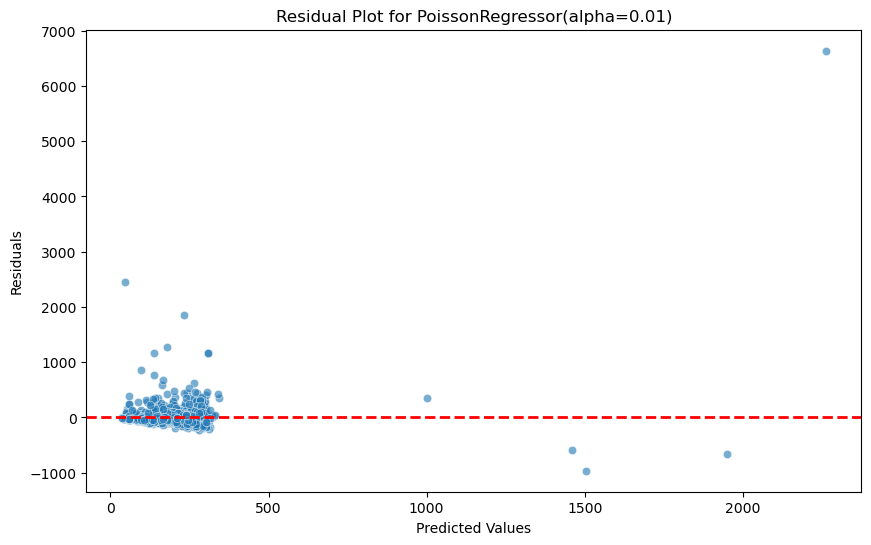

Test MSE: 43523.296492218076
Test R² Score: 0.3440765079045389


In [114]:
plot_residual_chart(gs_poisson_central, X_central_train_scaled_df, X_central_test_scaled_df,y_central_test)

Using KernelExplainer for non-tree-based model.


  0%|          | 0/50 [00:00<?, ?it/s]

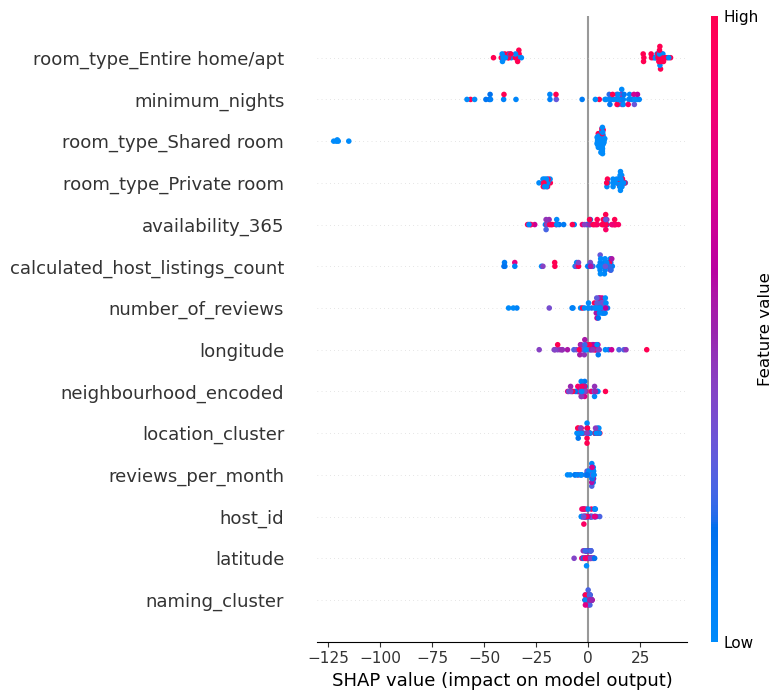

In [115]:
SHAP_plot (X_central_train_scaled_df,X_central_test_scaled_df,gs_poisson_central)

**North Data**

In [116]:
# Train and evaluate model with data with BERT
models, predictions = regressor.fit(X_north_train_scaled_df, X_north_test_scaled_df, y_north_train, y_north_test)

# Display results
display(models)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:01<00:00, 22.38it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 241
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 13
[LightGBM] [Info] Start training from score 111.330935
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
HistGradientBoostingRegressor                0.15       0.35  98.64   
LGBMRegressor                                0.13       0.34  99.52   
PoissonRegressor                            -0.03       0.21 108.49   
AdaBoostRegressor                           -0.06       0.19 110.16   
BayesianRidge                               -0.10       0.16 111.89   
ElasticNetCV                                -0.10       0.16 111.91   
XGBRegressor                                -0.10       0.16 111.93   
RidgeCV                                     -0.10       0.16 112.05   
SGDRegressor                                -0.10       0.16 112.20   
GammaRegressor                              -0.10       0.16 112.27   
ElasticNet                                  -0.11       0.16 112.40   
Lasso                                       -0.11       0.15 112.54   
LassoLars                                   -0.11       0.15 112.54   
Ridge                                       -0.11       0.15 112.55   
LarsCV                                      -0.11       0.15 112.58   
LassoLarsCV                                 -0.11       0.15 112.58   
LassoCV                                     -0.11       0.15 112.58   
RandomForestRegressor                       -0.11       0.15 112.60   
LassoLarsIC                                 -0.11       0.15 112.63   
Lars                                        -0.11       0.15 112.67   
TransformedTargetRegressor                  -0.11       0.15 112.67   
LinearRegression                            -0.11       0.15 112.67   
TweedieRegressor                            -0.12       0.15 113.14   
GradientBoostingRegressor                   -0.12       0.14 113.26   
HuberRegressor                              -0.16       0.12 114.95   
BaggingRegressor                            -0.17       0.10 115.81   
OrthogonalMatchingPursuitCV                 -0.18       0.10 115.91   
PassiveAggressiveRegressor                  -0.18       0.10 116.05   
OrthogonalMatchingPursuit                   -0.20       0.08 117.14   
ExtraTreesRegressor                         -0.23       0.06 118.45   
KNeighborsRegressor                         -0.26       0.04 120.16   
RANSACRegressor                             -0.30       0.01 122.04   
DummyRegressor                              -0.31      -0.00 122.47   
NuSVR                                       -0.32      -0.01 122.97   
LinearSVR                                   -0.37      -0.05 125.28   
SVR                                         -0.48      -0.13 129.95   
GaussianProcessRegressor                    -0.50      -0.14 130.89   
QuantileRegressor                           -0.53      -0.17 132.31   
DecisionTreeRegressor                       -1.08      -0.59 154.24   
MLPRegressor                                -1.09      -0.60 154.66   
KernelRidge                                 -1.26      -0.72 160.63   
ExtraTreeRegressor                          -1.45      -0.86 167.16   

                               Time Taken  
Model                                      
HistGradientBoostingRegressor        0.09  
LGBMRegressor                        0.04  
PoissonRegressor                     0.02  
AdaBoostRegressor                    0.14  
BayesianRidge                        0.01  
ElasticNetCV                         0.07  
XGBRegressor                         0.22  
RidgeCV                              0.01  
SGDRegressor                         0.01  
GammaRegressor                       0.02  
ElasticNet                           0.01  
Lasso                                0.01  
LassoLars                            0.01  
Ridge                                0.01  
LarsCV                               0.02  
LassoLarsCV                          0.03  
LassoCV                              0.09  
RandomForestRegressor                0.19  
LassoLarsIC               

In [117]:
# Define selected models for the North region
selected_models_north = {
    "HistGradientBoosting Regressor": HistGradientBoostingRegressor(random_state=42),
    "LGBM Regressor": LGBMRegressor(random_state=42),
    "GradientBoosting Regressor": GradientBoostingRegressor(random_state=42),
    "RandomForest Regressor": RandomForestRegressor(random_state=42),
    "Poisson Regressor": PoissonRegressor()
}

# Train and evaluate models for the North region
north_results, north_feature_impt, north_ave_feature_impt = train_and_evaluate_regression_models(
    X_north_train_scaled_df, y_north_train, X_north_test_scaled_df, y_north_test, selected_models_north
)


Training HistGradientBoosting Regressor...
Train MSE: 2818.4797, RMSE: 53.0894, MAE: 30.5673, R²: 0.7543
Test MSE: 9729.0451, RMSE: 98.6359, MAE: 54.9491, R²: 0.3507
Extracting Feature Importance for HistGradientBoosting Regressor...

Training LGBM Regressor...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 241
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 13
[LightGBM] [Info] Start training from score 111.330935
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

In [118]:
display(north_results)

Model  Train MSE  Train RMSE  Train MAE  Train R²  \
0  HistGradientBoosting Regressor    2818.48       53.09      30.57      0.75   
1                  LGBM Regressor    3054.65       55.27      32.85      0.73   
2      GradientBoosting Regressor     352.13       18.77      13.25      0.97   
3          RandomForest Regressor    1364.17       36.93      20.50      0.88   
4               Poisson Regressor    7113.65       84.34      50.32      0.38   

   Test MSE  Test RMSE  Test MAE  Test R²  
0   9729.05      98.64     54.95     0.35  
1   9904.24      99.52     53.49     0.34  
2  12827.63     113.26     62.33     0.14  
3  12678.58     112.60     63.22     0.15  
4  11770.67     108.49     64.03     0.21

Grid Searching 

In [119]:
param_grid_north = {
    "HistGradientBoosting Regressor": {
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [2, 5, 10],
        "max_iter": [100, 200, 300]
    },
    "LGBM Regressor": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [-1, 10, 20]
    },
    "GradientBoosting Regressor": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10]
    },
    "RandomForest Regressor": {
        "n_estimators": [50, 100, 200],
        "max_depth": [10, 20, None],
        "min_samples_split": [2, 5, 10]
    },
    
    "Poisson Regressor": {
        "alpha": [0.001, 0.01, 0.1, 1.0],  # Regularization strength
        "max_iter": [100, 200, 500]
    }
}

In [120]:
north_gs_results = optimize_models(selected_models_north, param_grid_north, X_north_train_scaled_df, y_north_train, X_north_test_scaled_df, y_north_test, cv=5)

Training HistGradientBoosting Regressor (Before Grid Search)...
Train MSE: 2818.4797, RMSE: 53.0894, MAE: 30.5673, R²: 0.7543
Test MSE: 9729.0451, RMSE: 98.6359, MAE: 54.9491, R²: 0.3507
Metrics Before Grid Search for HistGradientBoosting Regressor: (2818.4796659396957, 53.08935548619606, 30.567258786351296, 0.7542893180298157, 9729.04505514469, 98.63592172806361, 54.94909785558151, 0.3506774988944993)

Tuning HistGradientBoosting Regressor with Grid Search...
Best Params for HistGradientBoosting Regressor: {'learning_rate': 0.01, 'max_depth': 2, 'max_iter': 100}

Training HistGradientBoosting Regressor (After Grid Search)...
Train MSE: 8358.1789, RMSE: 91.4231, MAE: 55.3283, R²: 0.2713
Test MSE: 12827.5133, RMSE: 113.2586, MAE: 66.4514, R²: 0.1439
Metrics After Grid Search for HistGradientBoosting Regressor: (8358.178931840795, 91.42307658267028, 55.32825223651246, 0.27134693565840706, 12827.513261768248, 113.25861230726893, 66.45137773085678, 0.14388380905987408)

Training LGBM Regre

In [121]:
display(north_gs_results)

Model  Train MSE (Before)  Train RMSE (Before)  \
4               Poisson Regressor             7113.65                84.34   
3          RandomForest Regressor             1364.17                36.93   
0  HistGradientBoosting Regressor             2818.48                53.09   
1                  LGBM Regressor             3054.65                55.27   
2      GradientBoosting Regressor              352.13                18.77   

   Train MAE (Before)  Train R² (Before)  Test MSE (Before)  \
4               50.32               0.38           11770.67   
3               20.50               0.88           12678.58   
0               30.57               0.75            9729.05   
1               32.85               0.73            9904.24   
2               13.25               0.97           12827.63   

   Test RMSE (Before)  Test MAE (Before)  Test R² (Before)  Train MSE (After)  \
4              108.49              64.03              0.21            7125.50   
3              112.60              63.22              0.15            1560.38   
0               98.64              54.95              0.35            8358.18   
1               99.52              53.49              0.34            7982.62   
2              113.26              62.33              0.14            5046.36   

   Train RMSE (After)  Train MAE (After)  Train R² (After)  Test MSE (After)  \
4               84.41              50.43              0.38          11813.92   
3               39.50              20.44              0.86          12575.75   
0               91.42              55.33              0.27          12827.51   
1               89.35              53.53              0.30          12842.47   
2               71.04              47.64              0.56          13773.42   

   Test RMSE (After)  Test MAE (After)  Test R² (After)  
4             108.69             64.37             0.21  
3             112.14             60.39             0.16  
0             113.26             66.45             0.14  
1             113.32             65.68             0.14  
2             117.36             68.81             0.08

In [122]:
display(north_gs_results[['Model','Train R² (Before)','Test R² (Before)','Train R² (After)', 'Test R² (After)']])

Model  Train R² (Before)  Test R² (Before)  \
4               Poisson Regressor               0.38              0.21   
3          RandomForest Regressor               0.88              0.15   
0  HistGradientBoosting Regressor               0.75              0.35   
1                  LGBM Regressor               0.73              0.34   
2      GradientBoosting Regressor               0.97              0.14   

   Train R² (After)  Test R² (After)  
4              0.38             0.21  
3              0.86             0.16  
0              0.27             0.14  
1              0.30             0.14  
2              0.56             0.08

Bayesian Optimisation

In [123]:
# Bayesian Optimisation for light gbm

# Define the objective function for Bayesian Optimization
def rf_cv(n_estimators, max_depth, min_samples_split):
    """
    Bayesian Optimization function for RandomForestRegressor.
    Optimizes 'n_estimators', 'max_depth', and 'min_samples_split'.
    """
    model = RandomForestRegressor(
        n_estimators=int(n_estimators),  # Convert float to int
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        random_state=42,
        n_jobs=-1
    )

    # Perform 5-fold cross-validation (negative MSE since Bayesian Optimization maximizes)
    scores = cross_val_score(model, X_north_train_scaled_df, y_north_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    return np.mean(scores)  # Return mean negative MSE (Bayesian Optimization maximizes this)

# Define the hyperparameter search space
param_bounds = {
    "n_estimators": (50, 300),  # Number of trees
    "max_depth": (5, 50),  # Tree depth
    "min_samples_split": (2, 20)  # Minimum samples required to split a node
}

# Initialize Bayesian Optimization
optimizer = BayesianOptimization(
    f=rf_cv,  # Function to optimize
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

# Perform Bayesian Optimization (5 random points, 20 iterations)
optimizer.maximize(init_points=5, n_iter=20)

# Get the best hyperparameters
best_params = optimizer.max["params"]
best_params["n_estimators"] = int(best_params["n_estimators"])
best_params["max_depth"] = int(best_params["max_depth"])
best_params["min_samples_split"] = int(best_params["min_samples_split"])

print("Best Parameters for RandomForest Regressor:", best_params)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | -9.613e+0 | 21.85     | 19.11     | 233.0     |
| 2         | -9.91e+03 | 31.94     | 4.808     | 89.0      |
| 3         | -9.56e+03 | 7.614     | 17.59     | 200.3     |
| 4         | -9.822e+0 | 36.86     | 2.371     | 292.5     |
| 5         | -9.78e+03 | 42.46     | 5.822     | 95.46     |
| 6         | -9.641e+0 | 17.5      | 7.937     | 212.6     |
| 7         | -9.534e+0 | 7.185     | 16.72     | 200.4     |
| 8         | -9.632e+0 | 7.147     | 7.385     | 198.0     |
| 9         | -9.528e+0 | 6.293     | 11.59     | 208.5     |
| 10        | -9.587e+0 | 7.655     | 18.9      | 218.5     |
| 11        | -9.876e+0 | 6.632     | 5.785     | 225.6     |
| 12        | -9.564e+0 | 5.827     | 17.73     | 208.4     |
| 13        | -9.612e+0 | 23.05     | 19.99     | 216.1     |
| 14        | -9.548e+0 | 38.2      | 17.74     | 227.4     |
| 15    

In [124]:
# Train the best Poisson Regressor with optimized hyperparameters
best_rf = RandomForestRegressor(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_central_train_scaled_df, y_central_train)


rf_bo_metrics = evaluate_regression_model(best_rf, X_central_train_scaled_df, y_central_train, X_central_test_scaled_df, y_central_test)
rf_bo_metrics


Train MSE: 39552.3921, RMSE: 198.8778, MAE: 53.1039, R²: 0.4833
Test MSE: 52089.4350, RMSE: 228.2311, MAE: 66.8461, R²: 0.2150


(39552.3921022407,
 198.87783210363267,
 53.10392900621814,
 0.4833052583540344,
 52089.43504527209,
 228.23110008338497,
 66.84613627605468,
 0.21497940436833574)

manually tuning the hyper parameters

In [126]:
from sklearn.model_selection import cross_validate

# Define the depth range
depth_range = range(1, 20)

# Lists to store results
train_mse = []
test_mse = []
cross_val_train_mse = []
cross_val_test_mse = []

# Convert target variables to NumPy 1D arrays
y_north_train_array = y_north_train.to_numpy().ravel()
y_north_test_array = y_north_test.to_numpy().ravel()

for d in depth_range:
    # Create Random Forest Regressor model with variable max_depth
    rf_reg = RandomForestRegressor(max_depth=d, random_state=42, n_estimators=100, bootstrap=True, n_jobs=-1)
    
    # Fit model on training data
    rf_reg.fit(X_north_train_scaled_df, y_north_train_array)
    
    # Compute MSE for training and test sets
    train_mse.append(mean_squared_error(rf_reg.predict(X_north_train_scaled_df), y_north_train_array))
    test_mse.append(mean_squared_error(rf_reg.predict(X_north_test_scaled_df), y_north_test_array))
    
    # Perform 5-fold cross-validation
    results = cross_validate(rf_reg, X_north_train_scaled_df, y_north_train_array, 
                             scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1)
    
    # Store mean cross-validation scores (convert negative MSE back to positive)
    cross_val_train_mse.append(np.mean(-results['train_score']))
    cross_val_test_mse.append(np.mean(-results['test_score']))

# Store results in DataFrame
mse_results_df = pd.DataFrame({
    'Max Depth': list(depth_range),
    'Train MSE': train_mse,
    'Test MSE': test_mse,
    'Cross Val Train MSE': cross_val_train_mse,
    'Cross Val Test MSE': cross_val_test_mse
})


In [127]:
mse_results_df

Max Depth  Train MSE  Test MSE  Cross Val Train MSE  Cross Val Test MSE
0           1    8612.56  13108.74              8442.55            10222.03
1           2    6767.91  13348.59              6338.66             9585.82
2           3    4758.33  13017.52              4166.93             9671.14
3           4    3075.22  12646.78              2698.83             9776.38
4           5    2059.18  12626.29              1878.78             9849.55
5           6    1591.44  12693.53              1557.42            10025.54
6           7    1459.56  12608.00              1459.01             9889.26
7           8    1404.07  12648.79              1435.00             9991.92
8           9    1379.01  12666.37              1414.04             9979.08
9          10    1386.80  12383.54              1413.37             9939.08
10         11    1374.33  12620.15              1410.56            10029.49
11         12    1377.48  12590.34              1414.89             9973.11
12         13    1365.24  12636.50              1409.88             9966.44
13         14    1357.52  12786.74              1408.46             9979.84
14         15    1362.69  12690.83              1406.54             9992.26
15         16    1364.48  12681.04              1405.86            10000.72
16         17    1364.17  12678.58              1404.79             9982.00
17         18    1364.17  12678.58              1404.74             9982.45
18         19    1364.17  12678.58              1404.74             9982.45

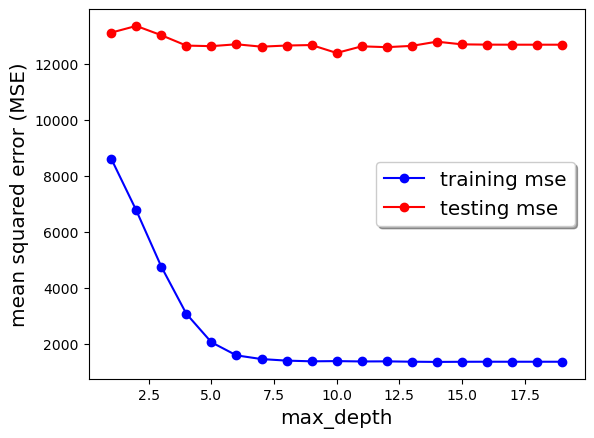

In [128]:
# Plot the simple split measures (train_mse & test_mse) 
plt.plot(depth_range, train_mse, 'bo-', label ='training mse')
plt.plot(depth_range, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [129]:
# Bayesian Optimisation for HistGradient Boosting Regressor 

# Define the objective function for Bayesian Optimization
def histgb_cv(learning_rate, max_depth, max_iter, min_samples_leaf):
    """Bayesian Optimization function for HistGradientBoosting."""
    model = HistGradientBoostingRegressor(
        learning_rate=learning_rate, 
        max_depth=int(max_depth), 
        max_iter=int(max_iter), 
        min_samples_leaf=int(min_samples_leaf),
        random_state=42
    )

    # Perform 5-fold cross-validation (maximize negative MSE)
    scores = cross_val_score(model, X_north_train_scaled_df, y_north_train, cv=5, scoring='neg_mean_squared_error')

    return np.mean(scores)  # Maximizing negative MSE

# Define hyperparameter search space
param_bounds = {
    "learning_rate": (0.01, 0.1),  # Keep learning rate moderate
    "max_depth": (3, 10),  # Control tree depth
    "max_iter": (200, 500),  # Allow enough boosting rounds
    "min_samples_leaf": (1, 10)  # Prevent too much regularization
}

# Run Bayesian Optimization
optimizer = BayesianOptimization(
    f=histgb_cv, 
    pbounds=param_bounds, 
    random_state=42, 
    verbose=2
)

optimizer.maximize(init_points=5, n_iter=15)

# Get best parameters
best_histgb_params = optimizer.max["params"]
best_histgb_params["max_depth"] = int(best_histgb_params["max_depth"])
best_histgb_params["max_iter"] = int(best_histgb_params["max_iter"])
best_histgb_params["min_samples_leaf"] = int(best_histgb_params["min_samples_leaf"])

print("Best Parameters for HistGradientBoosting Regressor:", best_histgb_params)

|   iter    |  target   | learni... | max_depth | max_iter  | min_sa... |
-------------------------------------------------------------------------
| 1         | -1.115e+0 | 0.04371   | 9.655     | 419.6     | 6.388     |
| 2         | -1.035e+0 | 0.02404   | 4.092     | 217.4     | 8.796     |
| 3         | -1.093e+0 | 0.0641    | 7.957     | 206.2     | 9.729     |
| 4         | -1.202e+0 | 0.08492   | 4.486     | 254.5     | 2.651     |
| 5         | -1.195e+0 | 0.03738   | 6.673     | 329.6     | 3.621     |
| 6         | -1.374e+0 | 0.08621   | 9.921     | 221.6     | 1.409     |
| 7         | -1.053e+0 | 0.01443   | 3.129     | 380.2     | 7.514     |
| 8         | -1.054e+0 | 0.0104    | 3.283     | 339.9     | 4.169     |
| 9         | -1.22e+04 | 0.09737   | 7.967     | 498.2     | 4.365     |
| 10        | -1.161e+0 | 0.05244   | 4.123     | 440.6     | 1.869     |
| 11        | -1.116e+0 | 0.09445   | 7.944     | 335.0     | 9.986     |
| 12        | -1.119e+0 | 0.0583    | 

In [130]:
best_histgb = HistGradientBoostingRegressor(
    learning_rate=best_histgb_params["learning_rate"],
    max_depth=best_histgb_params["max_depth"],
    max_iter=best_histgb_params["max_iter"],
    min_samples_leaf=best_histgb_params["min_samples_leaf"],
    random_state=42
)

# Fit the model on training data
best_histgb.fit(X_north_train_scaled_df, y_north_train)

# Evaluate the trained HistGradientBoosting model
histgb_bo_metrics = evaluate_regression_model(
    best_histgb, X_north_train_scaled_df, y_north_train, X_north_test_scaled_df, y_north_test
)

# Display evaluation results
histgb_bo_metrics


Train MSE: 1894.4446, RMSE: 43.5252, MAE: 23.9377, R²: 0.8348
Test MSE: 11422.8610, RMSE: 106.8778, MAE: 57.7304, R²: 0.2376


(1894.4446247314745,
 43.52521826173275,
 23.937677348795777,
 0.8348452584835927,
 11422.861028069525,
 106.87778547513756,
 57.73041338490905,
 0.23763117032698866)

In [131]:

# Define the objective function for Bayesian Optimization
def lgbm_cv(n_estimators, max_depth, learning_rate, min_child_samples):
    """
    Bayesian Optimization function for LGBMRegressor.
    Optimizes 'n_estimators', 'max_depth', 'learning_rate', and 'min_child_samples'.
    """
    model = LGBMRegressor(
        n_estimators=int(n_estimators),  # Convert float to int
        max_depth=int(max_depth),
        learning_rate=learning_rate,
        min_child_samples=int(min_child_samples),
        random_state=42,
        n_jobs=-1
    )

    # Perform 5-fold cross-validation (negative MSE since Bayesian Optimization maximizes)
    scores = cross_val_score(model, X_north_train_scaled_df, y_north_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    return np.mean(scores)  # Return mean negative MSE (Bayesian Optimization maximizes this)

# Define the hyperparameter search space
param_bounds = {
    "n_estimators": (50, 500),  # Number of boosting rounds
    "max_depth": (3, 15),  # Tree depth
    "learning_rate": (0.01, 0.3),  # Learning rate for boosting
    "min_child_samples": (5, 50)  # Minimum samples required in a child node
}

# Initialize Bayesian Optimization
optimizer = BayesianOptimization(
    f=lgbm_cv,  # Function to optimize
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

# Perform Bayesian Optimization (5 random points, 20 iterations)
optimizer.maximize(init_points=5, n_iter=20)

# Get the best hyperparameters
best_params = optimizer.max["params"]
best_params["n_estimators"] = int(best_params["n_estimators"])
best_params["max_depth"] = int(best_params["max_depth"])
best_params["min_child_samples"] = int(best_params["min_child_samples"])

print("Best Parameters for LGBM Regressor:", best_params)

|   iter    |  target   | learni... | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------
| 1         | -1.049e+0 | 0.1186    | 14.41     | 37.94     | 319.4     |
| 2         | -1.105e+0 | 0.05525   | 4.872     | 7.614     | 439.8     |
| 3         | -1.187e+0 | 0.1843    | 11.5      | 5.926     | 486.5     |
| 4         | -1.101e+0 | 0.2514    | 5.548     | 13.18     | 132.5     |
| 5         | -9.258e+0 | 0.09823   | 9.297     | 24.44     | 181.1     |
| 6         | -1.024e+0 | 0.2697    | 14.6      | 24.95     | 194.4     |
| 7         | -9.333e+0 | 0.1139    | 5.193     | 33.57     | 174.6     |
| 8         | -9.532e+0 | 0.2094    | 6.567     | 34.17     | 174.8     |
| 9         | -1.036e+0 | 0.2776    | 3.207     | 20.25     | 172.1     |
| 10        | -1.021e+0 | 0.2917    | 3.633     | 31.14     | 183.6     |
| 11        | -9.412e+0 | 0.158     | 13.66     | 24.41     | 174.7     |
| 12        | -1.011e+0 | 0.1779    | 

In [132]:
# Train the best LGBM Regressor with optimized hyperparameters
best_lgbm_north = LGBMRegressor(
    learning_rate=best_params["learning_rate"],
    max_depth=best_params["max_depth"],
    n_estimators=best_params["n_estimators"],
    min_child_samples=best_params["min_child_samples"],
    random_state=42
)

# Fit the model on training data
best_lgbm_north.fit(X_north_train_scaled_df, y_north_train)

# Evaluate the trained LGBM model
lgbm_bo_metrics = evaluate_regression_model(
    best_lgbm_north, X_north_train_scaled_df, y_north_train, X_north_test_scaled_df, y_north_test
)

# Display evaluation results
lgbm_bo_metrics

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 241
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 13
[LightGBM] [Info] Start training from score 111.330935
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

(3256.4024872443656,
 57.064897154418546,
 32.12093428028879,
 0.716111886284108,
 10727.786151223034,
 103.57502667739475,
 56.993489077814836,
 0.2840208987054076)

**Final Model:**

 Light GBM  outperformed most of the models after fine tuning-> Train R² (0.4939) and Test R² (0.2212) → overfitting is observed but not as severe as compared to other models with similar test results. 

In [133]:
# Save a model in Pickle
pickle.dump(best_lgbm_north, open('north_listings_model.pkl', 'wb'))

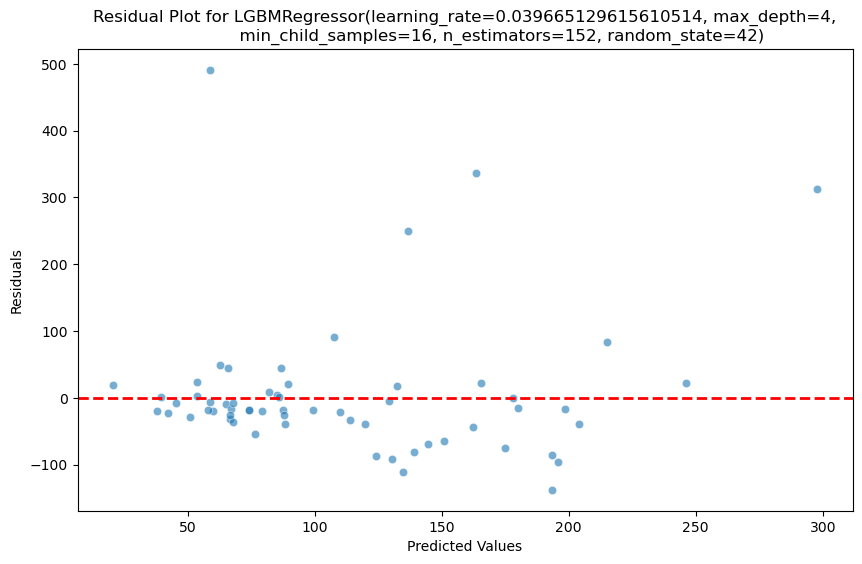

Test MSE: 10727.786151223034
Test R² Score: 0.2840208987054076


In [134]:
plot_residual_chart(best_lgbm_north, X_north_train_scaled_df, X_north_test_scaled_df,y_north_test)

Using TreeExplainer for tree-based model.


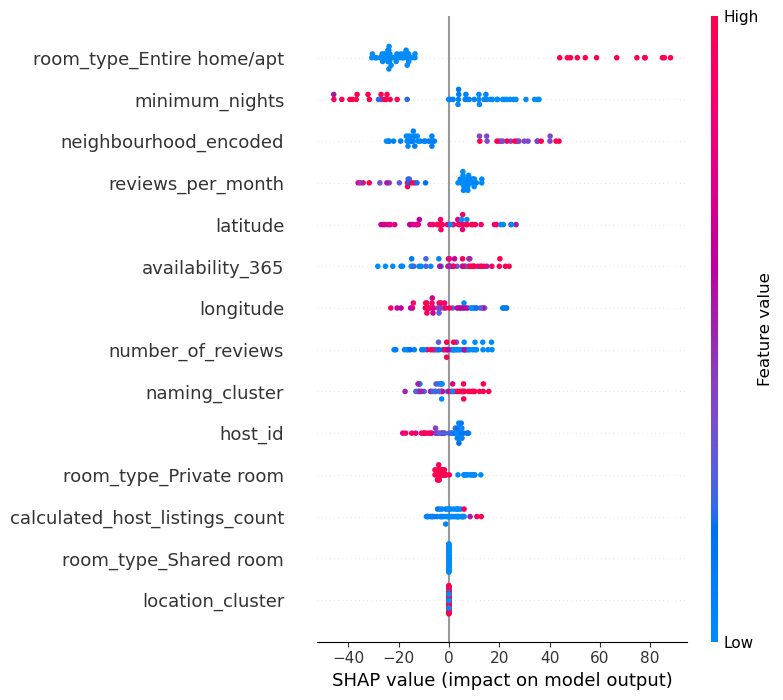

In [135]:
SHAP_plot (X_north_train_scaled_df,X_north_test_scaled_df,best_lgbm_north)

**East Data**

In [136]:
# Train and evaluate model with data using BERT for East region
models, predictions = regressor.fit(X_east_train_scaled_df, X_east_test_scaled_df, y_east_train, y_east_test)

# Display results
display(models)


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:05<00:00,  7.95it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 507
[LightGBM] [Info] Number of data points in the train set: 336, number of used features: 13
[LightGBM] [Info] Start training from score 142.101190
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
PoissonRegressor                            -0.02       0.08  397.44   
AdaBoostRegressor                           -0.02       0.08  397.92   
TransformedTargetRegressor                  -0.05       0.05  403.86   
LinearRegression                            -0.05       0.05  403.86   
Lars                                        -0.05       0.05  403.86   
Ridge                                       -0.05       0.05  403.90   
SGDRegressor                                -0.05       0.05  404.05   
RidgeCV                                     -0.05       0.05  404.25   
Lasso                                       -0.06       0.05  404.56   
LassoLars                                   -0.06       0.05  404.56   
GammaRegressor                              -0.06       0.04  405.84   
ElasticNet                                  -0.07       0.03  407.14   
TweedieRegressor                            -0.08       0.03  408.24   
HuberRegressor                              -0.09       0.02  410.58   
PassiveAggressiveRegressor                  -0.09       0.02  411.10   
RANSACRegressor                             -0.10       0.01  412.17   
OrthogonalMatchingPursuitCV                 -0.10       0.01  412.71   
OrthogonalMatchingPursuit                   -0.10       0.01  412.71   
LassoCV                                     -0.10       0.00  413.46   
ElasticNetCV                                -0.11       0.00  413.94   
BayesianRidge                               -0.11      -0.00  414.52   
LassoLarsIC                                 -0.11      -0.00  414.52   
LassoLarsCV                                 -0.11      -0.00  414.52   
LarsCV                                      -0.11      -0.00  414.52   
DummyRegressor                              -0.11      -0.00  414.52   
LinearSVR                                   -0.11      -0.00  414.76   
NuSVR                                       -0.12      -0.01  416.24   
XGBRegressor                                -0.12      -0.01  416.94   
SVR                                         -0.12      -0.02  417.50   
QuantileRegressor                           -0.13      -0.02  418.52   
BaggingRegressor                            -0.14      -0.03  420.24   
KNeighborsRegressor                         -0.14      -0.03  420.61   
MLPRegressor                                -0.14      -0.03  420.66   
HistGradientBoostingRegressor               -0.15      -0.04  422.43   
LGBMRegressor                               -0.16      -0.05  423.93   
KernelRidge                                 -0.19      -0.07  428.99   
RandomForestRegressor                       -0.19      -0.07  429.14   
ExtraTreesRegressor                         -0.22      -0.10  434.86   
GradientBoostingRegressor                   -0.23      -0.11  436.19   
DecisionTreeRegressor                       -1.12      -0.92  573.94   
ExtraTreeRegressor                          -3.05      -2.65  791.88   
GaussianProcessRegressor                   -15.51     -13.90 1599.67   

                               Time Taken  
Model                                      
PoissonRegressor                     0.05  
AdaBoostRegressor                    0.27  
TransformedTargetRegressor           0.02  
LinearRegression                     0.06  
Lars                                 0.04  
Ridge                                0.03  
SGDRegressor                         0.03  
RidgeCV                              0.03  
Lasso                                0.03  
LassoLars                            0.01  
GammaRegressor                       0.09  
ElasticNet                           0.05  
TweedieRegressor                     0.03  
HuberRegressor                       0.05  
PassiveAggressiveRegressor           0.05  
RANSACRegressor                      0.17  
OrthogonalMatchingPursuitCV          0.04  
OrthogonalMatchingPursuit 

In [137]:
X_east_train_scaled_df

host_id  latitude  longitude  minimum_nights  number_of_reviews  \
2605     0.37      0.66       1.23            1.87              -0.56   
2008    -1.11      0.64       1.52           -0.39              -0.07   
5356    -0.54      1.18       0.12           -0.65              -0.56   
1114    -0.60     -0.47      -1.11           -0.56               4.14   
4       -1.17      0.77       1.49           -0.65               0.80   
...       ...       ...        ...             ...                ...   
4767     0.36     -0.54      -0.89           -0.22              -0.25   
2263     0.43     -0.59       0.64           -0.56              -0.44   
6474     2.42     -0.72       1.56           -0.65              -0.32   
1953    -0.77     -0.90       0.30           -0.56              -0.56   
1355    -0.30     -0.12      -0.95           -0.56              -0.56   

      reviews_per_month  calculated_host_listings_count  availability_365  \
2605              -0.56                           -0.42              1.25   
2008              -0.30                           -0.02             -0.70   
5356              -0.56                           -0.39              1.25   
1114               1.33                           -0.39              1.20   
4                 -0.32                           -0.15              1.19   
...                 ...                             ...               ...   
4767              -0.05                            3.21              1.16   
2263              -0.50                           -0.39             -0.79   
6474               0.42                           -0.39             -0.58   
1953              -0.56                           -0.39              1.25   
1355              -0.56                           -0.42             -1.15   

      location_cluster  naming_cluster  room_type_Entire home/apt  \
2605             -0.46            0.27                       1.79   
2008             -0.46           -1.83                      -0.56   
5356              2.17           -1.83                      -0.56   
1114             -0.46           -0.43                       1.79   
4                -0.46            0.96                      -0.56   
...                ...             ...                        ...   
4767             -0.46            0.27                       1.79   
2263             -0.46           -1.13                      -0.56   
6474             -0.46           -0.43                       1.79   
1953             -0.46           -1.83                      -0.56   
1355             -0.46           -1.83                      -0.56   

      room_type_Private room  room_type_Shared room  neighbourhood_encoded  
2605                   -1.67                  -0.17                  -1.40  
2008                    0.60                  -0.17                  -1.40  
5356                    0.60                  -0.17                  -1.40  
1114                   -1.67                  -0.17                   0.58  
4                       0.60                  -0.17                  -1.40  
...                      ...                    ...                    ...  
4767                   -1.67                  -0.17                   0.58  
2263                    0.60                  -0.17                   0.58  
6474                   -1.67                  -0.17                   0.58  
1953                    0.60                  -0.17                   0.58  
1355                    0.60                  -0.17                   0.58  

[336 rows x 14 columns]

In [138]:
from sklearn.linear_model import SGDRegressor
# Define selected regression models based on provided list
selected_models_east = {
    "Poisson Regressor": PoissonRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Lars": Lars(),
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "SGD Regressor": SGDRegressor()
}

# Train and evaluate models for the North region
east_results, east_feature_impt, east_ave_feature_impt = train_and_evaluate_regression_models(
    X_east_train_scaled_df, y_east_train, X_east_test_scaled_df, y_east_test, selected_models_east
)


Training Poisson Regressor...
Train MSE: 103510.2782, RMSE: 321.7301, MAE: 95.2752, R²: 0.0259
Test MSE: 157958.6854, RMSE: 397.4402, MAE: 108.3821, R²: 0.0801
Extracting Feature Importance for Poisson Regressor...

Training AdaBoost Regressor...
Train MSE: 12853.5696, RMSE: 113.3736, MAE: 88.4536, R²: 0.8790
Test MSE: 162563.9327, RMSE: 403.1922, MAE: 121.3570, R²: 0.0533
Extracting Feature Importance for AdaBoost Regressor...

Training Lars...
Train MSE: 103660.9566, RMSE: 321.9642, MAE: 96.1664, R²: 0.0245
Test MSE: 163101.0248, RMSE: 403.8577, MAE: 110.2513, R²: 0.0502
Extracting Feature Importance for Lars...

Training Linear Regression...
Train MSE: 103660.9566, RMSE: 321.9642, MAE: 96.1664, R²: 0.0245
Test MSE: 163101.0248, RMSE: 403.8577, MAE: 110.2513, R²: 0.0502
Extracting Feature Importance for Linear Regression...

Training Ridge...
Train MSE: 103661.3544, RMSE: 321.9648, MAE: 96.0536, R²: 0.0245
Test MSE: 163135.3951, RMSE: 403.9002, MAE: 109.9582, R²: 0.0500
Extracting F

Grid Search

In [139]:
param_grid_east = {
    "Poisson Regressor": {
        "alpha": [0.001, 0.01, 0.1, 1.0],  # Regularization strength
        "max_iter": [100, 200, 500]
    },
    "AdaBoost Regressor": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.5, 1.0]
    },
    "Lars": {
        "n_nonzero_coefs": [500, 1000, 1500]
    },
    "Linear Regression": {},  # No hyperparameters to tune for Linear Regression
    "Transformed Target Regressor": {},  # No hyperparameters to tune
    "Ridge": {
        "alpha": [0.001, 0.01, 0.1, 1.0, 10.0]
    },
    "SGD Regressor": {
        "alpha": [0.0001, 0.001, 0.01],
        "penalty": ["l2", "l1", "elasticnet"],
        "max_iter": [1000, 5000]
    }
}


In [140]:
East_gs_results = optimize_models(selected_models_east, param_grid_east, X_east_train_scaled_df, y_east_train, X_east_test_scaled_df, y_east_test, cv=5)

Training Poisson Regressor (Before Grid Search)...
Train MSE: 103510.2782, RMSE: 321.7301, MAE: 95.2752, R²: 0.0259
Test MSE: 157958.6854, RMSE: 397.4402, MAE: 108.3821, R²: 0.0801
Metrics Before Grid Search for Poisson Regressor: (103510.278162305, 321.73013250596375, 95.27518415021439, 0.025938535656086503, 157958.6854384871, 397.44016585957576, 108.38207791302742, 0.080107883771241)

Tuning Poisson Regressor with Grid Search...
Best Params for Poisson Regressor: {'alpha': 0.001, 'max_iter': 100}

Training Poisson Regressor (After Grid Search)...
Train MSE: 103510.1234, RMSE: 321.7299, MAE: 95.5253, R²: 0.0259
Test MSE: 157657.6597, RMSE: 397.0613, MAE: 108.9020, R²: 0.0819
Metrics After Grid Search for Poisson Regressor: (103510.12339280338, 321.72989197897573, 95.52532421472799, 0.025939992081574603, 157657.6597462954, 397.06127958577804, 108.90202783505484, 0.08186094445455039)

Training AdaBoost Regressor (Before Grid Search)...
Train MSE: 11877.8616, RMSE: 108.9856, MAE: 79.7928

In [141]:
East_gs_results

Model  Train MSE (Before)  Train RMSE (Before)  \
0   Poisson Regressor           103510.28               321.73   
2                Lars           103660.96               321.96   
3   Linear Regression           103660.96               321.96   
4               Ridge           103661.35               321.96   
5       SGD Regressor           103674.18               321.98   
1  AdaBoost Regressor            11877.86               108.99   

   Train MAE (Before)  Train R² (Before)  Test MSE (Before)  \
0               95.28               0.03          157958.69   
2               96.17               0.02          163101.02   
3               96.17               0.02          163101.02   
4               96.05               0.02          163135.40   
5               95.65               0.02          163199.97   
1               79.79               0.89          157323.27   

   Test RMSE (Before)  Test MAE (Before)  Test R² (Before)  Train MSE (After)  \
0              397.44             108.38              0.08          103510.12   
2              403.86             110.25              0.05          103660.96   
3              403.86             110.25              0.05          103660.96   
4              403.90             109.96              0.05          103660.96   
5              403.98             108.74              0.05          103674.86   
1              396.64             114.64              0.08           57859.21   

   Train RMSE (After)  Train MAE (After)  Train R² (After)  Test MSE (After)  \
0              321.73              95.53              0.03         157657.66   
2              321.96              96.17              0.02         163101.02   
3              321.96              96.17              0.02         163101.02   
4              321.96              96.17              0.02         163101.06   
5              321.99              96.77              0.02         163230.58   
1              240.54              65.67              0.46         167805.53   

   Test RMSE (After)  Test MAE (After)  Test R² (After)  
0             397.06            108.90             0.08  
2             403.86            110.25             0.05  
3             403.86            110.25             0.05  
4             403.86            110.25             0.05  
5             404.02            109.90             0.05  
1             409.64             85.60             0.02

In [142]:
display(East_gs_results[['Model','Train R² (Before)','Test R² (Before)','Train R² (After)', 'Test R² (After)']])

Model  Train R² (Before)  Test R² (Before)  Train R² (After)  \
0   Poisson Regressor               0.03              0.08              0.03   
2                Lars               0.02              0.05              0.02   
3   Linear Regression               0.02              0.05              0.02   
4               Ridge               0.02              0.05              0.02   
5       SGD Regressor               0.02              0.05              0.02   
1  AdaBoost Regressor               0.89              0.08              0.46   

   Test R² (After)  
0             0.08  
2             0.05  
3             0.05  
4             0.05  
5             0.05  
1             0.02

In [143]:
# Bayesian Optimisation for Poisson Regressor 

# Define the objective function for Bayesian Optimization
def poisson_cv(alpha, max_iter):
    """
    Bayesian Optimization function for Poisson Regressor.
    Optimizes 'alpha' (L2 penalty) and 'max_iter' (number of iterations).
    """
    model = PoissonRegressor(
        alpha=alpha,  # Regularization strength
        max_iter=int(max_iter),  # Convert float to int
        tol=1e-4
    )

    # Perform 5-fold cross-validation (negative MSE as we maximize)
    scores = cross_val_score(model, X_east_train_scaled_df, y_east_train, cv=5, scoring='neg_mean_squared_error')

    return np.mean(scores)  # Return mean negative MSE (Bayesian Optimization maximizes this)

# Define the hyperparameter search space
param_bounds = {
    "alpha": (0.001, 1.0),  # Regularization strength range
    "max_iter": (50, 500)  # Maximum number of iterations
}

# Initialize Bayesian Optimization
optimizer = BayesianOptimization(
    f=poisson_cv,  # Function to optimize
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

# Perform Bayesian Optimization (5 random points, 15 iterations)
optimizer.maximize(init_points=5, n_iter=20)

# Get the best hyperparameters
best_params = optimizer.max["params"]
best_params["max_iter"] = int(best_params["max_iter"])  # Ensure integer value

print("Best Parameters for Poisson Regressor:", best_params)

|   iter    |  target   |   alpha   | max_iter  |
-------------------------------------------------
| 1         | -1.147e+0 | 0.3752    | 477.8     |
| 2         | -1.146e+0 | 0.7323    | 319.4     |
| 3         | -1.147e+0 | 0.1569    | 120.2     |
| 4         | -1.148e+0 | 0.05903   | 439.8     |
| 5         | -1.146e+0 | 0.6015    | 368.6     |
| 6         | -1.147e+0 | 0.4096    | 285.8     |
| 7         | -1.148e+0 | 0.04982   | 318.6     |
| 8         | -1.146e+0 | 0.6285    | 368.7     |
| 9         | -1.147e+0 | 0.5171    | 319.9     |
| 10        | -1.146e+0 | 0.694     | 369.2     |
| 11        | -1.148e+0 | 0.01807   | 369.7     |
| 12        | -1.145e+0 | 0.9941    | 319.7     |
| 13        | -1.145e+0 | 0.9702    | 320.3     |
| 14        | -1.146e+0 | 0.9358    | 321.3     |
| 15        | -1.147e+0 | 0.4223    | 322.1     |
| 16        | -1.147e+0 | 0.3349    | 321.0     |
| 17        | -1.146e+0 | 0.7152    | 352.3     |
| 18        | -1.146e+0 | 0.5629    | 353.2     |


In [144]:
# Train the best Poisson Regressor with optimized hyperparameters
best_poisson = PoissonRegressor(alpha=best_params["alpha"], max_iter=best_params["max_iter"], tol=1e-4)

best_poisson.fit(X_east_train_scaled_df, y_east_train)


poisson_bo_metrics = evaluate_regression_model(best_poisson, X_east_train_scaled_df, y_east_train, X_east_test_scaled_df, y_east_test)
poisson_bo_metrics
# grid search produced a better result.......

Train MSE: 103510.2629, RMSE: 321.7301, MAE: 95.2765, R²: 0.0259
Test MSE: 157957.0050, RMSE: 397.4381, MAE: 108.3849, R²: 0.0801


(103510.26288082816,
 321.7301087570577,
 95.27649121832376,
 0.025938679459175162,
 157957.00500808388,
 397.43805178679594,
 108.38493279978661,
 0.080117669967394)

In [145]:
# Train the Poisson Regressor with optimized hyperparameters with grid search
gs_poisson_east = PoissonRegressor(alpha = 0.001, max_iter =100)

gs_poisson_east.fit(X_east_train_scaled_df, y_east_train)


poisson_gs_metrics = evaluate_regression_model(gs_poisson_east, X_east_train_scaled_df, y_east_train, X_east_test_scaled_df, y_east_test)
poisson_gs_metrics

Train MSE: 103510.1234, RMSE: 321.7299, MAE: 95.5253, R²: 0.0259
Test MSE: 157657.6597, RMSE: 397.0613, MAE: 108.9020, R²: 0.0819


(103510.12339280338,
 321.72989197897573,
 95.52532421472799,
 0.025939992081574603,
 157657.6597462954,
 397.06127958577804,
 108.90202783505484,
 0.08186094445455039)

**Final Model**

In [146]:
# Save a model in Pickle
pickle.dump(gs_poisson_east, open('East_listings_model.pkl', 'wb'))

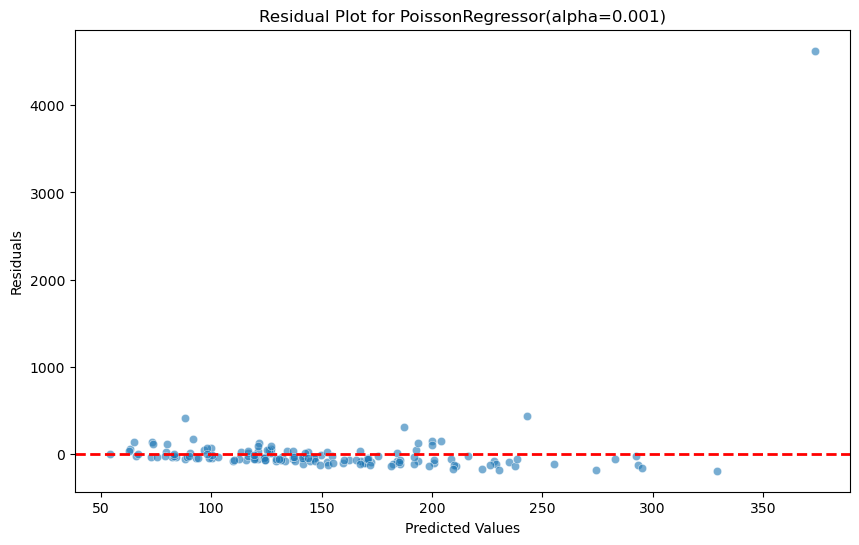

Test MSE: 157657.6597462954
Test R² Score: 0.08186094445455039


In [147]:
plot_residual_chart(gs_poisson_east, X_east_train_scaled_df, X_east_test_scaled_df,y_east_test)

Using KernelExplainer for non-tree-based model.


  0%|          | 0/50 [00:00<?, ?it/s]

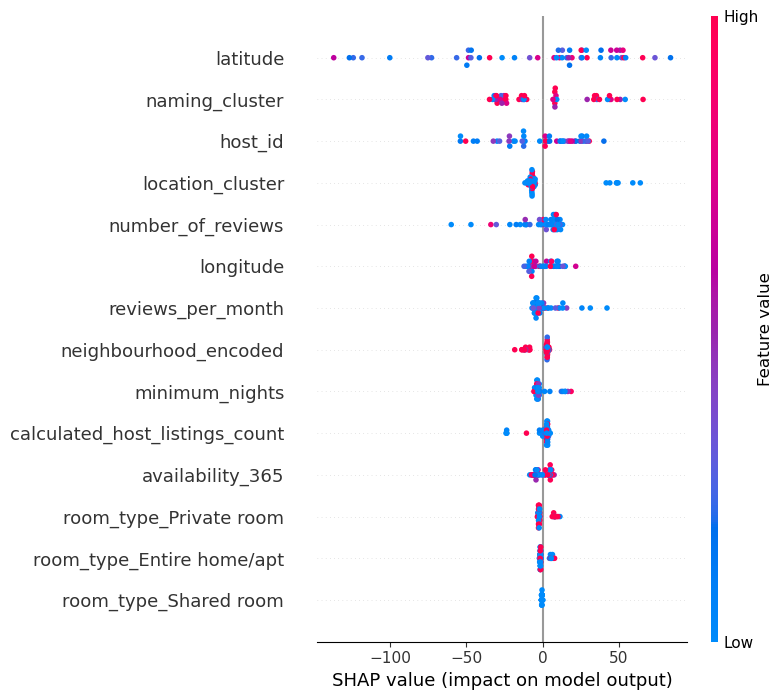

In [148]:
SHAP_plot (X_east_train_scaled_df,X_east_test_scaled_df,gs_poisson_east)

**North East Data**

In [149]:
# Train and evaluate model with data using BERT for North-East region
models, predictions = regressor.fit(X_north_east_train_scaled_df, X_north_east_test_scaled_df, y_north_east_train, y_north_east_test)

# Display results
display(models)


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:02<00:00, 17.20it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 380
[LightGBM] [Info] Number of data points in the train set: 233, number of used features: 13
[LightGBM] [Info] Start training from score 110.004292
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
HuberRegressor                               0.21       0.32  52.78   
PassiveAggressiveRegressor                   0.17       0.29  54.11   
GammaRegressor                               0.06       0.20  57.45   
LinearSVR                                    0.06       0.19  57.68   
OrthogonalMatchingPursuitCV                  0.01       0.15  59.11   
OrthogonalMatchingPursuit                    0.01       0.15  59.11   
PoissonRegressor                             0.01       0.14  59.24   
LassoCV                                      0.00       0.14  59.30   
LarsCV                                       0.00       0.14  59.34   
LassoLarsCV                                  0.00       0.14  59.34   
LassoLarsIC                                 -0.00       0.14  59.48   
ElasticNet                                  -0.03       0.12  60.24   
ElasticNetCV                                -0.03       0.11  60.27   
BayesianRidge                               -0.03       0.11  60.42   
TweedieRegressor                            -0.04       0.11  60.46   
NuSVR                                       -0.09       0.06  61.98   
Lasso                                       -0.10       0.05  62.38   
LassoLars                                   -0.10       0.05  62.38   
RANSACRegressor                             -0.11       0.05  62.54   
SVR                                         -0.12       0.04  62.88   
RidgeCV                                     -0.12       0.03  62.92   
Ridge                                       -0.15       0.01  63.66   
SGDRegressor                                -0.15       0.01  63.75   
Lars                                        -0.15       0.01  63.75   
LinearRegression                            -0.15       0.01  63.75   
TransformedTargetRegressor                  -0.15       0.01  63.75   
QuantileRegressor                           -0.21      -0.04  65.28   
MLPRegressor                                -0.35      -0.16  69.13   
DummyRegressor                              -0.41      -0.21  70.49   
RandomForestRegressor                       -0.75      -0.51  78.59   
KNeighborsRegressor                         -0.94      -0.67  82.68   
GradientBoostingRegressor                   -1.00      -0.72  84.05   
AdaBoostRegressor                           -1.04      -0.76  84.88   
GaussianProcessRegressor                    -1.09      -0.80  85.84   
LGBMRegressor                               -1.10      -0.81  86.10   
ExtraTreesRegressor                         -1.23      -0.92  88.80   
HistGradientBoostingRegressor               -1.41      -1.08  92.27   
BaggingRegressor                            -1.45      -1.11  93.07   
DecisionTreeRegressor                       -1.64      -1.27  96.44   
XGBRegressor                                -1.74      -1.36  98.40   
KernelRidge                                 -2.08      -1.65 104.25   
ExtraTreeRegressor                          -7.44      -6.26 172.55   

                               Time Taken  
Model                                      
HuberRegressor                       0.03  
PassiveAggressiveRegressor           0.02  
GammaRegressor                       0.02  
LinearSVR                            0.01  
OrthogonalMatchingPursuitCV          0.03  
OrthogonalMatchingPursuit            0.02  
PoissonRegressor                     0.01  
LassoCV                              0.06  
LarsCV                               0.02  
LassoLarsCV                          0.02  
LassoLarsIC                          0.01  
ElasticNet                           0.01  
ElasticNetCV                         0.08  
BayesianRidge                        0.01  
TweedieRegressor                     0.02  
NuSVR                                0.03  
Lasso                                0.01  
LassoLars                            0.01  
RANSACRegressor           

In [150]:

selected_models_north_east = {
    "Huber Regressor": HuberRegressor(),
    "PassiveAggressive Regressor": PassiveAggressiveRegressor(),
    "Gamma Regressor": GammaRegressor(),
    "LinearSVR": LinearSVR(),
    "Poisson Regressor": PoissonRegressor(),
    "OrthogonalMatchingPursuitCV": OrthogonalMatchingPursuitCV()
}

# Train and evaluate models for the North region
north_east_results, north_east_feature_impt, north_east_ave_feature_impt = train_and_evaluate_regression_models(
    X_north_east_train_scaled_df, y_north_east_train, X_north_east_test_scaled_df, y_north_east_test, selected_models_north_east
)



Training Huber Regressor...
Train MSE: 31129.3511, RMSE: 176.4351, MAE: 54.7850, R²: 0.0487
Test MSE: 2785.9179, RMSE: 52.7818, MAE: 30.4796, R²: 0.3210
Extracting Feature Importance for Huber Regressor...

Training PassiveAggressive Regressor...
Train MSE: 31766.0945, RMSE: 178.2305, MAE: 56.0547, R²: 0.0292
Test MSE: 2908.1062, RMSE: 53.9269, MAE: 29.8405, R²: 0.2912
Extracting Feature Importance for PassiveAggressive Regressor...

Training Gamma Regressor...
Train MSE: 29798.1269, RMSE: 172.6213, MAE: 63.4212, R²: 0.0894
Test MSE: 3300.4485, RMSE: 57.4495, MAE: 42.5149, R²: 0.1956
Extracting Feature Importance for Gamma Regressor...

Training LinearSVR...
Train MSE: 32880.9501, RMSE: 181.3311, MAE: 56.3100, R²: -0.0049
Test MSE: 3326.5584, RMSE: 57.6763, MAE: 28.9413, R²: 0.1892
Extracting Feature Importance for LinearSVR...

Training Poisson Regressor...
Train MSE: 27830.2117, RMSE: 166.8239, MAE: 64.3785, R²: 0.1495
Test MSE: 3509.6074, RMSE: 59.2419, MAE: 43.3036, R²: 0.1446
Ext

In [151]:
north_east_results

Model  Train MSE  Train RMSE  Train MAE  Train R²  \
0              Huber Regressor   31129.35      176.44      54.79      0.05   
1  PassiveAggressive Regressor   31766.09      178.23      56.05      0.03   
2              Gamma Regressor   29798.13      172.62      63.42      0.09   
3                    LinearSVR   32880.95      181.33      56.31     -0.00   
4            Poisson Regressor   27830.21      166.82      64.38      0.15   
5  OrthogonalMatchingPursuitCV   30512.16      174.68      68.87      0.07   

   Test MSE  Test RMSE  Test MAE  Test R²  
0   2785.92      52.78     30.48     0.32  
1   2908.11      53.93     29.84     0.29  
2   3300.45      57.45     42.51     0.20  
3   3326.56      57.68     28.94     0.19  
4   3509.61      59.24     43.30     0.14  
5   3494.02      59.11     44.28     0.15

In [152]:
#Grid searching 

param_grid_north_east = {
    "Huber Regressor": {
        'epsilon': [1.1, 1.2, 1.3],
        'alpha': [0.0001, 0.001, 0.01]
    },
    "PassiveAggressive Regressor": {
        'C': [0.001, 0.01, 0.1, 1],
        'max_iter': [500, 1000, 2000]
    },
    "Gamma Regressor": {
        'alpha': [0.0001, 0.001, 0.01, 0.1]
    },
    "LinearSVR": {
        'C': [0.1, 1, 10],
        'max_iter': [1000, 5000, 10000]
    },
    "Poisson Regressor": {
        'alpha': [0.0001, 0.001, 0.01, 0.1]
    },
    "OrthogonalMatchingPursuitCV": {
        'cv': [3, 5, 10]
    }
}
north_east_gs_results = optimize_models(selected_models_north_east, param_grid_north_east, X_north_east_train_scaled_df, y_north_east_train, X_north_east_test_scaled_df, y_north_east_test, cv=5)

Training Huber Regressor (Before Grid Search)...
Train MSE: 31129.3511, RMSE: 176.4351, MAE: 54.7850, R²: 0.0487
Test MSE: 2785.9179, RMSE: 52.7818, MAE: 30.4796, R²: 0.3210
Metrics Before Grid Search for Huber Regressor: (31129.351053388356, 176.4351185376323, 54.785028306769696, 0.04867124101203768, 2785.917905907606, 52.78179521300508, 30.47963463390774, 0.32097767430601243)

Tuning Huber Regressor with Grid Search...
Best Params for Huber Regressor: {'alpha': 0.0001, 'epsilon': 1.1}

Training Huber Regressor (After Grid Search)...
Train MSE: 31457.1025, RMSE: 177.3615, MAE: 54.4338, R²: 0.0387
Test MSE: 2876.2949, RMSE: 53.6311, MAE: 30.2216, R²: 0.2989
Metrics After Grid Search for Huber Regressor: (31457.10248256635, 177.36150225617268, 54.43379888086226, 0.03865499107988579, 2876.294861825261, 53.63109976333938, 30.2216336818059, 0.29894975644590005)

Training PassiveAggressive Regressor (Before Grid Search)...
Train MSE: 31055.0892, RMSE: 176.2245, MAE: 56.5134, R²: 0.0509
Test

In [153]:
display(north_east_gs_results[['Model','Train R² (Before)','Test R² (Before)','Train R² (After)', 'Test R² (After)']])

Model  Train R² (Before)  Test R² (Before)  \
0              Huber Regressor               0.05              0.32   
2              Gamma Regressor               0.09              0.20   
1  PassiveAggressive Regressor               0.05              0.29   
5  OrthogonalMatchingPursuitCV               0.07              0.15   
4            Poisson Regressor               0.15              0.14   
3                    LinearSVR              -0.00              0.19   

   Train R² (After)  Test R² (After)  
0              0.04             0.30  
2              0.12             0.23  
1             -0.01             0.18  
5              0.07             0.15  
4              0.15             0.14  
3             -0.23            -0.80

In [154]:
from skopt import BayesSearchCV
# Define Bayesian optimization parameter grids
bayes_search_params = {
    "Huber Regressor": {
        'epsilon': (1.0, 1.5),
        'alpha': (1e-5, 1e-1, 'log-uniform')
    },
    "Gamma Regressor": {
        'alpha': (1e-5, 1e-1, 'log-uniform')
    }
}

# Models
models = {
    "Huber Regressor": HuberRegressor(),
    "Gamma Regressor": GammaRegressor()
}

# Dictionary to store best estimators
best_bayes_estimators = {}
results = []

# Perform Bayesian Optimization for each model
for model_name, model in models.items():
    bayes_search = BayesSearchCV(
        model, 
        bayes_search_params[model_name], 
        scoring='neg_mean_squared_error', 
        cv=5, 
        n_iter=30, 
        n_jobs=-1, 
        random_state=42
    )
    bayes_search.fit(X_north_east_train_scaled_df, y_north_east_train)
    best_model = bayes_search.best_estimator_
    best_bayes_estimators[model_name] = best_model

    # Model evaluation on train set
    y_train_pred = best_model.predict(X_north_east_train_scaled_df)
    train_mse = mean_squared_error(y_north_east_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_north_east_train, y_train_pred)
    train_r2 = r2_score(y_north_east_train, y_train_pred)

    # Model evaluation on test set
    y_test_pred = best_model.predict(X_north_east_test_scaled_df)
    test_mse = mean_squared_error(y_north_east_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_north_east_test, y_test_pred)
    test_r2 = r2_score(y_north_east_test, y_test_pred)

    # Store results
    results.append([
        model_name, train_mse, train_rmse, train_mae, train_r2,
        test_mse, test_rmse, test_mae, test_r2
    ])


In [155]:
# Convert results to DataFrame
bo_north_east_results_df = pd.DataFrame(results, columns=[
    "Model", "Train MSE", "Train RMSE", "Train MAE", "Train R²",
    "Test MSE", "Test RMSE", "Test MAE", "Test R²"
])
display(bo_north_east_results_df)

Model  Train MSE  Train RMSE  Train MAE  Train R²  Test MSE  \
0  Huber Regressor   31044.76      176.20      54.96      0.05   2768.16   
1  Gamma Regressor   28836.61      169.81      61.03      0.12   3103.11   

   Test RMSE  Test MAE  Test R²  
0      52.61     30.54     0.33  
1      55.71     41.33     0.24

**Final Model**

In [156]:
best_bayes_estimators

{'Huber Regressor': HuberRegressor(alpha=0.1, epsilon=1.5),
 'Gamma Regressor': GammaRegressor(alpha=0.1)}

In [157]:
best_huber_ne = HuberRegressor(alpha=0.1, epsilon=1.5)

# Fit the model on training data
best_huber_ne.fit(X_north_east_train_scaled_df, y_north_east_train)

# Evaluate the trained LGBM model
huber_bo_metrics = evaluate_regression_model(
    best_huber_ne, X_north_east_train_scaled_df, y_north_east_train, X_north_east_test_scaled_df, y_north_east_test
)

# Display evaluation results
huber_bo_metrics

Train MSE: 31044.7569, RMSE: 176.1952, MAE: 54.9643, R²: 0.0513
Test MSE: 2768.1580, RMSE: 52.6133, MAE: 30.5369, R²: 0.3253


(31044.75689074408,
 176.19522380230424,
 54.96426994945877,
 0.05125648153401274,
 2768.157981499616,
 52.61328711931632,
 30.536893188722626,
 0.32530636796568213)

In [158]:
# Save a model in Pickle
pickle.dump(best_huber_ne, open('north_east_listings_model.pkl', 'wb'))

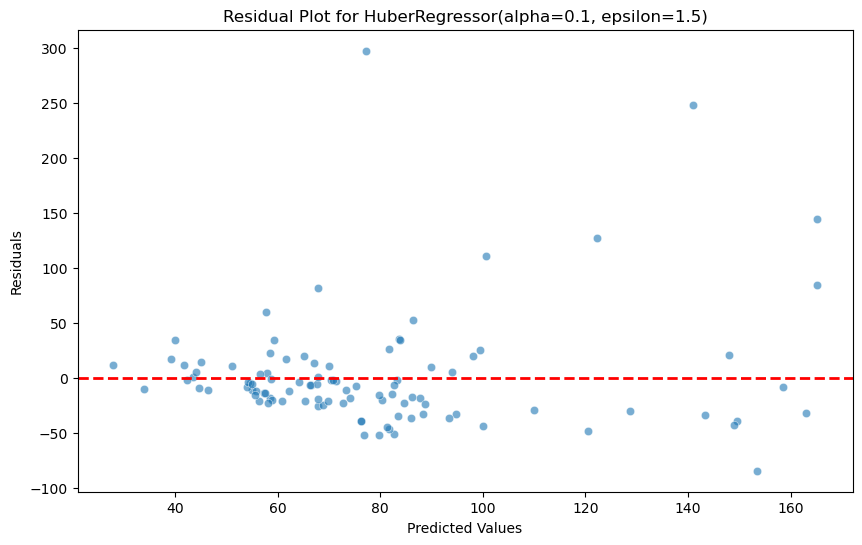

Test MSE: 2768.157981499616
Test R² Score: 0.32530636796568213


In [159]:
plot_residual_chart(best_huber_ne, X_north_east_train_scaled_df, X_north_east_test_scaled_df,y_north_east_test)

Using KernelExplainer for non-tree-based model.


  0%|          | 0/50 [00:00<?, ?it/s]

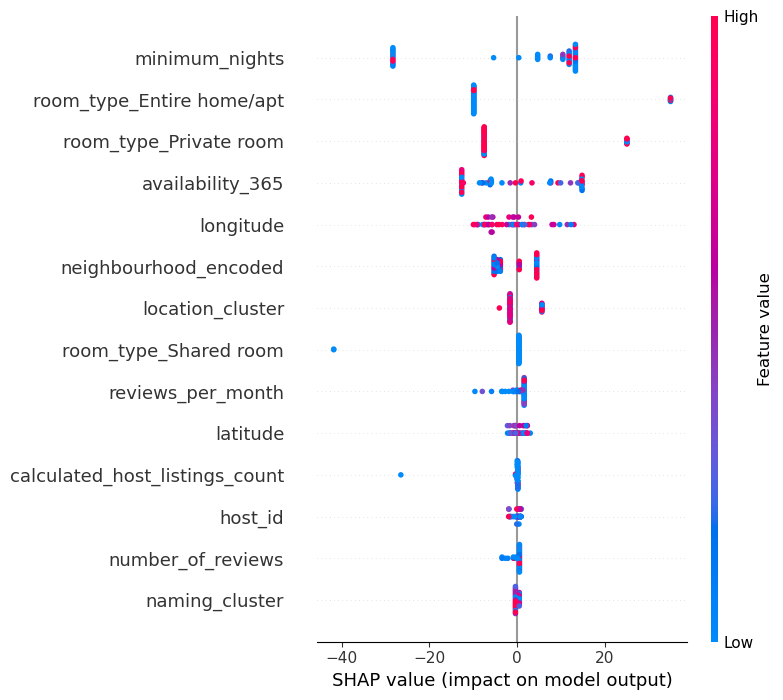

In [160]:
SHAP_plot (X_north_east_train_scaled_df,X_north_east_test_scaled_df,best_huber_ne)

**West Data**

In [161]:
# Train and evaluate model with data using BERT for West region
models, predictions = regressor.fit(X_west_train_scaled_df, X_west_test_scaled_df, y_west_train, y_west_test)

# Display results
display(models)


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:03<00:00, 10.96it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 376, number of used features: 13
[LightGBM] [Info] Start training from score 186.026596
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
PassiveAggressiveRegressor                  -0.07       0.03 541.31   
GammaRegressor                              -0.07       0.02 542.78   
HuberRegressor                              -0.07       0.02 542.96   
LinearSVR                                   -0.08       0.02 543.98   
AdaBoostRegressor                           -0.08       0.01 545.71   
TweedieRegressor                            -0.09       0.01 546.88   
PoissonRegressor                            -0.09       0.00 547.57   
RANSACRegressor                             -0.10      -0.00 548.59   
ElasticNetCV                                -0.10      -0.00 549.06   
ElasticNet                                  -0.10      -0.00 549.18   
DummyRegressor                              -0.10      -0.00 549.51   
NuSVR                                       -0.10      -0.00 549.70   
SVR                                         -0.10      -0.01 550.90   
QuantileRegressor                           -0.12      -0.02 555.12   
MLPRegressor                                -0.12      -0.03 555.46   
BayesianRidge                               -0.12      -0.03 555.75   
LarsCV                                      -0.13      -0.03 556.54   
LassoCV                                     -0.13      -0.03 556.63   
LassoLarsCV                                 -0.13      -0.03 556.72   
Lasso                                       -0.13      -0.03 557.19   
LassoLars                                   -0.13      -0.03 557.19   
Ridge                                       -0.13      -0.03 557.27   
SGDRegressor                                -0.13      -0.03 557.29   
RidgeCV                                     -0.13      -0.03 557.35   
TransformedTargetRegressor                  -0.13      -0.03 557.36   
LinearRegression                            -0.13      -0.03 557.36   
Lars                                        -0.13      -0.03 557.36   
LassoLarsIC                                 -0.14      -0.04 558.59   
OrthogonalMatchingPursuit                   -0.14      -0.04 559.89   
OrthogonalMatchingPursuitCV                 -0.14      -0.04 559.89   
ExtraTreesRegressor                         -0.22      -0.11 578.05   
LGBMRegressor                               -0.24      -0.14 584.86   
KNeighborsRegressor                         -0.25      -0.14 585.47   
KernelRidge                                 -0.26      -0.15 587.95   
HistGradientBoostingRegressor               -0.29      -0.17 594.57   
GaussianProcessRegressor                    -0.35      -0.23 609.41   
RandomForestRegressor                       -0.91      -0.75 725.22   
BaggingRegressor                            -1.18      -0.99 774.61   
ExtraTreeRegressor                          -1.23      -1.03 781.93   
DecisionTreeRegressor                       -2.11      -1.84 924.68   
GradientBoostingRegressor                   -2.15      -1.88 930.89   
XGBRegressor                                -2.25      -1.97 945.51   

                               Time Taken  
Model                                      
PassiveAggressiveRegressor           0.01  
GammaRegressor                       0.03  
HuberRegressor                       0.03  
LinearSVR                            0.02  
AdaBoostRegressor                    0.28  
TweedieRegressor                     0.02  
PoissonRegressor                     0.03  
RANSACRegressor                      0.10  
ElasticNetCV                         0.10  
ElasticNet                           0.03  
DummyRegressor                       0.04  
NuSVR                                0.02  
SVR                                  0.04  
QuantileRegressor                    0.03  
MLPRegressor                         0.96  
BayesianRidge                        0.03  
LarsCV                               0.04  
LassoCV                              0.11  
LassoLarsCV               

In [162]:
selected_models_west = {
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
    "PassiveAggressive Regressor": PassiveAggressiveRegressor(),
    "Huber Regressor": HuberRegressor(),
    "Gamma Regressor": GammaRegressor(),
    "LinearSVR": LinearSVR()
}


west_results, west_feature_impt, west_ave_feature_impt  = train_and_evaluate_regression_models(X_west_train_scaled_df, y_west_train, X_west_test_scaled_df, y_west_test,selected_models_west)


Training AdaBoost Regressor...
Train MSE: 10905.9915, RMSE: 104.4318, MAE: 58.9250, R²: 0.9834
Test MSE: 297801.0598, RMSE: 545.7115, MAE: 100.6353, R²: 0.0104
Extracting Feature Importance for AdaBoost Regressor...

Training PassiveAggressive Regressor...
Train MSE: 542556.5036, RMSE: 736.5843, MAE: 112.5555, R²: 0.1719
Test MSE: 293939.0724, RMSE: 542.1615, MAE: 89.6442, R²: 0.0232
Extracting Feature Importance for PassiveAggressive Regressor...

Training Huber Regressor...
Train MSE: 472256.3728, RMSE: 687.2091, MAE: 112.3147, R²: 0.2792
Test MSE: 294807.5758, RMSE: 542.9619, MAE: 96.5347, R²: 0.0204
Extracting Feature Importance for Huber Regressor...

Training Gamma Regressor...
Train MSE: 499775.3082, RMSE: 706.9479, MAE: 139.7886, R²: 0.2372
Test MSE: 294606.9249, RMSE: 542.7770, MAE: 116.0309, R²: 0.0210
Extracting Feature Importance for Gamma Regressor...

Training LinearSVR...
Train MSE: 649474.5712, RMSE: 805.8999, MAE: 116.1756, R²: 0.0087
Test MSE: 296018.2628, RMSE: 544.

In [163]:
west_results

Model  Train MSE  Train RMSE  Train MAE  Train R²  \
0           AdaBoost Regressor   10905.99      104.43      58.93      0.98   
1  PassiveAggressive Regressor  542556.50      736.58     112.56      0.17   
2              Huber Regressor  472256.37      687.21     112.31      0.28   
3              Gamma Regressor  499775.31      706.95     139.79      0.24   
4                    LinearSVR  649474.57      805.90     116.18      0.01   

   Test MSE  Test RMSE  Test MAE  Test R²  
0 297801.06     545.71    100.64     0.01  
1 293939.07     542.16     89.64     0.02  
2 294807.58     542.96     96.53     0.02  
3 294606.92     542.78    116.03     0.02  
4 296018.26     544.08     86.79     0.02

In [164]:
param_grid_west = {
    "AdaBoost Regressor": {
        'n_estimators': [30,50, 80, 200],
        'learning_rate': [0.001, 0.01, 1]
    },
    "PassiveAggressive Regressor": {
        'C': [0.001, 0.01, 0.1, 1],
        'max_iter': [500, 1000, 2000]
    },
    "Huber Regressor": {
        'epsilon': [1.1, 1.2, 1.3],
        'alpha': [0.0001, 0.001, 0.01]
    },
    "Gamma Regressor": {
        'alpha': [0.0001, 0.001, 0.01, 0.1]
    },
    "LinearSVR": {
        'C': [0.1, 1, 10],
        'max_iter': [1000, 5000, 10000]
    }
}

In [165]:
west_gs_results = optimize_models(selected_models_west, param_grid_west, X_west_train_scaled_df, y_west_train, X_west_test_scaled_df, y_west_test, cv=5)

Training AdaBoost Regressor (Before Grid Search)...
Train MSE: 10905.9915, RMSE: 104.4318, MAE: 58.9250, R²: 0.9834
Test MSE: 297801.0598, RMSE: 545.7115, MAE: 100.6353, R²: 0.0104
Metrics Before Grid Search for AdaBoost Regressor: (10905.991516017728, 104.4317553046856, 58.92504999780988, 0.9833535626479302, 297801.0598301373, 545.7115170400358, 100.63529281371659, 0.010416669216857799)

Tuning AdaBoost Regressor with Grid Search...
Best Params for AdaBoost Regressor: {'learning_rate': 0.001, 'n_estimators': 30}

Training AdaBoost Regressor (After Grid Search)...
Train MSE: 132810.5896, RMSE: 364.4319, MAE: 69.6848, R²: 0.7973
Test MSE: 899702.8137, RMSE: 948.5267, MAE: 149.5352, R²: -1.9897
Metrics After Grid Search for AdaBoost Regressor: (132810.5895974819, 364.43187236777453, 69.6847516126875, 0.7972836164250736, 899702.8137246196, 948.5266541982991, 149.53523795872073, -1.98968347402259)

Training PassiveAggressive Regressor (Before Grid Search)...
Train MSE: 549214.1657, RMSE: 7

In [166]:
display(west_gs_results[['Model','Train R² (Before)','Test R² (Before)','Train R² (After)', 'Test R² (After)']])

Model  Train R² (Before)  Test R² (Before)  \
3              Gamma Regressor               0.24              0.02   
2              Huber Regressor               0.28              0.02   
1  PassiveAggressive Regressor               0.16              0.03   
4                    LinearSVR               0.01              0.02   
0           AdaBoost Regressor               0.98              0.01   

   Train R² (After)  Test R² (After)  
3             -3.21             0.03  
2              0.22             0.02  
1              0.00             0.02  
4             -0.03            -0.05  
0              0.80            -1.99

In [167]:
# Define Bayesian optimization parameter search space
huber_param_space = {
    'epsilon': (1.0, 2.0),  # Range of epsilon values
    'alpha': (1e-5, 1e-1, 'log-uniform')  # Log-uniform sampling for alpha
}

# Perform Bayesian Optimization
huber_bayes_search = BayesSearchCV(
    HuberRegressor(), 
    huber_param_space, 
    scoring='neg_mean_squared_error', 
    cv=5, 
    n_iter=30, 
    n_jobs=-1, 
    random_state=42
)

huber_bayes_search.fit(X_west_train_scaled_df, y_west_train)

# Get the best model
best_huber = huber_bayes_search.best_estimator_

In [168]:
best_huber

HuberRegressor(alpha=0.00031320125173965726, epsilon=1.588110928184949)

In [169]:
# Evaluate the trained MLP model
huber_bo_metrics = evaluate_regression_model(best_huber, X_west_train_scaled_df, y_west_train, X_west_test_scaled_df, y_west_test)


Train MSE: 441013.5916, RMSE: 664.0885, MAE: 113.1731, R²: 0.3269
Test MSE: 296638.7224, RMSE: 544.6455, MAE: 101.3348, R²: 0.0143


In [170]:
from sklearn.ensemble import StackingRegressor

# Define base models
base_models = [
    ('AdaBoost Regressor', AdaBoostRegressor(random_state=42)),
    ('PassiveAggressive Regressor',PassiveAggressiveRegressor()),
    ('Gamma Regressor',  GammaRegressor()),
    ('rf',LinearSVR())
]


# Define Stacking Regressor with Huber as the meta-model
stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=HuberRegressor(),  # Meta-model
    cv=5,  # 5-fold cross-validation for stacking
    n_jobs=-1
)

# Train the stacked model
stacked_model.fit(X_west_train_scaled_df, y_west_train)
huber_stacking_metrics = evaluate_regression_model(stacked_model, X_west_train_scaled_df, y_west_train, X_west_test_scaled_df, y_west_test)


Train MSE: 674103.0598, RMSE: 821.0378, MAE: 116.5162, R²: -0.0289
Test MSE: 290999.5321, RMSE: 539.4437, MAE: 84.3832, R²: 0.0330


**Final Model:**

In [171]:
# Save a model in Pickle
pickle.dump(stacked_model, open('west_listings_model.pkl', 'wb'))

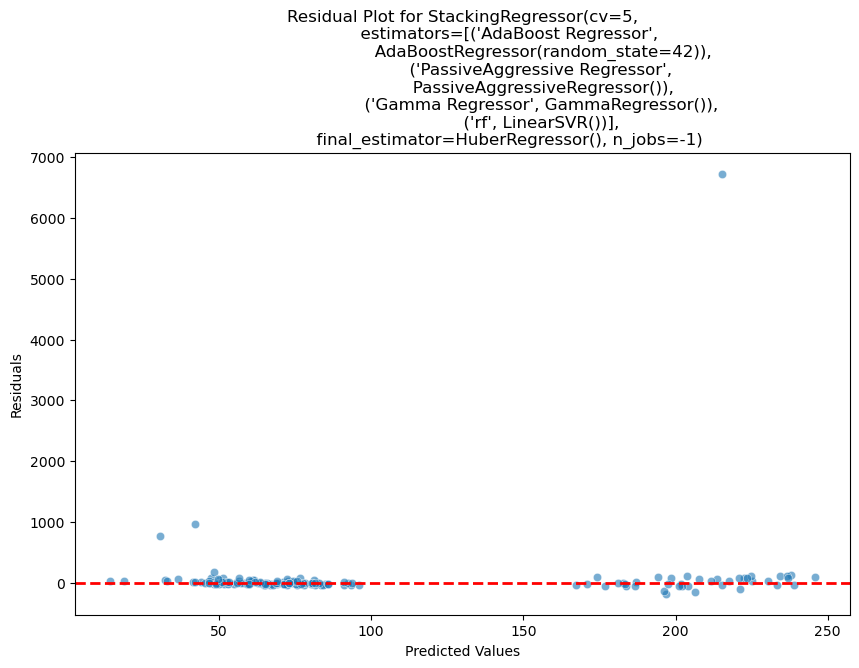

Test MSE: 290999.53214149346
Test R² Score: 0.033017926675044884


In [172]:
plot_residual_chart(stacked_model, X_west_train_scaled_df, X_west_test_scaled_df,y_west_test)

  0%|          | 0/50 [00:00<?, ?it/s]

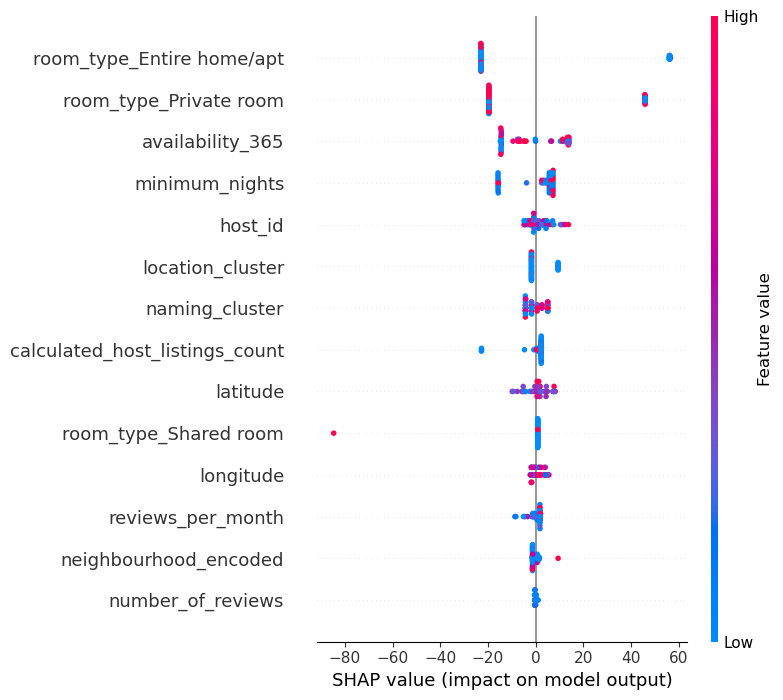

In [173]:


# Use a subset of training data for approximation (reduces computation cost)
X_sample = shap.sample(X_west_train_scaled_df, 100)

# Create SHAP Explainer
explainer = shap.KernelExplainer(stacked_model.predict, X_sample)

# Compute SHAP values for test data
shap_values = explainer.shap_values(X_west_train_scaled_df[:50]) 

shap.summary_plot(shap_values, X_west_test_scaled_df[:50])

In [178]:
X_west_train_scaled_df.to_csv("X_west_train_scaled.csv",index=False)

### **3.3 Evaluate and Improve the Models** <a id="airbnb-evaluate"></a> 
Tuning the model hyperparameters  
Selecting different input features  
Adjusting the input data <br>
Other effective techniques

**Extract feature importance from the models**

In [174]:
from sklearn.inspection import permutation_importance 
# permutation importance: Permutation Importance is a technique used to evaluate the importance of each feature in
# a machine learning model by randomly shuffling its values and measuring how much the model's performance drops.

# Define models
Selected_reg_models = {
    "MLP Regressor": MLPRegressor(random_state=42),
    "LassoLarsCV": LassoLarsCV(),
    "RidgeCV": RidgeCV(), 
    "HistGradientBoosting Regressor": HistGradientBoostingRegressor(random_state=42),
    "LGBM Regressor": LGBMRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42),
    "Extra Trees Regressor": ExtraTreesRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "Linear SVR": LinearSVR(random_state=42),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
}


# Dictionary to store feature importances
feature_importances = {}

# Extract feature importance where applicable
for name, model in Selected_reg_models.items():
    print(f"\033[1mTraining {name}...\033[0m")
    
    # Train model
    model.fit(X_train_scaled_BERT, y_air_train_BERT)

    print(f"\033[1mExtracting Feature Importance for {name}...\033[0m")

    # Tree-based models (built-in feature importance)
    if hasattr(model, "feature_importances_"):
        feature_importances[name] = model.feature_importances_.flatten()  # Ensure 1D

    # Linear models (use absolute values of coefficients)
    elif hasattr(model, "coef_"):
        feature_importances[name] = np.abs(model.coef_).flatten()  # Ensure 1D

    # Models without direct feature importance - use permutation importance
    else:
        result = permutation_importance(model, X_test_scaled_BERT, y_air_test_BERT, n_repeats=10, random_state=42)
        feature_importances[name] = result.importances_mean.flatten()  # Ensure 1D

# Convert feature importances into a DataFrame for comparison
reg_feature_importances_df = pd.DataFrame(feature_importances, index=X_train_scaled_BERT.columns)




Training MLP Regressor...
Extracting Feature Importance for MLP Regressor...
Training LassoLarsCV...
Extracting Feature Importance for LassoLarsCV...
Training RidgeCV...
Extracting Feature Importance for RidgeCV...
Training HistGradientBoosting Regressor...
Extracting Feature Importance for HistGradientBoosting Regressor...
Training LGBM Regressor...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001859 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1479
[LightGBM] [Info] Number of data points in the train set: 5333, number of used features: 19
[LightGBM] [Info] Start training from score 169.960435
Extracting Feature Importance for LGBM Regressor...
Training XGBoost Regressor...
Extracting Feature Importance for XGBoost Regressor...
Training Extra Trees Regressor...
Extracting Feature Importance for Extra Trees Regress

KeyboardInterrupt: 

In [ ]:
reg_feature_importances_df

In [ ]:
# LGBM Regressor have placed too much importance to the ID varible, but the ID is to uniquly identify the listing attribute, 
# so it shouldnt used as a critical factor in judging the price variable. 

# remove ID from the data 

X_train_scaled_BERT= X_train_scaled_BERT.drop(columns='id', errors='ignore')
X_test_scaled_BERT = X_test_scaled_BERT.drop(columns='id', errors='ignore')

In [ ]:
def train_and_evaluate_regression_models(X_train, y_train, X_test, y_test):

    selected_models = {
        "MLP Regressor": MLPRegressor(random_state=42),
        "LassoLarsCV": LassoLarsCV(),
        "RidgeCV": RidgeCV(), 
        "HistGradientBoosting Regressor": HistGradientBoostingRegressor(random_state=42),
        "LGBM Regressor": LGBMRegressor(random_state=42),
        "XGBoost Regressor": XGBRegressor(random_state=42),
        "Extra Trees Regressor": ExtraTreesRegressor(random_state=42),
        "Random Forest Regressor": RandomForestRegressor(random_state=42),
        "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
        "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
        "Support Vector Regressor": SVR(),
        "Linear SVR": LinearSVR(random_state=42),
        "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
    }

      # Dictionary to store feature importances
    feature_importances = {}
    feature_importance_values = []
    results = []  # To store model evalu    ation results

    # Train models and extract feature importances
    for name, model in selected_models.items():

        print(f"\n\033[1mTraining {name}...\033[0m")

        # Train model
        model.fit(X_train, y_train)

        # Evaluate model performance
        metrics = evaluate_regression_model(model, X_train, y_train, X_test, y_test)
        results.append([name] + list(metrics))

        print(f"\033[1mExtracting Feature Importance for {name}...\033[0m")

        # Extract feature importances
        if hasattr(model, "feature_importances_"):
            importance = model.feature_importances_
        elif hasattr(model, "coef_"):
            importance = np.abs(model.coef_)
        else:
            result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
            importance = result.importances_mean

        # Store feature importances
        importance = np.ravel(importance)  # Flatten to ensure 1D
        feature_importances[name] = importance
        feature_importance_values.append(importance)    

    # Convert results into a DataFrame
    results_df = pd.DataFrame(results, columns=["Model", "Train MSE", "Train RMSE", "Train MAE", "Train R²", 
                                                "Test MSE", "Test RMSE", "Test MAE", "Test R²"])

    # Compute the average feature importance across all models
    feature_importance_df = pd.DataFrame(feature_importance_values, columns=X_train.columns)
    avg_feature_importance = feature_importance_df.mean(axis=0).to_dict()  # Convert to dictionary

    return results_df, feature_importances, avg_feature_importance


In [ ]:
Regression_results_df, featureimpt_dict, ave_featureimpt_dict = train_and_evaluate_regression_models(X_train_scaled_BERT, y_air_train_BERT, X_test_scaled_BERT, y_air_test_BERT)

In [ ]:
# Convert feature importances into a DataFrame for comparison
reg_feature_importances_df = pd.DataFrame(featureimpt_dict, index=X_train_scaled_BERT.columns)
reg_feature_importances_df

In [ ]:
# Convert aggregated feature importance to DataFrame
feature_importance_df = pd.DataFrame.from_dict(ave_featureimpt_dict, orient='index', columns=["Average Importance"])
feature_importance_df = feature_importance_df.sort_values(by="Average Importance", ascending=False)

# Plot overall feature importance
plt.figure(figsize=(12, 6))
sns.barplot(
    x=feature_importance_df["Average Importance"], 
    y=feature_importance_df.index, 
    palette="coolwarm"
)
plt.xlabel("Average Feature Importance")
plt.ylabel("Features")
plt.title("Overall Average Feature Importance Across All Models")
plt.show()

In [ ]:
display(Regression_results_df)

In [ ]:
X_train_scaled_BERT

**Remove low importance features and train the model**

In [ ]:
columns_to_remove = ['neighbourhood_group_West Region','neighbourhood_group_North Region','neighbourhood_group_Central Region']
X_train_scaled_BERT_dropped = X_train_scaled_BERT.drop(columns=columns_to_remove, errors='ignore')
X_test_scaled_BERT_dropped = X_test_scaled_BERT.drop(columns=columns_to_remove, errors='ignore')


In [ ]:
%%time

Regression_results_df_dropped, featureimpt_dict, Regression_results_df_dropped_feature_imp = train_and_evaluate_regression_models(X_train_scaled_BERT_dropped, y_air_train_BERT, X_test_scaled_BERT_dropped, y_air_test_BERT)

In [ ]:
display(Regression_results_df_dropped)

In [ ]:
# plot_comparison_bar_graph(Regression_results_df, Regression_results_df_dropped, "Test R²", "Before dropping", "After dropping")

**Applying feature weighting**

testing to multiply the average feature importance derived to the values in the original dataset and then train the tree based models again

In [ ]:
ave_featureimpt_dict

In [ ]:
# Convert feature importance dictionary to Pandas Series
feature_importance_series = pd.Series(ave_featureimpt_dict)
feature_importance_series

In [ ]:
# Multiply dataset features by their importance values
X_train_scaled_BERT_weighted = X_train_scaled_BERT_dropped * feature_importance_series

# If needed, apply the same transformation to test set
X_test_scaled_BERT_weighted = X_test_scaled_BERT_dropped * feature_importance_series

In [ ]:
# Remove columns that contain only NaN values
X_train_scaled_BERT_weighted = X_train_scaled_BERT_weighted.dropna(axis=1, how='all')
X_test_scaled_BERT_weighted = X_test_scaled_BERT_weighted.dropna(axis=1, how='all')


In [ ]:
X_train_scaled_BERT_weighted.head()

In [ ]:
Regression_results_df_weighted, featureimpt_dict, Regression_results_df_weighted_importanceid = train_and_evaluate_regression_models(X_train_scaled_BERT_weighted, y_air_train_BERT, X_test_scaled_BERT_weighted, y_air_test_BERT) 


In [ ]:
# plot_comparison_bar_graph(Regression_results_df_dropped, Regression_results_df_weighted, "Test R²", "Before weighting", "After weighting")

### **Grid Search**

In [ ]:

# def grid_search_and_evaluate_regression_models(X_train, y_train, X_test, y_test, evaluate_model):
#     # Dictionary of models with default parameters
#     models = {
#         "MLP Regressor": MLPRegressor(),
#         "HistGradientBoosting Regressor": HistGradientBoostingRegressor(),
#         "LGBM Regressor": LGBMRegressor(),
#         "XGBoost Regressor": XGBRegressor(),  # Added XGBoost
#         "Extra Trees Regressor": ExtraTreesRegressor(),
#         "Random Forest Regressor": RandomForestRegressor(),
#         "Ridge CV": RidgeCV(),
#         "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
#         "Decision Tree Regressor": DecisionTreeRegressor()
#     }


#         # Define hyperparameter grids for selected models
#     param_grids = {
#         # MLPRegressor (Neural Network)
#         "MLP Regressor": {
#             "hidden_layer_sizes": [(50,), (100,)],  # Vary layer sizes
#             "activation": ["relu", "tanh"],  # Test different activation functions
#             "solver": ["adam", "lbfgs"],  # Use LBFGS for smaller datasets
#             "alpha": [0.0001, 0.001],  # L2 regularization
#             "learning_rate": ["constant", "adaptive"],  # Control learning rate adjustments
#             "max_iter": [200, 500]  # Increase iterations for better convergence
#         # }
    
#         # HistGradientBoostingRegressor (Gradient Boosting Trees)
#         "HistGradientBoosting Regressor": {
#             "learning_rate": [0.01, 0.1, 0.2],  # Lower values reduce overfitting
#             "max_iter": [100, 200, 500],  # Increase iterations for better learning
#             "max_depth": [3, 5, 10],  # Control depth for regularization
#             "loss": ["squared_error", "absolute_error"],  # Absolute error is robust to outliers
#         },
    
#         # LGBMRegressor (LightGBM)
#         "LGBM Regressor": {
#             "n_estimators": [50, 100],  # Number of boosting rounds
#             "learning_rate": [0.01, 0.1],  # Control step size
#             "max_depth": [-1, 3, 5],  # Control tree depth
#             "num_leaves": [20, 31],  # More leaves capture more interactions
#             "boosting_type": ["gbdt", "dart"],  # Try different boosting types
#             "reg_alpha": [0.0, 0.1, 0.5],  # L1 regularization for robustness
#             "reg_lambda": [0.0, 0.1, 0.5]  # L2 regularization
#         },
    
#         # ExtraTreesRegressor (Ensemble Tree-Based Model)
#         "Extra Trees Regressor": {
#             "n_estimators": [100, 300, 500],  # More trees for stability
#             "max_depth": [None, 10, 20],  # Control complexity
#             "min_samples_split": [2, 5, 10],  # Reduce overfitting
#             "min_samples_leaf": [1, 2, 5],  # Larger leaf size makes it robust to noise
#             "bootstrap": [True, False],  # Try with and without bootstrapping
#         },

#         "XGBoost Regressor": {  # Hyperparameter tuning for XGBoost
#             "n_estimators": [50, 100, 200],
#             "learning_rate": [0.01, 0.1, 0.2],
#             "max_depth": [3, 5, 7],
#             "subsample": [0.7, 0.9, 1.0],
#             "colsample_bytree": [0.7, 0.9, 1.0],
#             "reg_alpha": [0.0, 0.1, 0.5],
#             "reg_lambda": [0.0, 0.1, 0.5]
#         },
        
#         # RandomForestRegressor
#         "Random Forest Regressor": {
#             "n_estimators": [100, 300, 500],  # More trees for better performance
#             "max_depth": [None, 10, 20, 30],  # Limit depth to prevent overfitting
#             "min_samples_split": [2, 5, 10],  # Control how trees split
#             "min_samples_leaf": [1, 2, 5],  # Avoid overly complex trees
#             "bootstrap": [True, False],  # Try bootstrapping variations
#         },
    
#         # RidgeCV (Regularized Linear Regression)
#         "Ridge CV": {
#             "alphas": [(0.1, 1.0, 10.0, 100.0)],  # Tune alpha (L2 regularization)
#             "scoring": ["r2", "neg_mean_absolute_error"],  # Evaluate on multiple metrics
#         },
    
#         # KNeighborsRegressor (K-Nearest Neighbors)
#         "K-Nearest Neighbors Regressor": {
#             "n_neighbors": [3, 5, 7, 10],  # Number of neighbors
#             "weights": ["uniform", "distance"],  # Distance-weighted voting
#             "p": [1, 2],  # Manhattan (p=1) vs Euclidean (p=2)
#         },
    
#         # DecisionTreeRegressor (Tree-Based Model)
#         "Decision Tree Regressor": {
#             "max_depth": [3, 5, 10, None],  # Limit tree depth for regularization
#             "criterion": ["squared_error", "absolute_error", "friedman_mse"],  # Absolute error is robust to outliers
#             "min_samples_split": [2, 5, 10],  # Prevent overfitting by requiring more samples
#             "min_samples_leaf": [1, 2, 5]  # Avoid very small leaf nodes
#         }
#     }

#     results = []

#     for name, model in models.items():
#         print(f"\033[1mTraining {name} (Before Grid Search)...\033[0m")
#         model.fit(X_train, y_train)
#         metrics_before = evaluate_model(model, X_train, y_train, X_test, y_test)
#         print(f"Metrics Before Grid Search for {name}: {metrics_before}\n")

#         # Apply Grid Search if the model is in param_grids
#         if name in param_grids:
#             print(f"\033[1mTuning {name} with Grid Search...\033[0m")
#             grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='f1', n_jobs=-1)
#             grid_search.fit(X_train, y_train)
#             model = grid_search.best_estimator_  # Use the best hyperparameters
#             print(f"Best Params for {name}: {grid_search.best_params_}\n")

#             # Evaluate after Grid Search
#             print(f"\033[1mTraining {name} (After Grid Search)...\033[0m")
#             model.fit(X_train, y_train)
#             metrics_after = evaluate_model(model, X_train, y_train, X_test, y_test)
#             print(f"Metrics After Grid Search for {name}: {metrics_after}\n")
#         else:
#             metrics_after = metrics_before  # No change if no Grid Search applied

#         results.append([name] + list(metrics_before) + list(metrics_after))

#     return results
  

In [ ]:
# grid_search_regression_results = grid_search_and_evaluate_regression_models(X_train_scaled_BERT_weighted, y_air_train_BERT, X_test_scaled_BERT_weighted, y_air_test_BERT, evaluate_regression_model)

In [ ]:
# grid_search_regression_results

In [ ]:
# # Create results DataFrame
# results_df = pd.DataFrame(
#     grid_search_regression_results, 
#     columns=[
#         "Model", "Train MSE (Before)", "Train RMSE (Before)", "Train MAE (Before)", "Train R² (Before)", 
#         "Test MSE (Before)", "Test RMSE (Before)", "Test MAE (Before)", "Test R² (Before)", 
#         "Train MSE (After)", "Train RMSE (After)", "Train MAE (After)", "Train R² (After)", 
#         "Test MSE (After)", "Test RMSE (After)", "Test MAE (After)", "Test R² (After)" # Ensure this column exists in results
#     ]
# )

# # Sort by best F1-score after tuning
# regression_gridsearch_results_df = results_df.sort_values(by="Test R² (After)", ascending=False)

In [ ]:
# regression_gridsearch_results_df

In [ ]:
# display(regression_gridsearch_results_df[['Model','Train R² (Before)','Test R² (Before)','Train R² (After)', 'Test R² (After)']])


In [ ]:
# grid_search_comparison_bar_graph(regression_gridsearch_results_df, "Train R²")

In [ ]:
# grid_search_comparison_bar_graph(regression_gridsearch_results_df, "Test R²")

top performing models: MLP Regressor, Ridge CV, Extra Trees Regressor

Train R² = 0.3002, Test R² = 0.1728 → Low explanatory power (underfitting) <br>
Train MSE < Test MSE → Indicates generalization issues <br>
Test RMSE = 305.41 → High error relative to your target range <br>

In [ ]:
best_params = {
    'activation': 'relu',
    'alpha': 0.0001,
    'hidden_layer_sizes': (50,),
    'learning_rate': 'adaptive',
    'max_iter': 200,
    'solver': 'adam'
}

# Initialize the MLP Regressor with the best parameters
mlp_regressor = MLPRegressor(**best_params, random_state=42)


# Fit the model on the scaled training data
mlp_regressor.fit(X_train_scaled_BERT_weighted, y_air_train_BERT)

# Evaluate model performance before fine-tuning
metrics_mlp = evaluate_regression_model(
    mlp_regressor, 
    X_train_scaled_BERT_weighted, 
    y_air_train_BERT, 
    X_test_scaled_BERT_weighted, 
    y_air_test_BERT
)

metrics_mlp

**trying out random search**

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform, randint
# # Define hyperparameter search space
# param_distributions = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
#     'activation': ['relu', 'tanh', 'logistic'],
#     'alpha': uniform(0.00001, 0.001),  # Regularization strength
#     'solver': ['adam', 'lbfgs', 'sgd'],
#     'learning_rate': ['constant', 'adaptive', 'invscaling'],
#     'max_iter': randint(100, 500)  # Number of iterations
# }

# # Initialize the MLP Regressor
# mlp_regressor = MLPRegressor(random_state=42)

# # Perform Randomized Search CV
# random_search = RandomizedSearchCV(
#     estimator=mlp_regressor,
#     param_distributions=param_distributions,
#     n_iter=20,  # Number of random samples
#     scoring='r2',
#     cv=3,
#     verbose=2,
#     n_jobs=-1,
#     random_state=42
# )

# # Fit RandomizedSearchCV
# random_search.fit(X_train_scaled_BERT_weighted, y_air_train_BERT)

# # Get the best parameters and score
# best_params_random = random_search.best_params_
# best_score_random = random_search.best_score_

# best_params_random, best_score_random


In [ ]:

# # Initialize the MLP Regressor with the best parameters
# mlp_regressor = MLPRegressor(**best_params_random, random_state=42)


# # Fit the model on the scaled training data
# mlp_regressor.fit(X_train_scaled_BERT_weighted, y_air_train_BERT)

# # Evaluate model performance before fine-tuning
# metrics_random = evaluate_regression_model(
#     mlp_regressor, 
#     X_train_scaled_BERT_weighted, 
#     y_air_train_BERT, 
#     X_test_scaled_BERT_weighted, 
#     y_air_test_BERT
# )


In [ ]:
# best params for extra trees regressor 

# Define the best parameters found through Grid Search
best_params = {
    'bootstrap': True,
    'max_depth': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 100
}

# Initialize Extra Trees Regressor with best parameters
extra_trees_regressor = ExtraTreesRegressor(**best_params, random_state=42)

# Fit the model on the training data
extra_trees_regressor.fit(X_train_scaled_BERT_weighted, y_air_train_BERT)

# Evaluate model performance before fine-tuning
metrics_etr = evaluate_regression_model(
    extra_trees_regressor, 
    X_train_scaled_BERT_weighted, 
    y_air_train_BERT, 
    X_test_scaled_BERT_weighted, 
    y_air_test_BERT
)

metrics_etr

### Manually tuning the hyperparameters

Artificial Neural Network

In [ ]:
from sklearn.model_selection import cross_validate

# Define the range of hidden layer sizes to test
hidden_layer_range = [(10,), (20,), (50,), (100,), (50, 50), (100, 50), (100, 100)]

# Lists to store results
train_mse = []
test_mse = []
cross_val_train_mse = []
cross_val_test_mse = []

# Convert target variables to 1D arrays
y_air_train_BERT = y_air_train_BERT
y_air_test_BERT = y_air_test_BERT

for hidden_layers in hidden_layer_range:
    # Create MLP Regressor model
    mlp_reg = MLPRegressor(hidden_layer_sizes=hidden_layers, 
                           random_state=1, max_iter=500, 
                           solver='adam', learning_rate_init=0.01, alpha=0.0001)
    
    # Fit model on training data
    mlp_reg.fit(X_train_scaled_BERT_weighted, y_air_train_BERT) 
    
    # Compute MSE for training and test sets
    train_mse.append(mean_squared_error(mlp_reg.predict(X_train_scaled_BERT_weighted), y_air_train_BERT))
    test_mse.append(mean_squared_error(mlp_reg.predict(X_test_scaled_BERT_weighted), y_air_test_BERT))
    
    # Perform 5-fold cross-validation
    results = cross_validate(mlp_reg, X_train_scaled_BERT_weighted, y_air_train_BERT, 
                             scoring='neg_mean_squared_error', cv=5, return_train_score=True)
    
    # Store mean cross-validation scores
    cross_val_train_mse.append(np.mean(-results['train_score']))
    cross_val_test_mse.append(np.mean(-results['test_score']))

# Store results in DataFrame
mlp_mse_results_df = pd.DataFrame({
    'Hidden Layers': [str(h) for h in hidden_layer_range],  # Convert tuple to string for readability
    'Train MSE': train_mse,
    'Test MSE': test_mse,
    'Cross Val Train MSE': cross_val_train_mse,
    'Cross Val Test MSE': cross_val_test_mse
})


In [ ]:
mlp_mse_results_df

In [ ]:
# Plot Cross Validation MSE
# Define the range of hidden layer sizes to test
hidden_layer_labels = ['(10,)', '(20,)', '(50,)', '(100,)', '(50, 50)', '(100, 50)', '(100, 100)']

plt.figure(figsize=(10, 5))
plt.plot(hidden_layer_labels, mlp_mse_results_df["Cross Val Train MSE"], 'go-', label='Cross Val Train MSE')
plt.plot(hidden_layer_labels, mlp_mse_results_df["Cross Val Test MSE"], 'mo-', label='Cross Val Test MSE')

# Formatting
plt.xlabel('Hidden Layer Configuration', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.title('MLP Performance - Cross Validation MSE', fontsize=14, fontweight="bold")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_params = {
    'activation': 'relu',
    'alpha': 0.0001,
    'hidden_layer_sizes': (10,),
    'learning_rate': 'adaptive',
    'max_iter': 200,
    'solver': 'adam'
}

# Initialize the MLP Regressor with the best parameters
mlp_regressor = MLPRegressor(**best_params, random_state=42)


# Fit the model on the scaled training data
mlp_regressor.fit(X_train_scaled_BERT_weighted, y_air_train_BERT)

# Evaluate model performance before fine-tuning
metrics_mlp = evaluate_regression_model(
    mlp_regressor, 
    X_train_scaled_BERT_weighted, 
    y_air_train_BERT, 
    X_test_scaled_BERT_weighted, 
    y_air_test_BERT
)

metrics_mlp

Extra Trees Regressor

In [ ]:

from sklearn.model_selection import cross_validate

# Define the depth range
depth_range = range(2, 20)

# Lists to store results
train_mse = []
test_mse = []
cross_val_train_mse = []
cross_val_test_mse = []

# Convert target variables to 1D arrays
y_air_train_BERT = y_air_train_BERT.to_numpy().ravel()  # Convert to NumPy array (1D)
y_air_test_BERT = y_air_test_BERT.to_numpy().ravel()

for d in depth_range:
    # Create Extra Trees Regressor model
    et_reg = ExtraTreesRegressor(max_depth=d, random_state=1, n_estimators=20, bootstrap=True)
    
    # Fit model on training data
    et_reg.fit(X_train_scaled_BERT_weighted, y_air_train_BERT) 
    
    # Compute MSE for training and test sets
    train_mse.append(mean_squared_error(et_reg.predict(X_train_scaled_BERT_weighted), y_air_train_BERT))
    test_mse.append(mean_squared_error(et_reg.predict(X_test_scaled_BERT_weighted), y_air_test_BERT))
    
    # Perform 5-fold cross-validation
    results = cross_validate(et_reg, X_train_scaled_BERT_weighted, y_air_train_BERT, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
    
    # Store mean cross-validation scores
    cross_val_train_mse.append(np.mean(-results['train_score']))
    cross_val_test_mse.append(np.mean(-results['test_score']))

# Store results in DataFrame
mse_results_df = pd.DataFrame({
    'Max Depth': list(depth_range),
    'Train MSE': train_mse,
    'Test MSE': test_mse,
    'Cross Val Train MSE': cross_val_train_mse,
    'Cross Val Test MSE': cross_val_test_mse
})


    

In [ ]:
display(mse_results_df)

In [ ]:
# Plot the simple split measures (train_mse & test_mse) 
plt.plot(depth_range, train_mse, 'bo-', label ='training mse')
plt.plot(depth_range, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [ ]:

# Define the best parameters found through Grid Search
best_params = {
    'bootstrap': True,
    'max_depth': 3,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 100
}

# Initialize Extra Trees Regressor with best parameters
extra_trees_regressor = ExtraTreesRegressor(**best_params, random_state=42)

# Fit the model on the training data
extra_trees_regressor.fit(X_train_scaled_BERT_weighted, y_air_train_BERT)

# Evaluate model performance before fine-tuning
metrics_etr = evaluate_regression_model(
    extra_trees_regressor, 
    X_train_scaled_BERT_weighted, 
    y_air_train_BERT, 
    X_test_scaled_BERT_weighted, 
    y_air_test_BERT
)

metrics_etr

**final best model: MLP Regressor**

In [ ]:
# !pip install shap


In [ ]:
# Use a subset of training data for approximation (reduces computation cost)
X_sample = shap.sample(X_train_scaled_BERT_weighted, 100)

# Create SHAP Explainer
explainer = shap.KernelExplainer(mlp_regressor.predict, X_sample)

# Compute SHAP values for test data
shap_values = explainer.shap_values(X_train_scaled_BERT_weighted[:50])  # Limiting to 50 samples for efficiency


In [ ]:
shap.summary_plot(shap_values, X_test_scaled_BERT_weighted[:50])


In [ ]:
# ###
# 🔹 How to Read This Plot
# Feature Importance (Y-Axis)

# The features are ranked from most important (top) to least important (bottom) in predicting the target variable.
# Example: "room_type_Entire home/apt" is the most impactful feature, while "neighbourhood_group_East Region" is the least.
# SHAP Value (X-Axis)

# SHAP values indicate how much a feature contributes to increasing or decreasing a prediction.
# Negative SHAP Value (Left) → Lowers the predicted outcome.
# Positive SHAP Value (Right) → Increases the predicted outcome.
# Color Gradient (Feature Value)

# Red (High Value) → Higher values of this feature.
# Blue (Low Value) → Lower values of this feature.
# Example: If a feature's red points are mostly on the right, it means high values of that feature lead to higher predictions.
# 🔹 Key Insights from Your Plot
# "room_type_Entire home/apt" has a strong impact.

# Higher values (red) tend to push predictions higher → Indicates that entire apartments tend to have higher predicted values.
# "neighbourhood_encoded" is important.

# Certain locations significantly impact predictions, meaning location matters in your model.
# "calculated_host_listings_count" influences predictions.

# More listings by a host affect pricing or demand.
# "room_type_Private room" & "room_type_Shared room" behave differently.

# Private rooms (positive SHAP values) increase predictions.
# Shared rooms (negative SHAP values) lower predictions.
# "longitude" and "latitude" matter.

# Locations have a direct influence on the target variabl

# ###